- <font color="blue"> Example </font>
- <font color="FireBrick"> Example </font>
 - 1️⃣  call 🅿
 - 2️⃣  call 1️⃣ call 🅿
 - 3️⃣  call 🅿

 ❗


  ✅ 只可以在类里面访问使用.    
  ⛔ **不能**在类里面重新赋值   
  ⛔ **不能**通过`<instance_name>.variable`（like `e.firstName` ) 方式访问。因为只有类的**field**可以这样访问。

  🎯 It may cause below **while** does NOT stop:

  ## ⚡In-depth knowledge

# Chapter 4 Class and Object 🤚 OOP-1

## Basic format - concise

### 1. Original Version

```scala
class ChecksumAccumulator {
  private var sum = 0
  def add(b: Byte): Unit = {
    sum += b
  }
  
  def checksum(): Int = {
    return ~(sum & 0xFF) + 1
  }
}
```

Remark:

- Method **parameters** in Scala is <font color="Maroon">**vals**</font>   
  
  That is : `b` is **NOT** allowed to be reassigned
- `return` is not neccessary. a Scala method returns the **last** value computed by the method
- **{ }** can be removed if only a **single** result expression.
- Expression cab be placed on the **same** line as the *def* itself if it is short.  
- Result type ( like `Unit` and `Int` ) can be left off because Scala will infer it.
- `;` is not neccessary. Except multi-statement in one line like:
```scala
val s = "hello"; println(s)
```


### 2. Concise Version

```scala
class ChecksumAccumulator {
  private var sum = 0
  def add(b: Byte) = sum += b  
  def checksum()   =  ~(sum & 0xFF) + 1
}
```

### 3. Trade-off Version : Concise vs Readable
```scala
class ChecksumAccumulator {
  private var sum = 0
  def add(b: Byte): Unit = { sum += b }   
  def checksum():   Int  = ~(sum & 0xFF) + 1
}
```

## SINGLETON OBJECTS

> Scala **cannot** have static members. Instead, Scala has <font color="blue">**singleton**</font> objects.

- When a **singleton object** shares the same name with a class, it is called that class's <font color="blue">companion object</font>.
- Must define both the *class* called *companion class* and its *companion object* in the same source code.
- A class and its companion object
can access each other's private members.

### Companion Object
```scala
import scala.collection.mutable
object ChecksumAccumulator {
  private val cache = mutable.Map.empty[String, Int]
  
  def calculate(s: String): Int =
    if (cache.contains(s))
      cache(s)
    else {
      val acc = new ChecksumAccumulator
      for (c <- s)
        acc.add(c.toByte)
      val cs = acc.checksum()
      cache += (s -> cs)
      cs
    }
}
```

### How to understand Single Object

- Think of <font color="blue">singleton objects</font> is as the home for any **static methods** you might have written in Java
- Can invoke <font color="blue">singleton_objects</font>.<font color="green">method</font>(...), like
```scala
ChecksumAccumulator.calculate("Every value is an object.")
```

### Difference between <font color="Brown">classes</font> and <font color="blue">singleton objects</font>:
- <font color="blue">Singleton objects</font> **cannot** take parameters.
- **Can not** instantiate a <font color="blue">singleton object</font> with the <font color="purple">new</font> keyword.
- A <font color="blue">singleton object</font> that does not share the same name with a companion class is called a **standalone object**. **Standalone objects** are for
 + collecting related utility methods. for example:

    ```scala
    object FileUtils:
      def readFile(filename: String): String = ???
      def writeFile(filename: String, contents: String): Unit = ???
    ```
    In this way, it lets consumers of your code call those methods **without needing to create an instance of the FileUtils class**:

    ```scala
    val contents = FileUtils.readFile("input.txt")
    FileUtils.writeFile("output.txt", content)
    ```
 + defining an entry point to a Scala application (See next section).

### Program Entry   


- Use <font color="blue">singleton object</font> with main()
   
  To run a Scala program, you must supply the name of a **standalone singleton object** with a **<font color="olive">main</font>** method
  that takes one parameter, an Array[String], and has a result type of **Unit**.

  ```Any standalone object with a main method of the proper signature can be used as the entry point into an application.```

  ```scala
    import ChecksumAccumulator.calculate
    object Summer {
      def main(args: Array[String]) = {
        for (arg <- args)
          println(arg + ": " + calculate(arg))
      }
    }
```

- Use **App** trait -  More Concise ❗
  ```scala
  import ChecksumAccumulator.calculate
  object FallWinterSpringSummer extends App {
    for (season <- List("fall", "winter", "spring"))
      println(season + ": " + calculate(season))
  }

  ```

# Chapter 5 Basic Types and Operations

## 5.1 Basic types

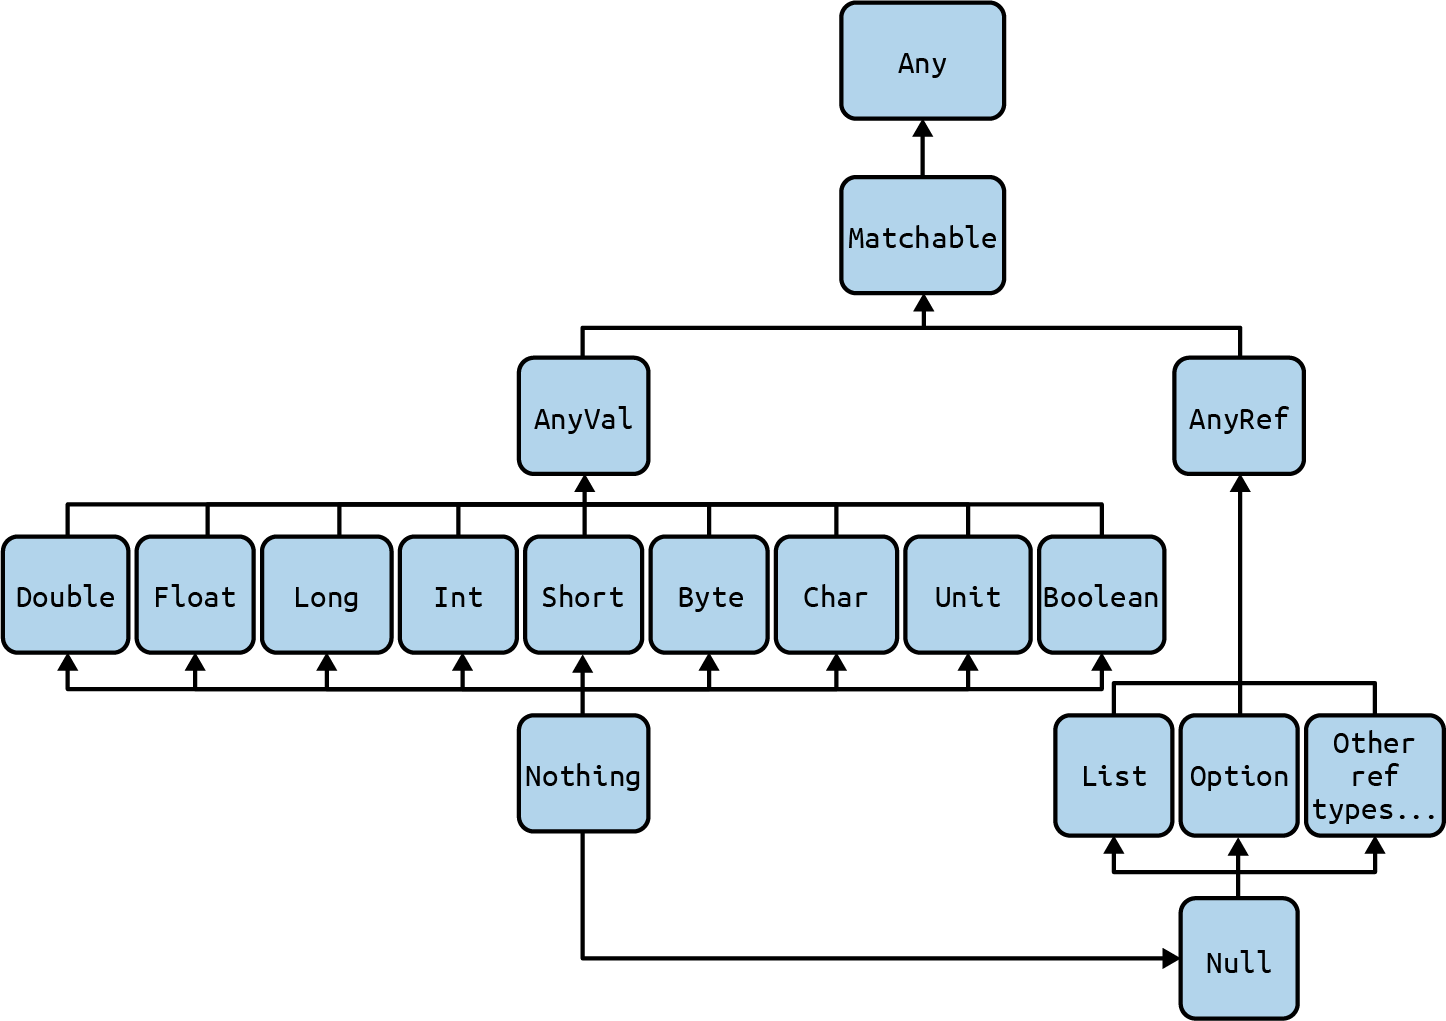
Table 5.1 - Some basic types

| Basic type | Range |
|---|:---|
| Byte | 8-bit signed two's complement integer (-27 to 27 - 1, inclusive) |
| Short | 16-bit signed two's complement integer (-215 to 215 - 1, inclusive) |
| Int | 32-bit signed two's complement integer (-231 to 231 - 1, inclusive) |
| Long | 64-bit signed two's complement integer (-263 to 263 - 1, inclusive) |
| Char | 16-bit unsigned Unicode character (0 to 216 - 1, inclusive) |
| String | a sequence of Chars |
| Float | 32-bit IEEE 754 single-precision float |
| Double | 64-bit IEEE 754 double-precision float |
| Boolean | true or false |



If you ever need to know the exact values of the data ranges and don’t have this book
handy, you can find them in the Scala REPL:

```scala
Char.MinValue.toInt // 0
Char.MaxValue.toInt // 65535
Byte.MinValue // -128
Byte.MaxValue // +127
Short.MinValue // −32768
Short.MaxValue // +32767
Int.MinValue // −2147483648
Int.MaxValue // +2147483647
Long.MinValue // -9,223,372,036,854,775,808
Long.MaxValue // +9,223,372,036,854,775,807
Float.MinValue // −3.4028235e38
Float.MaxValue // +3.4028235e38
Double.MinValue // -1.7976931348623157e308
Double.MaxValue // +1.7976931348623157e308
```


## 5.2 LITERALS

### Integer literals

- Decimal

  ```scala
  val dec1 = 31
  val dec2 = 255
  val x = 1_000
  val x = 100_000
  val x = 1_000_000
  ```


- Hexdecimal
  ```scala
  val hex1 = 0x5
  val hex2 = 0Xcafebabe

  ```

- Long
  ```scala
  val prog = 0XCAFEBABEL
  val tower = 35L
  val of = 31l

  ```
- Short
  ```scala
  val little: Short = 367
  ```
- Byte
  ```scala
  val littler: Byte = 38
  ```
- BigInt and BigDecimal
  ```scala
  val x: BigInt = 1_000_000
  val x: BigDecimal = 1_234.56
  ```

### Floating point

- Double
  ```scala
  val x = 1_123.45
  val x = 1_123.45D
  val x = 1_123.45d
  val x = 1_234e2 // 123400.0
  ```


- Float
  ```scala
  val x = 3_456.7F
  val x = 3_456.7f
  val x = 1_234e2F
  ```



### Character
- Single Quotest
  ```scala
  val a = 'A'
  ```
- Unicode
  ```scala
  val d = '\u0041'
  val f = '\u0044'
  ```

- Special Charactoer wiht '**\**'

**Table 5.2 - Literal Meanings of Escape Sequences**

| Literal | Meaning | Unicode Code Point |
|---|:---|---|
| \n | line feed | \u000A |
| \b | backspace | \u0008 |
| \t | tab | \u0009 |
| \f | form feed | \u000C |
| \r | carriage return | \u000D |
| \" | double quote | \u0022 |
| \' | single quote | \u0027 |
| \\ | backslash | \u005C


### String literals

  - Basic
  ```scala
  val hello = "hello"
  ```

  **No need to declare String type** becuase it can be inferred.
  ```scala
  val hello : String = "hello"  // Verbose !!
  ```

  - Multiple lines
  ```scala
  println("""|Welcome to Ultamix 3000.
             |Type "HELP" for help.""".stripMargin)
  ```

   + For <font color="red">"""</font>, the interior of a raw string may contain **any** characters whatsoever, including newlines, quotation marks, and special characters, except of course three quotesin a row.

   + Call **stripMargin** to remove "|". In this way, **leading spaces** before the second line are <font color="red">NOT</font> included.

   + If **don’t** like using the <font color="blue">**|**</font> symbol, just specify the character you want to use when calling stripMargin:
    ```scala
    val speech = """Four score and
                     #seve n years ago""".stripMargin('#')
    ```

   + You can also **left-justify** every line after the first line of your string:
    ```scala
    val foo = """Four score and
    seven years ago"""
    ```

### String Interpolation
 - "**s**" interpolation

   + Original Version

    ```scala
    val name = "reader"
    println("Hello, " + name + " " + 2*3 +  "!")
   ```

   + "**s**" Interpolation Version

    ```scala
    val name = "reader"
    println(s"Hello, $name ${2*3}!")
    ```

 - "**raw**" interpolation

   The raw interpolator **doesn’t** <font color="brown">escape</font> any literals within the string. The following example shows how raw compares to the s interpolator:

   - **s** version
    
    ```scala
    scala> s"foo\nbar"
    val res0: String = foo
    bar
    ```
   - **raw** version    

    ```scala
    scala> raw"foo\nbar"
    res1: String = foo\nbar
    ```
  As shown, **s** treats *\n* as a newline character while **raw** doesn’t give it any special consideration and just passes it along.

 - The **f** string interpolator (printf style formatting)

   ```scala
    val name = "Fred"
    val age = 33
    val weight = 200.00

    scala> println(f"$name is $age years old and weighs $weight%.2f pounds.")
    Fred is 33 years old and weighs 200.00 pounds.
  
    scala> println(f"$name is $age years old and weighs $weight%.0f pounds.")
    Fred is 33 years old and weighs 200 pounds.
  ```
  + Formatting ***String***

    ```scala
    val h = "Hello"
    f"'$h%s'"    // 'Hello'
    f"'$h%10s'"  // '     Hello'  <-----Right-justify
    f"'$h%-10s'" // 'Hello     '  <---- Left-justify
    ```
  + Formatting ***floating-point*** numbers
    ```scala
    val a = 10.3456 // a: Double = 10.3456
    val b = 101234567.3456 // b: Double = 1.012345673456E8
    f"'${a}%.1f'"   // '10.3'
    f"'${a}%.2f'"   // '10.35'
    f"'${a}%8.2f'"  // '   10.35'
    f"'${a}%8.4f'"  // ' 10.3456'
    f"'${a}%08.2f'" // '00010.35'
    f"'${a}%-8.2f'" // '10.35   '
    f"'${b}%-2.2f'" // '101234567.35'
    f"'${b}%-8.2f'" // '101234567.35'
    f"'${b}%-14.2f'" // '101234567.35  '

    val c = 10.5f // c: Float = 10.5
    f"'${c}%.1f'" // '10.5'
    f"'${c}%.2f'" // '10.50'

    ```

  + ***Integer*** formatting
    ```scala
    val ten = 10
    f"'${ten}%d'"   // '10'
    f"'${ten}%5d'"  // '   10'
    f"'${ten}%-5d'" // '10   '

    val maxInt = Int.MaxValue
    f"'${maxInt}%5d'" // '2147483647'

    val maxLong = Long.MaxValue
    f"'${maxLong}%5d'"  // '9223372036854775807'
    f"'${maxLong}%22d'" // '   9223372036854775807'
    ```
  + Zero-fill integer options
    ```scala
    val zero = 0
    val one = 1
    val negTen = -10
    val bigPos = 12345
    val bigNeg = -12345

    val maxInt = Int.MaxValue
    // non-negative integers
    f"${zero}%03d" // 000
    f"${one}%03d" // 001
    f"${bigPos}%03d"  // 12345
    f"${bigPos}%08d"  // 00012345
    f"${maxInt}%08d"  // 2147483647
    f"${maxInt}%012d" // 002147483647
    // negative integers
    f"${negTen}%03d" // -10
    f"${negTen}%05d" // -0010
    f"${bigNeg}%03d" // -12345
    f"${bigNeg}%08d" // -0012345

    ```
  + Character formatting

    ```scala
    val s = 's'
    f"|${s}%c|" // |s|
    f"|${s}%5c|" // |    s|
    f"|${s}%-5c|" // |s   |
    ```

  + Common printf style format specifiers

| Format specifier | Description |
|---|---|
| %c | Character |
| %d | Decimal number (integer, base 10) |
| %e | Exponential floating-point number |
| %f | Floating-point number |
| %i | Integer (base 10) |
| %o | Octal number (base 8) |
| %s | A string of characters |
| %u | Unsigned decimal (integer) number |
| %x | Hexadecimal number (base 16) |
| %% | Print a “percent” character |
| $$ | Print a “dollar sign” character |

  + Character sequences that can be used in strings

| Character sequence | Description |
|---|---|
| \b | Backspace |
| \f | Form feed |
| \n | Newline, or linefeed |
| \r | Carriage return |
| \t | Tab |
| \\ | Backslash |
| \" | Double quote |
| \' | Single quote |
| \u | Beginning of a Unicode character |



### Boolean literals
The Boolean type has two literals, **true** and **false**:
  ```scala
  val bool = true
  val fool = false
  ```


## 5.4 OPERATORS ARE METHODS

### Operaors === mehoth calling

- Apparently, it is operation
  ```scala
  val sum = 1 + 2

  ```
- In fact, it is a method calling
  ```scala
  val sum = 1.+ (2 )

  ```
  where **1** as a instance **class Int** contains a method called **<font color="brown">+</font>**, which taks an `Int` paraments ( *2* here ) and returs an `Int` result

- Remark

  In fact, `Int` contains several overloaded + methods that take **different parameter types**.

  For example, if parameter is `Long`, it wil returns Long

  ```scala
  scala> val longSum = 1 + 2L // Scala invokes 1.+(2L)
  longSum: Long = 3
  ```
- Example of `indexOf`

  ```scala
  scala> val s = "Hello, world!"
  s: String = Hello, world!
  scala> s indexOf 'o' // Scala invokes s.indexOf('o')
  res0: Int = 4
  ```

  + `indexOf` looks like a operator but it is a **method**
  + Since `indexOf` is a method, it can be overrided in different form, for example, 2 parameters:

  ```scala

  scala> s indexOf ('o', 5) // Scala invokes s.indexOf('o', 5)
  res1: Int = 8
  ```



> 👉  General Rule of Scala
   1. if a method takes **only one parameter**, you can call it without a **dot** or **parentheses**.
   2. if a method takes **more than one parameter**,you can call it without a **dot**
   

          ✅   obj.display()  
          ✅   obj.display
          ✅   obj.display("student")  
          ✅   obj    display    ("student")  
          ✅   obj    display     "student"


   So method can be expressed in **Operator** form. See the following section.


### Any method can be an **Operator**

Operator can be

  - prefix
  - infix
  - postfix

####-  infix

```scala
2 + 7
obj    display     "student"
````
####- prefix
```scala
scala> -2.0 // Scala invokes (2.0).unary_-
res2: Double = -2.0

scala> (2.0).unary_-
res3: Double = -2.0
```   
where method is **unary_( )**

####- Postfix

```scala
scala> val s = "Hello, world!"
s: String = Hello, world!

scala> s.toLowerCase
res4: String = hello, world!
```
convert to operator
```scala
scala> s toLowerCase
res5: String = hello, world!
```
where **toLowerCase** is used as a postfix operator on the operand **s**

## 5.6 Retional and Logic Operations

```scala
scala> def salt() = { println("salt"); false }
salt: ()Boolean
scala> def pepper() = { println("pepper"); true }
pepper: ()Boolean
```
### **&&** and **||** - <font color="brown">short-circuit</font>

```scala
scala> pepper() && salt()
pepper
salt
res21: Boolean = false
scala> salt() && pepper()
salt
res22: Boolean = false

```

### **&** and **|** - <font color="brown">alway evaluation<font>

```scala
cala> salt() & pepper()
salt
pepper
res23: Boolean = false
```


## 5.8 Object Equality

- Basic types

  ```scala
  scala> 1 == 2
  res31: Boolean = false

  scala> 1 != 2
  res32: Boolean = true

  scala> 2 == 2
  res33: Boolean = true
  ```

- Objects

  + Same types

    ```scala
    scala> List(1, 2, 3) == List(1, 2, 3)
    res34: Boolean = true

    scala> List(1, 2, 3) == List(4, 5, 6)
    res35: Boolean = false
    ```
  + different types

    ```scala
    scala> 1 == 1.0
    res36: Boolean = true

    scala> List(1, 2, 3) == "hello"
    res37: Boolean = false
    ```
  + against **null** - No exception will be thrown !

    ```scala
    scala> List(1, 2, 3) == null
    res38: Boolean = false
    scala> null == List(1, 2, 3)
    res39: Boolean = false
    ```

  + <mark>Comparison is based on <font color="BlueViolet">Content </font> rather than <font color="OliveDrab"> Type</font></mark>.
  
    If you want to comparing **reference** equality (which means the two variables point to the same object on the JVM's heap>  , use `eq`

    ```scala
    scala> ("he" + "llo") == "hello"
    res40: Boolean = true
    ```

## 5.10 Rich Wrappers

## Table 5.4 - Some rich operations

| Code | Result |
|---|---|
| 0 max 5 | 5 |
| 0 min 5 | 0 |
| -2.7 abs | 2.7 |
| -2.7 round | -3L |
| 1.5 isInfinity | false |
| (1.0 / 0) isInfinity | true |
| 4 to 6 | Range(4, 5, 6) |
| "bob" capitalize | "Bob" |
| "robert" drop 2 | "bert" |


## ⚡In-depth knowledge

### Assignment returns `()`

- <font color="FireBrick">`( )`</font> is emppty tuple which is **Unit** type

  ```scala
  def printHello(): Unit = {
    println("Hello, World!")
  }

  printHello() // No returned value, only side effect of printing
  ```

- Assigment always results in the **Unit** value, <font color="FireBrick">`( )`</font>.   
  When you assign a value to a variable in Scala, the expression itself **does** return the **Unit** value. `This means the assignment doesn't produce a meaningful data value to use further`.  It is for functional programming style.

  ```scala
  val x = 10
  ```
  x is assigned 10, but the entire expression `(x = 10)` returns **Unit**.
  
 🎯 It may cause below **while** does NOT stop:

  ```scala
  var line = ""
  while ((line = readLine()) != "") // This doesn't work!
  println("Read: " + line)
  ```

  since `(line = readLine())` returns `()` due to assignment.  

# Chapter 6 Functional Objects 🤚 OOP-2

## Primary Constructor (主构造器)



### Example

- Class Definition

  ```scala
  class Employee( firstName: String, lastName: String) {   
    // a statement
    println("the constructor begins ...")
    // some class fields (variable assignments)
    var age = 0
    private var salary = 0d
    // a method call
    printEmployeeInfo()

    // methods defined in the class
    override def toString = s"$firstName $lastName is $age years old"

    def printEmployeeInfo() = println(this) //uses toString
    
    // any statement or field prior to the end of the class
    // definition is part of the class constructor
    println("the constructor ends")

  }

  ```
- Class Implementation

  ```scala
  val e = new Employee("Kim", "Carnes")  1️⃣
  //println(e.firstName)   2️⃣
  ```


### Highlight

- 主构造器的组成
  + The constructor **parameters**
  + **Fields** (variable assignments) in the body of the class
  + **Statements** and **expressions** that are executed in the body of the class

  The Scala compiler will compile **any code** you place in the class body (即 **{ .... }** 包裹内的所有内容) , which **isn't** part of a field or a method definition, into the primary constructor.
  当实例化的时候，由上到下一步一步执行。

- 参数 ( 如`firstName`)      

  + 它**不是**类的<font color="blue">field</font>. 所以    
      ✅ 只可以在类里面访问使用.    
      ⛔ **不能**在类里面重新赋值   
      ⛔ **不能**通过`<instance_name>.variable`（like `e.firstName` ) 方式访问。因为只有类的**field**可以这样访问。

  + 怎么让参数成为**field**,从而解决以上两个限制 ?  ❗❗
    + Method 1 : 把参数复制给一个类里面的*field* - `最笨，啰嗦的方法`

      ```scala
      class Employee( firstName: String, lastName: String) {
        // some class fields (variable assignments)
        var first_Name : String = firstName   👈

      ```
    + Method 2 : 通过`val`或`var` 明确声明参数, 则它自动成为类里面的*field* - `最容易的方法`

      ```scala
      class Employee( 👉 val firstName: String, 👉 var lastName: String) {
      ```
    
    + Method 3 : 如果是**case class**,则任何参数自动是`val`,不需要明确写`val`或`var` - `高级用法`

      ```scala
      👉 case class Employee( firstName: String,lastName: String) {
      ```      

### 📙 扩展阅读 - setter and getter ( 高级内容 ）

 - 类里面的每一个field 都不会被 Scala Compiler 转成 **getter and setter**


  |  类型  |  getter  |  setter  |
  |---|---|---|
  |val|✅| |
  |var|✅|✅|
  |private|||
  |structor paramter| | |
  |val  \<structor parameter\>| ✅ | |
  |var  \<structor parameter\>| ✅ |✅ |
  |private val \<structor parameter\>| | |
  
  
 - 下面的field `age`会被compiler 转为等效的code
  ```scala
  class Person {
    var age : Int
  }
  ```
  等效于
  ```scala
  class Person {
      // Private age variable, renamed to _age
      private var _age = 0
      def age = _age     👈 // getter
      def age_=  (value:Int):Unit = _age = value 👈 // setter
  }
  ```
  注意 <font color=DarkRed>**`age_=`**</font> 是一个函数,它接受一个`Int` 类型的参数，不返回值。 即函数类型是 <font color=Navy>**`(Int) : Unit`**</font>.函数体为`_age=value`.

- 访问或赋值实际上是调用 **getter** 和 **setter**
  ```scala
  a = new Person
  a.age = 10   👈 //"age ="被转为 "age_=". 实际这是一个 setter 函数调用
  a.age = (10） 👈 // 括号可以加上，但对于单个参数（以前提过），括号可以去掉 !
  ```
- 这解释了: <font color=Brown>参数为什么加了 **val** or **var** 就成为了 *field* 的了 ? </font>这是因为：
 + 构造器的参数会被变成 **private** field. 它只可以被类的内部访问使用，外界是不可见的，而且也不会被子类继承。  
 + 但是，一旦参数前面加了 `val` 或 `var` , 它就会被编译成对应的 **setter** and **gettter**. 有了这两个函数，就意味着可以读写，可以被子类继承。这就成为类的**field** 了.

## Auxiliary Constructor (辅助构造器)

### Example

```scala
class Rational(n: Int, d: Int) {  // Primary constructor 🅿
  require(d != 0)
  val numer: Int = n
  val denom: Int = d
 1️⃣  def this(n: Int) = this(n,       1)   // one - arg auxiliary constructor
 2️⃣  def this(n: Double) = this(n.toInt)      // one - arg auxiliary constructor
 3️⃣  def this()       = this(100,     3)   // zero - arg auxiliary constructor
  override def toString = numer + "/" + denom
  def add(that: Rational): Rational =
    new Rational(
      numer * that.denom + that.numer * denom,
      denom * that.denom
    )
}
```
where
 - 1️⃣  call 🅿
 - 2️⃣  call 1️⃣ call 🅿
 - 3️⃣  call 🅿

### Auxiliary constructor highlight

- Method name awlays is - <font color="FireBrick">`this`</font>( ... )
- Each auxiliary constructor **MUST** begin with a call to
  + previous defined *auxiliary constructor*
  + *primary constructor*

## **private** vs **protected** in class

### Similarities:

- Prevent direct access from outside: Members declared as **private** or **protected** <font color="FireBrick">cannot</font> be directly accessed from code outside their defining scope. This helps promote encapsulation and information hiding.

- Both are package-scoped by default: If neither private nor protected is specified, members are accessible within the same package, similar to public in other languages.

### Differences:

| Feature | Private | Protected |
|---|---|---|
| **Accessibility Scope** | Only accessible within the defining <font color="RoyalBlue">class/object</font> | Accessible within the defining <font color="RoyalBlue">class/object and its **subclasses**</font> |
| **Inheritance** | <font color="FireBrick">Not</font> accessible by subclasses | Accessible by subclasses, even in different packages |
| **Use case** | Internal implementation details, hidden from outside world | Base functionality intended to be extended by subclasses |
| **Example** | Private helper method of a class | Abstract method in a base class for implementation in subclasses |
| **Best practice** | Use for internal details not meant for external consumption | Use for core functionality shared across subclasses |


# Chapter 7 Built-in Control Structures ( if, while, for, try )

Scala 的控制结构一个特点是： **它会返回一个值**。当然有时候会返回空值`()`. 这个特点使得它们可以彼此可以串联起来，省去了中间临时变量，更像是函数式编程风格。   

## <font color="blue">**if**</font> expression

### 1. Basic `if-else if-else` structure

```scala
val message: String = if (grade >= 90) {
  "Excellent!"
} else if (grade >= 80) {
  "Good job!"
} else {
  "Keep practicing!"
}
```
### 2. Ternary Operator : `(a < 0) ? -a : a`

```scala
val absValue = if ( a < 0 ) -a else a
println( if ( a < 0 ) -a else a )
```

### 3. Concise Method

```scala
def abs( x : Int)         = if ( x > 0 ) x else -x
def max( a : Int, b: Int) = if ( a > b ) a else b
println(abs(-10))
```

## <font color="blue">**While**</font> loops

### 1. **while**

```scala
def gcdLoop(x: Long, y: Long): Long = {
  var a = x
  var b = y
  while (a != 0) {
    val temp = a
    a = b % a
    b = temp
  }
  b
}

```

### 2. **do-while**
```scala
var line = ""
do {
  line = readLine()
  println("Read: " + line)
} while (line != "")
```

## <font color="blue">**For**</font> expressions - ⚡⚡⚡

### 1. Basic

- ```scala
  for ( i <- List(1,2,3) ) println(i)

  for ( i <- 1 to 4 ) println(i)  # 1, 2, 3, 4

  for ( i <- 1 until 4 ) println(i)  # 1, 2, 3

  ```

- ```scala
  val fruits = List("apple", "banana", "orange")
  for ( f <- fruits )  println(f)
  for (  (fruit, index) <- fruits.zipWithIndex ) println(s"$index is $fruit")
  ```

- ```scala
  val names = Map(
    "firstName" -> "Robert",
    "lastName" -> "Goren"
  )
  for ( (k,v) <- names ) println(s"key: $k, value: $v")
  ```

### 2. Multiple Counters

- two counters
```scala
for ( i <- -2 to -1; j <- 1 to 2 ) println(s"i = $i, j = $j")
```
```
i = -2, j = 1
i = -2, j = 2
i = -1, j = 1
i = -1, j = 2
```
- three counters
  ```scala
    for (
        i <- -2 to -1 ;
        j <-  1 to 2 ;
        k <- 10 to 14 by 2
    ) println(s"i = $i, j = $j, k = $k")
  ```

  ```rust
  i = -2, j = 1, k = 10
  i = -2, j = 1, k = 12
  .....................
  i = -1, j = 2, k = 12
  i = -1, j = 2, k = 14
  ```


### 3. **if** filtering ⚡⚡

  - ```scala
    for (
        i <- 1 to 10
        if i > 3  💂
        if i < 6  💂
        if i % 2 == 0  💂
    ) println(i)
  ```
  - ```scala
    for (
      file <- filesHere
      if file.isFile 💂
      if file.getName.endsWith(".scala") 💂
    ) println(file)
    ```

### 4. Nested Iteration

```scala
import java.io.File
val dir = File(".")
val files: Array[java.io.File] = dir.listFiles()

def fileLines(file: java.io.File) =
  scala.io.Source.fromFile(file).getLines().toList

def grep(pattern: String) =
  for (
    file <- filesHere          👈 1st iteration
    if file.getName.endsWith(".scala");  💂
    line <- fileLines(file)    👈 2nd iteration
    trimed = line.trim    ⬅ mid-stream variable, "val" can be left out  
    if trimed.matches(pattern)  💂
  ) println(file + ": " + trimed)

grep(".*gcd.*")
```


#### 5. New Collection from an Existing Collection ⚡

Format:   


>  **for {`clauses` }** <font color="blue">**yield**</font> `body`


 - Baisc

  ```scala
  val names = List("chris", "ed", "maurice")
  val capNames = for { name <- names } yield name.capitalize
  val lengths  = for ( name <- names ) yield name.length
  ```
  where
  - names :   `List[Strig] = List(Chris, Ed, Maurice)`
  - lengths : `List[Int] = List(5, 2, 7)`


  - Complicated - return **value**

  ```scala
  val a = for {
      x <- xs
      if x > 2
      y <- ys
      z <- zs
      if y * z < 45
    } yield {
      val b = x + y
      val c = b * z
      c
    }
    ```

  - Complicated - **method** body

    ```scala
    def between3and10(xs: List[Int]): List[Int] =
      for {
        x <- xs
        if x >= 3
        if x <= 10
      }  yield x
    ```


## <font color="blue">**Switch**</font> - See **Match** section

## 🎯 <font color="blue">**{ }**</font> vs <font color="indigo">**( )**</font> , Scope


### <font color="blue">**{  }** </font> -  From Section7.3 of book Programming in Scala  

  可以用  for <font color="blue">**{  }**</font> 替代 for <font color="indigo">**( )**</font>. 使用 for <font color="blue">**{  }**</font> 的好处是，可以省去 逗号 **;**
  ```scala
  def grep(pattern: String) =
  for {   👈 使用 "{"
    file <- filesHere           
    if file.getName.endsWith(".scala")  👈 没有逗号
  
  }
  ```


### Scope

<font color="blue">**{  }** </font> 会引进一个新的**scope**.

# Chapter 8  Functions and Closures
对函数的深层理解和高级应用



## Local function

  
- Orignal Version - using **private**

  ```scala
  object A {
    private def abc () = {  }
    def caller = {
      abc()
    }
  }
  ```

- Improved Version - using **Local Function**

  ```scala
  object A {
    def caller = {
      def abc () = {  }    👈 local
      abc()
    }
  }
  ```
  "Local function" 好处：
  + 不需要 **private**。函数`abc()`只是服务于函数`caller`
  + 不用担心被扩展的子类或是引进该包的程序碰巧使用了同样的函数名字`abc`. 即，不会给使用者造成潜在的麻烦。


## First-class Function ⚡⚡⚡

### 1. 函数的本来的表示形式

$$ \left(x:Int\right) ⇒ x + 1 $$

### 2. 可以把函数赋给<font color="blue">变量</font>

#### a. 一个参数的函数
```scala
scala> var increase = (x: Int) => x + 1
increase: Int => Int = <function1>
```
- 1️⃣ `Int => Int` indicates to take an integer (Int) as input and returns another integer (Int).  
- 2️⃣ `<function1>` 指`increase`是一个有一个输入参数的**函数**. Compiler 实际是做了下面的工作：
```scala
var increase: Function1[Int, Int] = (x:Int) => x + 1
```
- 3️⃣ The variable **increase** is an <font color="DrakGreen"> instance</font>, just like an instance of a String, Int, or other type, but in this case, it’s an instance of a function, known as a **function value**.

- 4️⃣ 上面的是隐式的表示，显示的表示是
```scala
scala> var increase : (Int) => (Int) = x  => {  x + 1 }
```
   这里明确表示变量**increase**是**function value**，类型是$(Int) => (Int) $.


#### b. 两个参数的匿名函数：

- 隐式表示

  ```scala
  val add = (x: Int, y: Int) => { x + y }
```

- 显示表示
```scala
val add : (Int, Int ) => Int = (x, y) => { x + y }
```


#### c. 函数变量的使用
  - 这样我们可以像调用函数一样调用这个变量，另外可以把它作为参数传给其他函数。

  ```scala
  increase(10)  // 11

  val list = List.range(1, 5)  // list: List[Int] = List(1, 2, 3, 4)
  list.map(increase)
  ```
  - 或者直接把匿名函数直接传给其他函数

  ```scala
  val someNumbers = List(-11, -10, -5, 0, 5, 10)
  someNumbers.filter((x: Int) => x > 0)
  res1: List[Int] = List(5, 10)
  ```


####  🎯 当函数有多行时，要用 **{...}** 包起来：
  ```scala
  val addThenDouble: (Int, Int) => Int = (x,y) => {
    val a = x + y
    2 * a
  }
  ```

## 匿名函数(function literals) 的简化写法

### 基本的简化

- Original Version

  ```scala
  someNumbers.filter((x:Int) => x > 0)
  ```
- **Level 1** - 省略**type**声明，因为类型可以由`someNumbers`内的类型决定。
  ```scala
  someNumbers.filter((x) => x > 0 )
  ```
- **Level 2** - 省略**( )**
  ```scala
  someNumbers.filter( x => x > 0 )
  ```
- **Level 3** - 用占位符 **_** 替代明确的参数名（见下一节）
  ```scala
  someNumbers.filter( _ > 0 )
  someNumbers.filter( _ % 2 == 0 )
  ```


  

### 用占位符 <font color="OrangeRed">_</font> 简化参数命名

- 双参数

  ```scala
  scala> val f = (_: Int) + (_: Int)
  f: (Int, Int) => Int = <function2>
  ```
  `(_: Int) + (_: Int)`被扩展成两个参数的匿名函数(literal)


- 用占位符 <font color="OrangeRed">_</font>代替整个参数列表 **Scala 3 放弃了**



## Partially Applied Functions

---

**Problem**

You want to eliminate repetitively passing variables into a function by (a) passing common variables into the function to (b) create a new function that is preloaded with those values, and then (c) use the new function, passing it only the unique variables it needs.  

---

- Function variable

  ```scala
  scala> def sum(a: Int, b: Int, c: Int) = a + b + c
  sum: (a: Int, b: Int, c: Int)Int
  ```
- Full applied function
  ```scala
  scala> sum(1, 2, 3)
  res1: Int = 6
  ```

- Partially applied function
  ```scala
  scala> b = sum(1, _ : Int , 3)
  b: Int => Int = <function1>
  ```
  *b* 是接受一个参数的函数
  ```scala
  scala> b(2)
  res3: Int = 6
  ```
  🎯 **Scala 3** 不需要指明占位符的类型了，即 `b = sum(1, _ , 3)`

- 极端情况，所有的参数都没有赋值
  ```scala
  scala> c = sum _
  c: (Int, Int, Int) => Int = <function3>
  ```
  *c* 是接受三个参数的函数
  ```scala
  scala> c(1, 2, 3)
  res11: Int = 6
  ```






## CLOSURES

函数里面可以使用外面的变量。注意，如果变量在外面被修改了，会影响使用它的函数。 但是如果变量是通过参数传入该函数的，则函数不再受该变量影响了。

- Open term

  ```scala
  var a = 1
  val add_a = ( x : Int ) => x + a  👈 // a is open term
  add_a(10)  // output 11
  ```
  ```scala
  a = -1      👈 a is changed outside!!!
  add_a(10)  // output 9 ❗ 同样的函数调用，输出不一样了。可见 a 由于外面的变化影响了该函数的逻辑。     
  ```

- Close term

  ```scala
  def add_a( a : Int  ) = ( x : Int ) => x + a
  val incr = add_a(1)
  incr(10)   // output 11
  ```

  ```scala
  val dec = add_a(-1)
  dec(10)   // output 9  ❗ dec 里面已经和变量a没有关系了。在dec被赋值的时候，a的值就被compiler 捕获并固定下来了。
  ```  
  🎯 以上称为**从一个函数返回另一个函数**  
  完整的声明可以写出返回类型
  ```scala
  def add_a( a : Int  ) : ( Int => Int )= ( x : Int ) => x + a
  ```
  where `( Int => Int)` 表示
  + 返回的是一个函数
  + 输入是一个`Int` 类型的参数
  + 返回是一个`Int` 类型的值

## 可变长度的参数

- 函数可以接受可变长度参数 by `<type>*`, 但是**必须放在最后**
  ```scala
  def printAll(args: String*) = args.foreach(println)

  // these all work
  printAll()
  printAll("a")
  printAll("a", "b")
  printAll("a123", "b", "c")

  ```

- ❗**Can not** pass a sequence— List, Seq, Vector, etc.—into a varargs parameter, but you can use Scala’s  `_*` operator，类似于python的解包

  ```scala
  val fruits = List("apple", "banana", "cherry")
  printAll(fruits) // fails (Found: List[String]), Required: String) 🚫
  printAll(fruits: _*) // works ✅
  ```

##  🎯 <font color="Chocolate"> **Tail-recursive** </font> function (高级概念）

---
**tail-recursive function**

is just a function whose **very last action** is a call to <font color="OrangeRed">**itself**</font>. When you write your recursive function in this way, the Scala compiler can **optimize** the resulting JVM bytecode so that the function requires only one stack frame — as opposed to one stack frame for each level of recursion!

---

- ⛔ 错误用法

  ```scala
  def sum(x: Int ) : Int =
    if ( x == 0 ) throw new Exception("boom!")
    else sum(x-1) -1  👈 // ? tail recursion
  ```
  `sum(x-1) -` is **NOT** last action to itself. 实际上，它可以分解成
  ```scala
  val s = sum(x-1)
  val result = s - 1 👈 // This is the last statement which does NOT call sum()  ❗❗
  return result
  ```
  📖你可以加入`@tailrec`annotation. **This annotation won’t compile unless the function is tail-recursive.**

  ```scala
  // need to import tailrec before using it
  import scala.annotation.tailrec

  @tailrec   👈
  def sum(x: Int ) : Int =
    if ( x == 0 ) throw new Exception("boom!")
    else sum(x-1) -1
  ```

- ✅ 正确写法

 [Writing Tail-Recursive Algorithms in Scala](https://alvinalexander.com/scala/fp-book/tail-recursive-algorithms/#:~:text=A%20tail%2Drecursive%20function%20is,for%20each%20level%20of%20recursion!)

 ```scala
  import scala.annotation.tailrec
  @tailrec
  def factorial(n: Int, accumulator: Int = 1): Int = {
    if(n <= 0) accumulator
    else factorial(n-1, n*accumulator)  👈
  }

 ```

- 🎯转换的一般步骤

 + 要改造的原函数

    ```scala
    def sum(list: List[Int]): Int = list match {
        case Nil => 0
        case x :: xs => x + sum(xs)
    }
    ```
 + Step 1 : 产生一个新函数，参数和内容和目标函数一直，但加一个参数.这是因为last statment is `x+sum(xs)`,要让它变成一个函数调用，所有**x** 和**x+sum(xs)**要被设计成参数传进新函数中。
   - `xs`对应于参数 `list: List[Int]`
   -  `x`+ sum(xs) 对应于参数 `acc: Int`

    ```scala
    private def sum_with_acc(list: List[Int], acc: Int 👈 ): Int = list match {
        case Nil => 0
        case x :: xs => x + sum(xs)
    }
    ```

 + Step 2 : 改函数内容.变等递归返回后的值在一一累计，变为累计和作为参数传入。
     所有原来的累计顺序是：
     ```scala
     list = ( a, b, c , d , .....,s, t )
     ```
$$a + ( b + ( c + ( ( s + ( t ) ) ) ) ) ) )$$

    变成了

$$( a+ b )$$

$$( a+ b ) + c$$

$$( ( ( ( ( a+ b ) + c ) + .... + s ) + t )$$


  
    
  ```scala
      private def sum_with_acc(list: List[Int], acc: Int): Int = list match {
          case Nil => acc   1️⃣
          case x :: xs => sum_with_acc( xs, acc + x ) 2️⃣
      }
   ```

 + Step 3 : 定义目标函数通过调用新产生的函数

    ```scala
    def sum(list: List[Int]): Int = sumWithAccumulator(list, 0)
    ```
 + Final Version

    ```scala
    // tail-recursive solution
    def sum(list: List[Int]): Int = {
        @tailrec
        def sum_with_acc(list: List[Int], acc: Int): Int = {
            list match {
                case Nil => acc
                case x :: xs => sum_with_acc(xs, acc + x)
            }
        }
        sum_with_acc(list, 0)
    }
    ```


# Chapter 9 Control Abstraction - 函数式编程的一种应用
即，使用 **function values** (前一章) 生成新的 Control structure.

## 🎯 <font color="chocolate"> Higher-order</font>  functions



---
高阶函数

就是将函数值(function value)作为另外一个函数的参数。
最直接的好处：
>可以大大**简化代码**.
- 即减少重复的代码数量
- 可以产生新的控制结构 (见下一节)

- 问题起源  
  一般，一个函数内部有共性的和特异的代码。特异的部分一般会根据输入值的不同，来执行不同的功能。这会导致函数内部出现大量的判断，分支语句的存在。
- 思路

  如果把这部分特异的代码直接包装成参数，即把可能变化，可能改变的，总之是**不确定的部分**放到函数体的**外部**，由函数的**调用者**负责想要执行什么功能或算法。这样不光函数变小，也不会受到功能变化的影响，即耦合度下降，Robust性能提升。
-方法

 将变化的部分定义成**function value**.通过参数传入主函数体中。主函数只是调用该**function value**就行了。 但是这需要函数的参数和这些**function value**有相同的样子，即 <font Color="DarkRed"> **Signature**</font>
----

### Level 1  最简单的 Higher-Order Functions - **No param, No return**
- 主函数

  ```scala
  def caller( f : () => Unit )
    f()

  ```

  - functiona paramenter name  : `f`
  - Signature is : `f : () => Unit`
   + `()`   指**没有参数**
   + `Unit` 指**没有返回值**

- 定义拥有相同 <font Color="DarkRed"> **Signature**</font> 的函数或者方法
 + Funcation value

    ```scala
    sayHelloF = ()=> println("Hello") 👈 // 隐式表示
    // sayHelloF : ()=> Unit = ()=> println("Hello") 👈 // 显式表示
  ```
  ❗ 显式表示的函数的类型是`()=> Unit`，**这正是要求的<font Color="DarkRed"> Signature</font>**
 + Method
  ```scala
    def sayHelloM() : Unit => println("Hello")
  ```
  注意，这是一个方法定义，它有参数声明`()`和返回值`Unit`, 也符合要求的<font Color="DarkRed"> **Signature**</font>。所有也可以把方法名传给参数。

 + Other Function value
    ```scala
    sayBye = ()=> println("Bye Bye !! ") 👈 // 隐式表示
    ```
    尽管函数体不同了，但是输入输出还是同样的<font Color="DarkRed"> **Signature**</font> : '() => Unit'

- 传函数方法给主函数

  ```scala
  caller(sayHelloF)  // "Hello"
  caller(sayHelloM)  // "Hello"
  caller(sayBye)     // "Bye Bye"
  ```

### Level 2  High-Order Functions - **1 param, No return**
- 主函数

  ```scala
  def caller( f : Int => Unit )
    f(4)   👈 // 要提供参数的，这是函数的Signature 要求的。
  ```

  - functiona paramenter name  : `f`
  - Signature is : `f : Int => Unit`
   + `Int`  指一个 `Int`类型的参数。
    ⚡因为只有**一个参数**， **所以 <font color='Orange'>( )</font> 可以去掉**
   + `Unit` 指没有返回值
  - 调用时候要负责提供参数


- 定义拥有相同 <font Color="DarkRed"> **Signature**</font> 的函数或者方法

  ```scala
    val pluseOne = ( x : Int ) => println( x + 1 )  // Function
    val plusTen  = ( x : Int ) => println( x + 10 ) // Function
    def plusFive( x : Int ) : Unit = println(x+5)  // Method
  ```
- 传函数方法给主函数

  ```scala
  caller(plusOne)  // 5   <- 4 + 1
  caller(plusTen)  // 14  <- 4 + 10
  caller(plusFive) // 9   <- 4 + 5
  ```
  where
   4 in $5 = 4 + 1$ 是函数`caller`在直接内部调用时候提供的。


### Level 3  High-Order Functions - **several params, No return**
- 上一个例子改造

  Level 2 的例子中`4`是在内部以 hard-coded 方式给出的。可以在函数中加入一个参数如下
  ```scala
  def caller( f : Int => Unit, ⏭ i: Int = 4⏪ )
    f(i)   👈 // 作为参数的 i 传入，这样就不用hard-Coded了
  ```
  调用
  ```scala
  //Same as above with default parameter value.
  caller(plusOne)  // 5   <- 4 + 1
  caller(plusTen)  // 14  <- 4 + 10
  caller(plusFive) // 9   <- 4 + 5

  // Specify parameter
  caller(plusOne,  ⏩ 2 )   // 3   <- 2 + 1
  caller(plusTen,  ⏩ 3 )   // 13  <- 3 + 10
  caller(plusFive, ⏩-1 )   // 4   <- -1 + 5

  ```


### Level 4  High-Order Functions - **several param with return**
- 主函数

   ```scala
  def compute( f : (Int, Int) => Int, x: Int, y : Int ) : Int = {
    val result = f(x,y)   👈 // 作为参数的 x, y 传入，这样就不用hard-Coded了
    result
  ```
  
  - functiona paramenter name  : `f`
  - Signature is : `f : (Int, Int) => Int`
   + `Int`  指一个 `Int`类型的参数。
   + `Int`  指返回值为`Int`
  - 调用需要的参数直接来自参数


  - 定义拥有相同 <font Color="DarkRed"> **Signature**</font> 的函数或者方法

  ```scala
    val sum = ( x : Int, y : Int ) => x + y  // Function
    def sumM(   x : Int, y : Int ) = x + y ) // Method

    val multiply = ( x : Int, y : Int ) => x * y  // Function   
  ```

  - 调用

  ```scala
  compute(sum,  2, 9 )       // 11
  compute(multiply, 3, 9 )   // 27
  ```

  - Remark

  以这种方式，`compute()`**不需要知道具体的算法**,它只是负责把算法需要的参数传入就行了。<font color='Navy'>由**调用者**决定使用哪个算法和所需要的参数</font>.  

### Level 5 传递匿名函数
- 主函数 - 不变
- 各种函数声明 - 不需要
- 调用时候直接传入匿名函数

  ```scala
  compute(_ + _,  2, 9 )   // 11
  compute(_ * _,  3, 9 )   // 27
  ```

  ( x : Int, y : Int ) => x + y

## CURRYING

### 基本形式

- 声明
  ```scala
  def sum( x : Int )( y : Int )( z : Int ) = x + y + z
  ```

- 调用
  ```scala
  sum(1)(2)(3) // Output 6
  ```


### ⚡本质分析

Currying 实际是一层一层的返回一个函数，调用时再一次一次的调用函数来产生结果。 以 `def sum( x : Int )( y : Int )( z : Int )` 为例，它实际是分三部，产生了3个函数：


- 第 1️⃣ 层

  ```scala
  scala> a = sum(1) _
  a: Int => (Int => Int) = <function1>
  ```
  `sum(1)`实际是返回个一个新函数，它是
  + 接受一个参数，是 `Int`类型，实际是指的`(y : Int)`那个位置
  + 返回另外一个函数，它的类型是`Int=>Int`即一个`Int`参数返回一个`Int`的值
  + 实际上`sum(1)`返回的是匿名函数：
     ```scala
     val b : Int => ( Int => Int) = ( y ) => ( z : Int ) =>  ( 1 + y  + z )
     b: Int => (Int => Int) = <function1>
    ```
    where b 作为函数值,它接受一个参数`y`,返回一个函数 `( z : Int ) =>  ( 1 + x  + z )`。
    这点可以通过观察`a`和`b`两个函数值的类型，它们两个的类型都是 `Int => (Int => Int)`,所有`b`和`sum(1)_`具有同样的功能。
    以上可以不用声明`b`的类型，让compiler自动推导，可简化成
    ```scala
    scala> val c  = ( y : Int ) => ( z : Int ) =>  ( 1 + y  + z )
    c: Int => (Int => Int) = <function1>
    ```
- 第 2️⃣ 层

  ```scala
  scala> d = sum(1)(2) _
  Int => Int = <function1>
  ```
  `sum(1)(2) _`等效于 `b(2)` 或 `c(2)`, 即等效于

  ```scala
  scala> val f : Int => Int  = ( z ) => 1 + 2 + z
  f: Int => Int = <function1>

  scala> val k = ( z : Int ) => 1 + 2 + z  👈 上面的简化版本，去掉函数变量的类型明 Int => Int
  k: Int => Int = <function1>
  ```
  注意`d`,`f`和`k`是一样的.

- 所以调用 `sum(1)(2)(3)`实际是分三步
  + `a = sum(1)_`
  + `d = sum(1)(2) _`
  + `d(3)`

 最后同于调用 `f(3)`






### 陷阱（高级内容，可略过）⚡⚡⚡⚡


一般curry每个()里面是单个参数，但如果是**多个参数**，就要注意:

<font color="chocolate">**参数只认位置，不再认名字了**</font>. 除非参数名是$v1, v2, v3. ...$

它的底层逻辑是，compilter 是利用function1/2/3的的类型的实例来展开curry 形式的函数的。
例如

```scala
def sum(x: Int)( y: Int = 2, z : Int = 3 ) = println( x + "," + y + "," + z )

scala > val a = sum(1) _
a: (Int, Int) => Unit = <function2>
```

Compiler 扩展 `sum(1)_` 成**Function2**的一个实例

```scala
def a = new Function2[Int, Int, Unit] {
  def apply(v1: Int, v2 : Int ) : Unit = sum(1)(v1, v2 )
}   
```
参数`y`被对应于`v1`, 参数`z`被对应于`v2`. 这种对应关系是由参数位置决定的，和参数的名字无关。（除非参数名就是v1,v2, 这样才会按照**名字**对应,见下面的solution）

所以当执行`a(2,3)`时候，实际执行的是
```scala
a.apply(2,3)  # 2 ➡ v1, 3 ➡ v2
```

⛔ `a.aply(y=10,z=-1)`  
   不能编译，因为 `y`和`z`不是`apply()`的参数名，`apply()`只是认识`v1,v2,....`
  ```scala
  a.apply(y=10,z=-1)    
  ```

✅ 解决方法是在改变函数参数名为`apply()`用的参数名，即 `v1,v2 ... `:

```scala
def sum(x: Int)( v1: Int = 2, v2 : Int = 3 ) = println( x + "," + v1 + "," + v2 )  👈 该参数名字
val a = sum(1) _
a.aply(v1=10,v2=-1)  👈 才可以按名字传值
```



## Currying 好处

Currying用多个参数代替一个参数列表，看起来没有必要，其实有多个应用场景

- 对 **partially applied functions** 支持方便。   
  否则，对于单一参数列表，当应用**partially applied functions**,要使用占位符**_**在正确的位置上。这很容易出错。

- 后面的参数可以使用前面的参数

  ```scala
  def area(x : Int ) ( y : Int = x ) = x * y  👈 // 前面的参数 x 可以被后面的直接使用
  area(3)    # 计算 正方形的面积
  area(3)(4) # 计算 长方形的面积
  ```
  否则，要对正方形和长方形分别定义两个函数

- Function Composition
   
   Using `andThen`  ? 没明白为什么是currying ❓

- 解决多参数时，**类型推导**问题。 （**高级应用**） ⚡⚡⚡⚡
  + 多参数的类型推导问题
    ```scala
    def find[A]( xs : List[A], check : A => Boolean): Option[A] = {
      xs match {
        case Nil => None
        case head :: tail => if (check(head)) Some(head) else find(tail, check)
      }
    }
    ```
    如果要调用这个函数找到第一个**even number** 🇰
    
    ⛔以下的调用不能编译，因为<font color="DarkRed">**编译器不知道`x`的类型**</font>
    ```scala
    find(List(1,2,3,4,5,6,7), x=> x % 2 == 0 )
    ```
    ✅解决方法是明确声明类型
    ```scala
    find(List(1,2,3,4,5,6,7), （x : Int ⏪) => x % 2 == 0 )  # output some(2)
    ```

  + ✅ 利用**currying**解决类型推导问题
  ```scala
  def find[A]( xs : List[A])( check : A => Boolean) ⏪: Option[A] = {
     xs match {
       case Nil => None
       case head :: tail => if (check(head)) Some(head) else find(tail)(check) ⏪ 这也要该
     }
  }
  ```
  这个小的改动可以使得调用的时候，不用声明x的类型了：
  ```scala
   find(List(1,2,3,4,5,6,7))( x => x % 2 == 0 )  # output some(2)
  ```


## **By-name parameters** + **Currying** ➡ 新的控制结构(DSL) ⚡⚡⚡⚡

### <font color="DarkRed">*by-name*</font>  **vs** <font color="Blue">*by-value*</font> parameters - 基本概念

- By-value - 最普通，也最广泛使用的
> causes arguments to be **evaluated before being passed to the method**. This is the default.

  ```scala
  val enable  = false  👈

  def assert( x : Int ) = if (enable && (x > 0)) "OK" else "bad"

  println(assert( -3 ))   # output bad   ✅
  println(assert( 3/0) )  # Report Error ⛔
  ```

- **By-name** - 延迟执行  
> causes arguments to be **evaluated <font color="Brown"> only when referenced
inside the method</font>**. By-name parameters are prefixed with the
`=> symbol`.

  ```scala
  val enable  = false  👈
                 ⏬
  def assert( x : => Int ) = if (enable && (x > 0)) "OK" else "bad"

  println(assert( -3 ))   # output bad  ✅
  println(assert( 3/0) )  # output bad  ✅
  ```
- 区别

 + *by-value*   
   是在传入函数的时候就执行完了的。
   对于上面的例子, 尽管由于 `enable=false`, `x`在函数内部不会被使用(即`x`是不是非法的无关紧要),但是，因为是**by-value**, 在传入参数时候 `3/0`被被执行，从而引发 runtime error.

 + *by-name*

   `x`是在函数内部被使用时候才被执行，由于`enable=false`，short-circuit 原则， 则`x > 0`没有被执行，即`x`没有被**referenced**. 则 `3/0` 没有被 **evaluate**,进而不会产生 runtime error.

   这一点可以通过把 `enable = true`,这样 `(x > 0 )`不得不执行，从而`x`被**referenced**。则 `3/0` 被 **evaluate**,进而产生 runtime error



### <font color="DarkRed">*by-name*</font>  **vs** <font color="Blue">*by-value*</font> parameters - 函数值作为参数传入


---
**by-name 优点**

1. 如果evalaute耗时很长，由于延迟evaluate,如果内部条件不允许，可以不用evaluate,从而节省函数的运行时间
2. 如果参数是一个函数，并且没有输入参数可以省略 ()
---
例如：

- 完整的多参数的函数定义curry化 - 较啰嗦
  + 带完整函数类型
  ```scala
  def until( condition : Boolean)( block : () => Unit ) {
      if ( !condition ) {
        block()   👈 // () must be
      }
  }
  ```       
  + 调用时候也必须完整，即带 <font color="DarkRed">( )</font>. 注意，以下的调用**都工作！！**
  
    ```scala
    val a = ()=> { println("Pass")}
    until(false)(a)
    until(false)( () => println("OK-1")  )
    until(false){ () => println("OK-2")  } 👈// 被curry化后，只有一个参数， 所以可以用{} 代替（）
    until(false){ () =>  println("OK-3") ; println("Pass-1") }
    until(false) { () =>
        println("OK-3")  
        println("Pass-1")
    }
    ```
  + 注意： 可以用 <font color="DarkRed">{  }</font> 把整个函数体包起来，还能写成多行， 特别像是一个条件控制结构（如原生的 `if() {} else {}` ）。
   
   **缺陷**是 调用时候总带着 `{ () => ..... } ， 这使得它还是不像原生的控制结构。
   下面是去掉`()=>`的方法

- 🔨 去掉 `()=>` 产生新的控制结构 - **DSL**
  + 利用上面提到的 **by-name parameters**, 改参数为**by-name**
  ```scala
  def until( condition : Boolean)( block : => Unit ) { 👈 // by-name
      if ( !condition ) {
        block   👈 // () MUST NOT !!
      }
  }
  ```       
  +  调用时候**不用带** <font color="DarkRed">（） => </font>. 否则**没有任何输出！**

    ```scala
    val a = ()=> { println("Pass")}
    until(false)(a)  ⛔ // No output
    until(false)( () => println("OK-1")  ) ⛔ // No ouput

    until(false){ println("OK-2")  } ✅
    until(false) {     ✅
        println("OK-3")  
        println("Pass-1")
    }
    ```

  + 注意：最后一个写法实现了**新的控制结构**

-

# Chapter 10 Composition and Inheritance 🤚 OOP-3

## Abstract Class - Rarely used !

### Why Rarely used ?

  **from section 6.3 of book "Scala Cookbook"**
  >Although Scala has abstract classes, it’s **much more common to use** <font color="DarkRed"> **traits** </font>than abstract classes to implement base behavior. A class can only extend one abstract
class, but it can **implement multiple traits**, so using traits is more flexible. Because Scala 3 also lets traits have constructor parameters, traits will be used in even more situations.

### 两种使用 `abstract class` 的情况






  + You want to create a base class that requires constructor arguments.  
    **Trait** 不可以，但是scala 3 已经允许了。所以都是用**trait**实现基类的功能
  + Your Scala code will be called from **Java code**。 因为Java不知道`trait`



### 什么类可以声明为 **Abstract Class** ?

<font color=chocolate>存在任何一个方法，**没有**具体实现的，或者field 没有赋值的 类都要声明为 </font>`abstract class`.

解释：  
1. 前面提到，内部`field`实际是被转为**getter**和**setter**方法。如果内部变量没有赋初始值，意味着该`field`的**getter**和**setter**方法是没有具体应用的。所以必须声明class为`abstract`.
2. 可以有其他应用完整的方法。但只要有一个方法没有具体实现应用，就得加`abstract`. 否则会有 `compiling error : Missing Implementation`
3. 如果所以方法都有具体实现，field也都有赋初始值， 那么可以加，也可不加 `abstract`.
4. 但是，`abstract class` 是不可以产生实例的。

## 类的继承和覆盖

当子类扩展一个父类时，要许多要考虑的事情，以下对各种情况做**针对性**的解释说明

### **子类**如何调用**父类**的构造函数 ？

1. <font color=chocolate>**子类**</font>**构造器参数**传给<font color=Navy>**父类**</font>**主构造器**,该参数是<font color=Purple>**`val`**</font> - 最简单，最普遍的情况

  ```scala
  class Pet(val name: String)   👈 // 声明为  val  
              ➡️ ➡       ➡     ➡      ➡            ⤵️
  class Dog(name : String, val age: Int ) extends Pet(name)  {
    override def toString = s"$name is $age years old"
  }
  ```
  + <font color=chocolate>**子类**</font>构造器参数 `name`，前面**不可以加`val`**，因为它是用来给<font color=Navy>**父类**</font>的构造器传参数的。
  + 一旦它声明为 `val name : String`, compiler 会报错，因为此时加了`val` 的`name`不是普通的构造器参数，它直接也成为<font color=chocolate>**子类**</font> 的`field`,而父类有一个field也叫`name`，所以冲突了。解决方法可以是按照一般filed冲突解决，给子类的`field`再加一个<font color=DarkRed>`onverride`</font>,即
  ```scala
  class Dog(override val name : String, val age: Int ) extends Pet(name)
  ```


2. <font color=chocolate>**子类**</font>**构造器参数**传给<font color=Navy>**父类**</font>**主构造器**,该参数是<font color=Purple>**`var`**</font> - 非常 **tricky**,有陷阱 💣💣💣。

 + 陷阱 - 原因不明 ❗❗
  ```scala
  class Pet(var name: String)   👈 // 声明为  var
                ➡️ ➡       ➡     ➡      ➡            ⤵️
  class Dog(name : String, val age: Int ) extends Pet(name)  {
    override def toString = s"$name is $age years old"
  }
  ```

    ```scala
    val bob = new Dog("Bob", 11)
    println(bob)  //  output : Bob is 11 years old

    bob.name = "Jack"  💣 // 改写 name
    println(bob)       🐞 // output :  Bob is 11 years old . ❗❗❗bob.name 没有更新
    println(bob.name ) ✅ // output Jack  
    ```
    
 + 解决方法 1️⃣ - 最简洁

    给<font color=chocolate>**子类**</font>**构造器参数**起一个和父类field**不冲突**的名字
    ```scala
                   ➡️ ➡       ➡     ➡      ➡            ⤵️
      class Dog( nick : String, val age: Int ) extends Pet(nick)  { // 换一个名字,nick
          override def toString = s"$name is $age years old"
      }

    ```

  + 解决方法 2️⃣ - 啰嗦,不推荐！
    
    - 给<font color=chocolate>**子类**</font>**构造器参数**设成`private`
    - 产生一个伴生对象。利用 **`apply`**来分别赋值。
    ```scala
    class Dog private extends Pet("")  {  👈 // 加 private
        var age = 0
        override def toString = s"$name is $age years old"
    }

      object Dog {
          def apply(_name: String, _age: Int) = {  👈 参数名随便
            val e = new Dog()
            e.name = _name
            e.age = _age
            e     👈 // 记得返回实例
          }
      }

      val bob = Dog("Bob", 11)
      println(bob)    //  output : Bob is 11 years old

      bob.name = "Jack"
      println(bob)      ✅ //  output : Jack is 11 years old
      println(bob.name) ✅ //  output : Jack

    ```  

3. <font color=chocolate>**子类**</font>**构造器参数**传给<font color=Navy>**父类**</font>**<font color=DarkRed>辅助</font>构造器**.

  ```scala
   class Pet(val name: String, val age: Int)  { 👈 // 主构造器   🐯
     def this(name: String) = this(name, 0 )    👈 // 辅助构造器 🐧
  }      

  ```
  - <font color=chocolate>**子类**</font> 调<font color=Navy>**父类**</font>**主构造器**

    ```scala
    class Dog(name : String, val age: Int ) extends Pet(name,10)  🐯
    ```
  - <font color=chocolate>**子类**</font> 调<font color=Navy>**父类**</font>**辅助构造器** ✅

    ```scala
    class Dog(name : String, val age: Int ) extends Pet(name)  🐧
    ```

4. <font color=chocolate>**子类**</font>**辅助构造器参数**可以传给<font color=Navy>**父类**</font>**<font color=DarkRed></font>构造器** ？ **NO** !! ⛔  
🎯 一个类的**辅助构造器**只可以调用**本类**的:
  + 主构造器,或
  + 排在它前面的其他**辅助构造器**

    ```scala
    class Dog(name : String, val age: Int ) extends Pet(name，age)  { 🐯
      def this(name：String ) = this(name, 10 )     // 辅助构造器 🐃 ➡  🐯
      def this(age : Int )    = this("Bob", age)    // 辅助构造器 🐘 ➡  🐯
    }
    ```

### **子类**如何覆盖**父类**的同名field或Method ？



- 一般情况 - 加 `override`就行了
- 父类是`abstract class`的 - 比较复杂，有的要加，有点不用加。

#### <font color=Navy>**父类**</font> 是 abstract  
```scala
  abstract class Pet {
    def name : String                1️⃣
    def gender : String              2️⃣
    val age : Int                    3️⃣
    val greeting = "Hello"           🐯
    def bark = println(greeting)     🐧
  }
```
#### <font color=chocolate>**子类**</font> 继承时候要负责实现
```scala
  class Dog extends Pet {
    def name = "Bob"                1️⃣
    val gender = "Female"           2️⃣
    val age = 10                    3️⃣
    override val greeting = "Woo.. Woo"                      🐯
    override def bark = println(s"name : $name, $greeting")  🐧
  }
```

#### Remark
- 父类abstract类中，没有实现具体应用的，不管是`method`还是`field`，
 + 子类必须给出具体实现，**可以不加 `override`**, 如 1️⃣2️⃣3️⃣
 + 父类`method`可以在子类用`field`来具体实现. 如 2️⃣. **但反之不行 ！！**
 + 子类的方法可以有不同的 `Singature`.
  ```scala
    abstract class Animal { def makeSound(name: String): Unit }
    class Dog extends Animal {
      override def makeSound(name: String, age: Int): Unit =
        println(s"$name is a $age year old dog making a sound")
    }
    class Cat extends Animal {
      override def makeSound(name: String): Unit =
        println(s"$name is a cat making a sound")
    }
  ```

- 父类abstract类中已经实现了的， 不管是`method`还是`field`， <font color=chocolate>**子类**</font>给出具体实现时候必须加 <font color=darkred>**`override`**</font> , 如 🐯🐧. 并且 `Singaure`必须一致。


#### ⚡In-depth knowledge
<font color=chocolate>**子类**</font> 必须加 `override` 的一个好处是：

- 潜在的 Bug 🐞    

  如果父类新加了一个函数或属性， 恰巧继承于父类的子类内部原先也有同名的方法或属性。 对于别的语言，如python, 子类的 method 会覆盖父类这个新的函数，这使得使用该子类的用户没有意识到函数名冲突了。

- Scala 不会 fix 这个 🐞，但 compiler 会报警，报告 <font color=chocolate>**子类**</font> 有重名方法或属性，建议加`override`. 根据这个error, 使用者意识到，子类现存的方法和父类冲突了，可能需要改名。



### **类**如何<font color=darkred>禁止</font>被**子类**继承 ？ - 加 <font color=chocolate>**`final`**</font>
- 个别函数或属性被禁止继承
```scala
class Dog extends Pet {
    final def test = println("Testing ....")
    final val result : Int = 10
}
```
- 整个类被禁止继承
```scala
final class Dog extends Pet { }
```




# Chapter 12 <font color=darkred>`Trait`</font>

## 基本声明和使用

类似于多重继承，但是灵活，没有dimond问题。

### Example

``` scala
trait HasTail {
  def startTail(): Unit
  def stopTail(): Unit = println("Tail is stopped")
}

trait HasLegs {
  def startRunning(speed: Double): Unit
  def runForNSeconds(speed: Double, numS: Int): Unit = println(s"Running at speed miles/hour for $numS seconds")
}

class Dog extends HasTail with HasLegs {
  def startTail(): Unit = println("Tail is wagging")
  def startRunning(speed: Double): Unit = println(s"Running at $speed miles/hour")
}
```

### Q : 什么时候用 **`entends`** 和 **`with`** ?

- 扩展于一个 <font color=darkred>`trait`</font> 👉 用 **enxtend**
  ```scala
  class Dog extends HasTail {`
  ```
  
- 扩展于多个 <font color=darkred>`trait`</font> 👉 用 `enxtend <trait 1> with <trait 2> with ...`
  ```scala
  class Dog extends HasTail with HasLegs {`
  ```
- 扩展于<font color=navy>`class`</font> 和 多个 <font color=darkred>`trait`</font> 👉 用 `enxtend <class> with <trait 1> with <trait 2> with ...`
  ```scala
  class Pet {}
  class Dog extends Pet with HasTail with HasLegs {`
  ```

### Q : <font color=darkred>`trait`</font> 里可以包含什么 ？

```scala
trait hasLegs {
  def startRunning(speed: Double): Unit  1️⃣
  def run() = println("I’m running!")    2️⃣
  def color: String  3️⃣

  val numNails: Int   4️⃣          // abstract val
  var isHealthy: Boolean 5️⃣       // abstract var

  val numLegs: Int = 4  6️⃣        // concrete val
  var maxLength: Int = 10   7️⃣    // concrete var

}
```

- **未实现的** method, 即**抽象方法**, 如  1️⃣,3️⃣
- **实现了的** method, 如  2️⃣
- **未实现的** filed, 即**抽象属性**, 如  4️⃣，5️⃣
- **实现了的** filed, 如 6️⃣, 7️⃣



### Q : <font color = navy>**扩展类**</font>要注意什么 ?  

```scala
class Dog extends hasLegs {

  def startRunning(speed: Double): Unit = println(s"Running at $speed miles/hour")   1️⃣  // Must implement !!!
  override def run() = println("I’m running!")   2️⃣ // If need override, must add "override"
  val color = "Brown"   3️⃣
  
  val numNails = 5      4️⃣
  val isHealthy = true  5️⃣
  
  override val numLegs = 3 6️⃣
  maxLength = 9   7️⃣
}
```

- 对<font color=darkred>`trait`</font> 里的**抽象方法**，**必须**给出具体的实现 , 像 1️⃣
- 对<font color=darkred>`trait`</font> 里的**抽象方法**，也可以在类里用`field`代替 , 像 3️⃣。 这是一种比较普遍的做法。 🤲

  📙在<font color=darkred>`trait`</font> 里或`abstract class`里尽量定义**抽象方法**,这样可以增加扩展者使用时候的灵活度,即
  > 用 `def` or `val` 都可以实现化。
- 对<font color=darkred>`trait`</font> 里**实现了的** method, **如果要覆盖**，要加 `override`, 如  2️⃣
📙
-  对<font color=darkred>`trait`</font> 里**未实现的** filed, 即**抽象属性**, **必须**给出具体的实现。 如  4️⃣，5️⃣
- 对<font color=darkred>`trait`</font> 里**已经实现的** filed,如果要在类
 + 是 `val` 👉 要加 `override val `, 如  6️⃣
 + 是 `var` 👉 直接辅助, 如  7️⃣

---
Question 1 ：**最后，如果<font color = navy>**扩展类**</font>有没有实现的抽象方法或属性，怎么办？**   
Answer : <font color = navy>**扩展类**</font>必须加`abstract`成为抽象类   

```scala
abstract class Dog extends hasLegs { }
```
Question 2 ：如果另外一个<font color=darkred>`trait`</font>继承这个<font color = navy>**trait**</font>,它有没有实现的抽象方法或属性，怎么办 ？  
Answer : <font color=darkred>`trait`</font>可以不管  

```scala
trait ourLegged extends hasLegs  // trait 继承 trait
```

---


## 多<font color=darkred>`Trait`</font> and Class <font color=indigo>**Mixin**</font> 所面对的问题

### 一般调用顺序(特殊情况见下一节)： 由 **左 ➡ 右** 调用

- 多个<font color=darkred>`trait`</font>和父类

  ```scala
  class grandpa {  println(" I am grandfather !!! ") }  1️⃣️⃣
  class father extends grandpa { println(" I am father !!! ") } 2️⃣

  trait first  { println(" I am the first" ) } 3️⃣
  trait second { println(" I am the second" ) }4️⃣
  trait third  { println(" I am the third" ) } 5️⃣

                        2️⃣   ➡    3️⃣  ➡    4️⃣ ➡     5️⃣    ⤵️          
  class caller extends father with first with second with third { 6️⃣
    println(" I cam caller !!!")
  }

  val a = new caller
```

- Output is

  ```scala
  I am grandfather !!!   1️⃣
  I am father !!!
  I am the first
  I am the second
  I am the third
  I cam caller !!!   6️⃣
  ```


### 同名函数调用顺序：

- 多个<font color=darkred>`trait`</font>里面**可以有相同的方法**
  ```scala
    trait Paper   { def say = "Paper" }     📰
    trait Scissor { def say = "Scissor" }   ✂️
    trait Stone   { def say = "Stone" }     💎
  ```

- 但是扩展它们的<font color=blue>类</font> **必须 override**。否则compiler会报错。

  + 最简单的
  ```scala
  class game extends Paper with Scissor with Stone {
        override def say = "It is a game"    ✅  
        // override val say = "It is a game" ✅
  }
  ```
  + <font color=blue>扩展类</font>调用 `super`, 那个被调用 ？ Furthest ( last ) Trait win ❗❗❗
  ```scala
                        📰          ✂️        💎
  class game extends Paper with Scissor with Stone {
        override def say = super.say    // 💎 win ❗❗❗
  }
  ```

   Answer:

   **The last trait** Win ❗❗❗  
   这是因为 **<font color=darkred>super</font> refers to the last trait that’s mixed in**

  + 可以指定调用哪个<font color=darkred>`trait`</font>的同名方法吗 ？ **Yes** ❗
  ```scala
                        📰          ✂️        💎
  class game extends Paper with Scissor with Stone {
      def sayPaper = super[Paper].say       📰
      def sayScissor = super[Scissor].say   ✂️
      def sayStone = super[Stone].say       💎  // 等同于 super.say
  }
  ```

- ⚡⚡⚡ <font color=darkred>`trait`</font>里面调用 `super` ➡ **stackable traits patter** (高级话题）

   如果在<font color=darkred>`trait`</font>里面调用 `super`，必须
   + 加 `abstract override`
   + **extends** 自一个抽象类，该抽象类申明了该抽象方法
   + 该抽象类要有一个子类，并且实现了该抽象方法
   + 子类的子类可以叠加子类和trait. 调用顺序是：
      
      ```
      孙类 ➡ 最右边的trait ➡ ➡ ➡ 最左边的trait ➡ 子类
      ```

      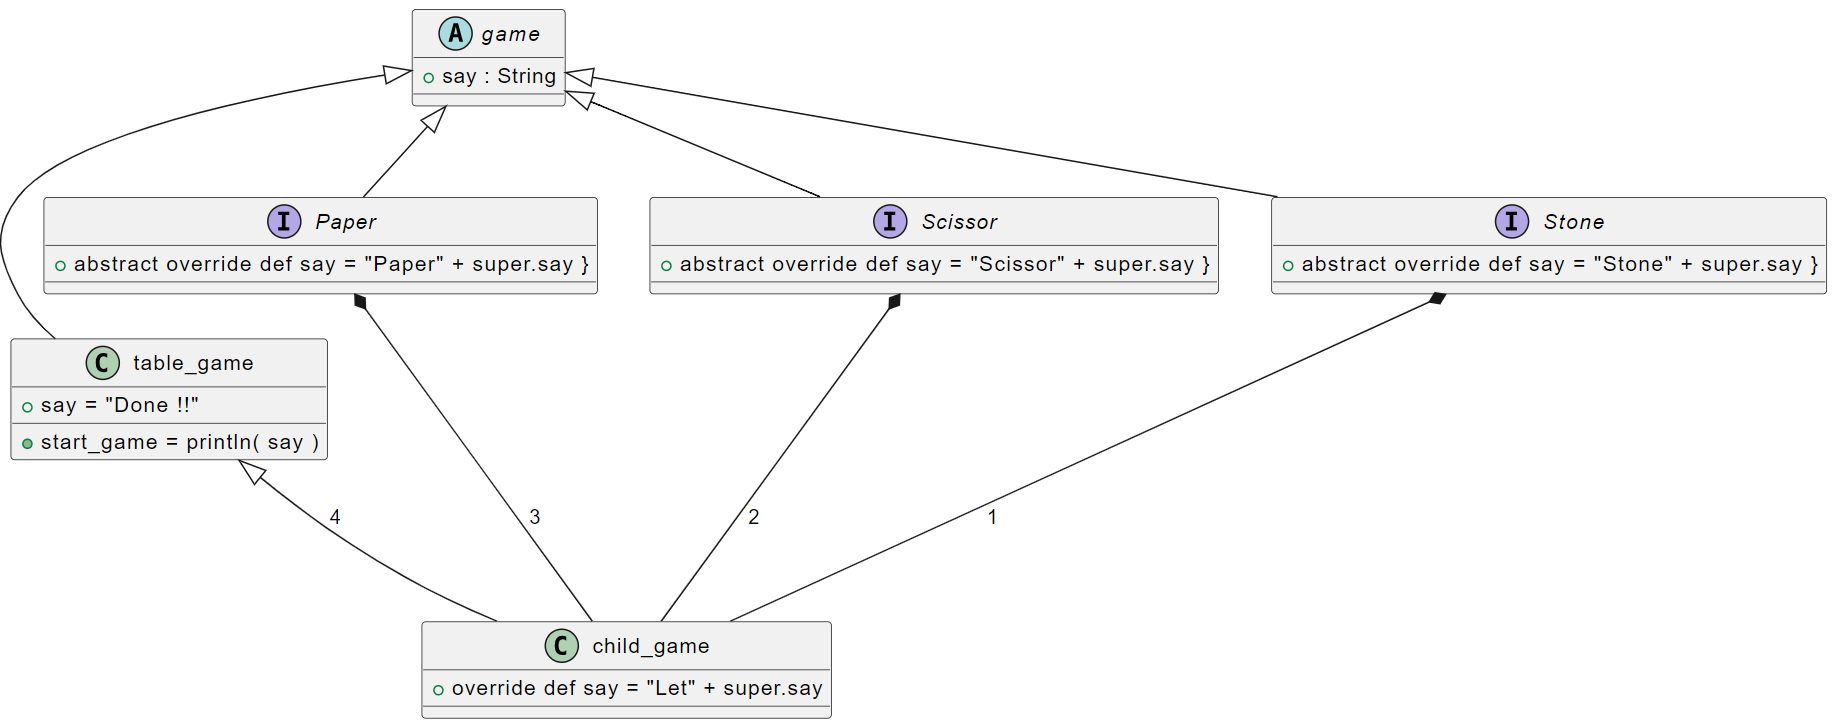
      以这种方式可以实现所谓的 <font color=darkred>**stackable**</font>.

      ```scala
      abstract class game {
        def say : String
      }
      class table_game extends game {
        def say = " Done !!"   4️⃣
        def start_game  = println( say)
      }
      trait Paper   extends game { abstract override  def say =  "Paper " + super.say } 3️⃣
      trait Scissor extends game { abstract override def say = "Scissor " + super.say } 2️⃣
      trait Stone   extends game { abstract override def say = "Stone " + super.say } 1️⃣
                🤩                4️⃣           3️⃣⃣         2️⃣          1️⃣
      class child_game extends table_game with Paper with Scissor with Stone {
        override def say = "Let " + super.say 🤩
      }
      ```

      调用顺序是
      ```scala
      🤩 ➡ 1️⃣   2️⃣     3️⃣    4️⃣
      Let Stone Scissor Paper Done !!  // output
      ```

## 如何让一个<font color=darkred>`Trait`</font> 必须 Mixin 某一个类或是另外一个 <font color=darkred>`Trait`</font> ？

---
**Self type**

A **self type** of a <font color=darkred>`Trait`</font> is the assumed type of `this`, the receiver, to be used within the trait.
Any concrete class that mixes in the trait must ensure that its type conforms to the trait’s self type.  

----

- 被 Mixin的 <font color=darkred>`Trait`</font>
  ```scala
  trait HasLegs {  def numLegs = 0 }
  ```

- <font color=darkred>`Trait`</font> 里面指定 **必须要Mixin的 trait or Class**

  ```scala
  trait CanRun {
    this: HasLegs =>      🛃 // 必要提供这个类 ！！！
    def run() = println(s"I have $numLegs legs and I’m running!") 👈 可以使用HasLegs里面的 numLegs
  }
  ```
- 当被使用时候，如果 mixin 了 `Canrun`, **则必须也要 Mixin** `HasLeg` ❗❗
  ```scala
  class Dog extends CanRun with HasLegs 🛃 { override val numLegs = 4 }
  val d = new Dog
  d.run()  // output "I have 4 legs and I’m running!"
  ```
- 如果需要绑定多个<font color=darkred>`Trait`</font>， 用`with`

  ```scala
   this: HasLegs with HasNose =>
  ```

因为有些 <font color=darkred>`Trait`</font> 必须在和其他<font color=darkred>`Trait`</font>一起时候才可以有意义，比如`CanRun`可以 Mixin 任何动物。但是必要和 `HasLeg` 这个<font color=darkred>`Trait`</font>一起才能有意义。



## 如何让一个<font color=darkred>`Trait`</font> 要求被 **Mixin** 的类或是其他 <font color=darkred>`Trait`</font> 必须有某个函数 ？


和上面`self-type`相似，不过将要求的类**换成了方法**。

---
**Structural type**

limiting what classes the
trait can be mixed into by stating that the class must have a certain structure, i.e., the method signatures you’ve specified.     

---

- 作为要求者的 <font color=darkred>`Trait`</font>，申明被Mixin的类里面必要有的方法的 **singature**
  ```scala
  trait WarpCore {
    this: {
      // an implementing class must have methods with these names and input parameters
      def ejectWarpCore(password: String): Boolean   🐕
      def startWarpCore(): Unit                      🐟
    } =>
  }
  ```

- 等Mixin 时候，必须提供具体的实现

  ```scala
    class Starship
    class Enterprise extends Starship with WarpCore {
      def ejectWarpCore(password: String): Boolean = {   🐕
        if (password == "password") true else false
      }
      def startWarpCore() = println("core started")      🐟
  }
  ```

# Chapter 13 Packages and Imports

## Package Declaration

### 传统的 ▶ 放文件顶。也是使用最广的

```scala
package com.acme.store
class Foo { override def toString = "I am com.acme.store.Foo" }
```

### C++ 和 C## 类型 ▶ 用`{ }` 更简练,结构更清晰

```scala
package com.acme.store {
  class Foo { override def toString = "I am com.acme.store.Foo" }
}
```

###<font color=darkred> `{ }`</font> 声明的优点:

1. 可以多个 package 放在一个文件中。  
   而传统的声明方式，放在顶层，则该文件不能声明其他同层的package了。
2. 嵌套声明package结构明了。

```scala
  package orderentry {    ⬅  // Level 1️⃣ 同层
    class Foo {  override def toString = "I am orderentry.Foo" }
    object Foo {  def apply(): Foo = new Foo()  }
  }

  package customers {     ⬅  // Level 1️⃣ 同层
    class Foo { override def toString = "I am customers.Foo" }
    object Foo {  def apply(): Foo = new Foo()  }

    package database {   ⬅  // Level 2️⃣ 下一层
      class Foo { override def toString = "I am customers.database.Foo"  }
      object Foo {  def apply(): Foo = new Foo()  }
    }
  }

  object pkg_import extends App {
    println( orderentry.Foo()) // I am orderentry.Foo  : 1️⃣.Foo
    println(customers.Foo()) // I am customers.Foo :     1️⃣.Foo
    println(customers.database.Foo())  // I am customers.database.Foo : 1️⃣.2️⃣.Foo
  }
```

### 多Package的传统方式表达

- 传统文件顶部声明
  ```scala
  package customers
  package database     
  class Foo { .....  }
  ```

- 它等价于
  ```scala
  package customers.database
  class Foo { .....  }
  ```

- `{ }`的表示方法 ✔️
  ```scala
  package customers {     ⬅  // Level 1️⃣
    package database {    ⬅  // Level 2️⃣
        class Foo { ..... }
    }
  }
  ```

## Package 和 Import

### 可以import一个Package里面任何level的东西

```scala
import package_a.class_A
import package_a.{class_A,Object_B,...}
import package_a._             
```

### Import 时候可以**rename**（通过`=>`)

```scala
                             🔰
import package_a.{class_A => CCC ,Object_B,...}
import package_a.{class_A => CCC , _ }  // Import "all" with renaming "class_A"
 ```

### Import时候**排除**某个object

```scala
import package_a.{class_A => _ , _ } // :exclude "class_A"
```

### 可以在**任何地方**Import,包括在 **pakcage**, **函数**，**类的声明**甚至于**程序体**里面

- 函数里
  ```scala
  def method = {
    import package_a._
  }
  ```
- 程序体里
```scala
  def printRandom = {
    {
      import scala.util.Random   ❗// 它只可以被当前所在的{}里面code使用
      val r1 = Random() ✅ //this works, as expected  
    }
    val r2 = Random()  ⛔ //error: not found: Random
    import scala.util.Random   ⚡ // 放到后面import 也不行
  }
  ```

- 注意

  **`import`如果是在使用者的后面，也不可** （见上面例子）❗❗

## Import 静态方法

Import不只是可以引进Package，也可以引进<font color=blue>`object`</font>里面的方法（因为是在`object`里面，所以它们等同于静态方法)

- 静态方法
  ```scala
  object tools {   // stanalone object 专门收集公用方法的。
    def truncate(s: String, length: Int): String = s.take(length)
    def leftTrim(s: String): String = s.replaceAll("^\\s+", "")
  }
  ```

- 没有import前,需要加`tools`
  ```scala
  val a  = tools.truncate("four score and seven ", 4) // "four"
  val b  = tools.leftTrim(" four score and ")  
  ```

- import后,**不需要加`tools`**，直接使用方法。
  ```scala
  import tools._   👈 // import whole object  
  val a  = truncate("four score and seven ", 4)
  val b  = leftTrim(" four score and ")  
  ```

# Chapter 15 A. Case Classes

## <font color=darkred>Case class</font> vs class

```scala
case class Person(name: String, relation: String)
val emily = Person("Emily", "niece")
```


1. **不需要**用`new`产生实例 🎯 ❗   
   这背后是Compiler做了很多工作，对`case class`的使用也产生很大的影响.

   + 首先，compiler 对 `case class`生成了多达**30**个`method`, 而一般`class`只生成 5个method. 这包括了
    - `tostring`
    - `equals`
    - `hashCode`
    - `unapply` - 服务于 `match expression`
  
  这些method 将在以下section 专门讲解

   + compiler 对 `case class`生成了一个**伴生对象(companion object)**.

     **最重要的是**，该**伴生对象**里面有一个方法 <font color=blue>`apply()`</font>.

     所以，没有`new`的生成实例的方法，实际是调用了该类的**伴生对象的<font color=blue>`apply()`</font>**方法。
     例如

      `val emily = Person("Emily", "niece")`  
      
      等价于
      ```scala
      val emily = Person.apply("Emily", "niece")
      ```
      
      where `apply()`是在下面的bytecode里面定义的

      ```java
      public final class Person$ {   // Bytecode for companion object Person$
        public Person apply(java.lang.String, int);
      }
      ```


2. 参数自动被加 **val**， 这意味着参数**自动成为类的field**.

   而普通类的参数要明确加`val`或`var`,才能成为类filed.

   如果参数是`var`，则要明确加入。 可见这个方便写法是服务于FP使用者的，他们一般不让参数被修改.

2. 自动添加`copy`方法

   可以**`clone`**一个实例或对象，并同时给出必要的修改。
   ```scala
   case class Person(firstName: String, lastName: String)
                               🐕
   val fred = Person("Fred", "Flintstone")
                                      🐟
   val wilma = fred.copy(firstName = "Wilma")  // Clone !!!
   ```
   它等级于
   ```scala
                        🐟          🐕
   val wilma = Person("Wilma", "Flintstone")
   ```

## `Case Class` 的 辅助构造器

 💣 辅助构造器的问题  

下面的`case class` 里面虽然声明了**辅助构造器**，但外面一旦调用， compiler 会报错，说是参数不够。

```scala
case class Person(var name: String, var age: Int) {
  def this(name : String ) = this (name,0 )    // 辅助构造器可以定义，等调用不了
}

val guy = Person("Bob")   ⛔ // Compiler 会报错 ！！！
```

---

**Root Cause**

因为是`case class`，而且是使用了**非`new`的方法**产生实例，则compiler实际调用的是`apply()`,而`apply()`是接受两个参数的。你提供一个name，当然报错了。

---

Workaround 1️⃣



放弃使用了**非`new`的方法**产生实例，还是用`new`, 这样类就不会调用伴生对象里面的`apply()`了，而是调用类里面的**辅助构造器**。

```scala
val guy = new Person("Bob") ✅
```


Workaround 2️⃣

显示地写一个**伴生对象**，在里面定义多个`apply(...)`方法。注意，该**伴生对象**会merge进compiler最终产生的**伴生对象**里，**不会**override.

```scala
object Person {
  def apply() = new Person("<no name>", 0) // zero-args constructor
  def apply(name: String) = new Person(name, 0) // one-arg constructor
}
```

这样

```scala
val a = Person() // Person(<no name>,0)
val b = Person("Sarah Bracknell") // Person(Sarah Bracknell,0)
val c = Person("Sarah Bracknell", 32) // Person(Sarah Bracknell,32)
```


## `unapply()`服务于 <font color=navy> match expression</font>

- 最简单的形式 </summary>

  ```scala
  val bob = Person("Bob", 20)
  bob match { case Person(n,r) => println(s"$n is $r years old") }

  ```


## Sealed Class/Trait

- 应用对象

  <font color=darkred>Sealed</font> 可以作用于
  - class
  - trait
  -abstract class

- 作用

  被加了<font color=darkred>Sealed</font> 的 `class` 或 `trait`,它们的**子类**必须定义在**同一个文件**。否则编译报错。

  ```scala
    ⏬          ✊
  sealed trait Shape
                                             ✊
  case class Circle(radius: Double) extends Shape
                                                               ✊
  case class Rectangle(height: Double, width: Double) extends Shape
                              ✊
  case class Point() extends Shape
  ```

- 目的

  因为被<font color=darkred>Sealed</font>的类的**子类**都在同一个文件里，那compiler在处理 `{ mactch-case }`的多个涉及这些**子类**的选项时候，<font color=blue> 可以检查是否所有该类的**子类**，都在`case`里面</font>，即 case是否穷尽了所有的子类类型。 如果有遗漏的**子类**，则compiler 会 <font color=brown>`warning`</font> 以提醒开发者。至于补不补上这些子类，由开发者决定。 开发者如果肯定传入的类型就是有限的几种，那可以不用把所有的子类都加上。

  例如下面的例子， 只是`case`了两个子类，而没有子类 <font color=navy>`Point`</font>
  ```scala
    def check( s : Shape ) : String = s match {
    case Circle(_)      => "This is Circle"
    case Rectangle(_,_) => "This is Rectangle"
  }

  ```
  Compiler 会报告下面的 <font color=brown>`warning`</font>

  ```
  match may not be exhaustive. It would fail on the following input: Point()
  def check( s : Shape ) : String = s match {
  ```  
  
- 注意事项

 + 继承于<font color=darkred>Sealed</font>的类的**子类**，要是 **`case class`** 才可以用 match-case.
 + **孙类**可以不受<font color=darkred>Sealed</font>限制，可以在别的文件里面声明。

## 可以继承一个 `case class` 吗 ？

> 可以，但是**不鼓励** !!!


- 继承 `Case Class` 潜在的问题

  - `case class` 是一种方便的方法，里面加了许多方法。但这些优点在被继承时候会产生很多问题。例如 `equal`, `copy` 和 `hasCOde`.
  - `case class`  一般用于**不可以写**的数据结构.如果被扩展了，就有可能引进 `mutable`
  - Compiler 对 `case class` 有优化。扩展它可能错失这些优化
  - 从可读性和清晰性考虑，扩展`case class`会导致混乱。

- 如何解决继承问题 ？

  **用 <font color=darkred>`composition`</font> 来代替 继承**.

  把**要被继承的类**作为参数传入<font color=navy>**新类**</font>，在<font color=navy>**新类**</font>里面保存要更新的内容。

  ```scala
              🐶
  case class Book(title: String, ISBN: String)
                                 🐶
  case class PromotedBook(book: Book, discount: Double) // composition
  ```

# Chapter 15 B. Pattern matching

## **Constant pattern** - *Like a `switch`statement ( 各个语言都提供的）*

- 基本应用

  ```scala
  def describe(x: Any) = x match {
    case 5 => "five"             // Int
    case true => "truth"         // Boolean
    case "hello" => "hi!"        // String
    case Nil => "the empty list" // an empty singleton object list
    case _ => "something else"   // default
  }
  ```

- 提高性能 - 使用 <font color=drakred> **`@switch`**</font>  annotation

  使用 <font color=drakred> **`@switch`**</font> 配合 `match` 可以让其被编译成`tableswitch` 或 `lookupswitch`. 因为这两个是 **branch table**, 对于要比较的数值，可以直接通过查找表找到结果。 否则，查找是通过决策树一层一层的查找，当case较多时候，查找时间会延长。

  ```scala
                  🔽
  val day = (i: @switch) match {
    case 0 => "Sunday"
    case 1 => "Monday"   // if "1" 换成变量，则不可以生成`tableswitch` 或 `lookupswitch`
    case 2 => "Tuesday"
    case 3 => "Wednesday"
    case 4 => "Thursday"
    case 5 => "Friday"
    case 6 => "Saturday"
    case _ => "invalid day" // the default, catch-all
  }
  ```

  ⚡生成`tableswitch` 或 `lookupswitch`的条件

   + The matched value must be a known integer.
   + The matched expression must be “simple.” It can’t contain any type checks, if
  statements, or extractors.
   + The expression must have its value available at compile time.
   + There should be more than two case statements.

-  Multiple Conditions

    ```scala
    i match {
        case 1 | 3 | 5 | 7 | 9     => println("odd")
        case 2 | 4 | 6 | 8 | 10    => println("even")
        case _ => println("too big")
    }
    ```
- 用 `map`来代替`match-case`

  ```scala
    val days_2 = Map(
      0 -> "Sunday",
      1 -> "Monday",
      2 -> "Tuesday",
      3 -> "Wednesday",
      4 -> "Thursday",
      5 -> "Friday",
      6 -> "Saturday"  🌞
    )
  
    days(6)  // Output :  Saturday 🌞
  ```



## **Variable patterns**

  注意: 变量还是常数 ?
  + 一般情况
    ```scala
      val one = 1
      val day = (i: @switch) match {
        case 0     => "Sunday"
        case one    => "Monday"
        case 2    => "Tuesday"
        case 3    => "Wednesday"
        case 4    => "Thursday"
        case 5    => "Friday"
        case 6    => "Saturday"
        case _    => "invalid day" // the default, catch-all
      }
  ```
  `one` 是作为变量名对待, 当 `i= 2`, output 是
  ```scala
  "Monday"
  ```
  因为 `one` 是作为变量名，接受了所有不等于`0`的branch.



  - 常数情况 - 加  <font color=red>**\`**</font> ... <font color=red>**\`**</font>
    ```scala
      val one = 1  ✌
      val day = (i: @switch) match {
        case 0     => "Sunday"
        case `one`    => "Monday"  ✌
        case 2    => "Tuesday"
        case 3    => "Wednesday"
        case 4    => "Thursday"
        case 5    => "Friday"
        case 6    => "Saturday"
        case _    => "invalid day" // the default, catch-all
      }
  ```
  `one` 是作为**常数**对待, 当 `i= 2`, output 是
  ```scala
  "Tuesday"
  ```
   **case <font color=red>\`</font>one<font color=red>\`</font> => "Monday"**   等价于 `case 1 => "Monday"`.

## **Constructor patterns**

```scala
case class Person(firstName: String, lastName: String)
case class Dog(name: String)

def test(x: Any): String = x match {
  case Person(first, "Alexander") => s"found an Alexander, first name = $first"
  case Dog("Zeus") => "found a dog named Zeus"
}

test(Person("Melissa", "Alexander"))  // output : Alexander, first name = Melissa
test(Dog("Zeus"))  // Output : found a dog named Zeus
```

## **Sequence patterns**

- 基本应用

  ```scala
  def test(x: Any): String = x match {
    case List(0, _, _) => "a 3-element list with 0 as the first element"   👽
    case List(1, _*) => "list, starts with 1, has any number of elements"  🐫
    case _ =>      // output unit value `()`
  }

  test(List(0,1,2))    // a 3-element list with 0 as the first element  👽
  test(List(1,2))      // list, starts with 1, has any number of elements  🐫
  test(List(1,2,3))    // list, starts with 1, has any number of elements  🐫
  ```

- `List` + `Match` ➡ 递归

   利用 `List` 最右边是 <font color=darkred> Nil </font>, 在 `match-case` 帮助下实现递归：

   + 模板

   ```scala
    def myTraversalMethod[A](xs: List[A]): B = xs match {
        case head :: tail =>
          // do something with the head
          // pass the tail of the list back to your method, i.e.,
          // `myTraversalMethod(tail)`
        case Nil =>
          // end condition here (0 for sum, 1 for product, etc.)
          // end the traversal
    }
    ```

   + 例子 1

    ```scala
    def listToString(list: List[String]): String = list match {
        case s :: rest => s + " " + listToString(rest)
        case Nil => ""
    }
    ```
   + 例子 2 ： List 加

    ```scala
    def sum(list: List[Int]): Int = list match {
        case Nil => 0
        case n :: rest => n + sum(rest)
    }
    ```
   + 例子 3 ： List 乘法

    ```scala
    def product(list: List[Int]): Int = list match {
        case Nil => 1
        case n :: rest => n * product(rest)
    }
    ```
    Remark

    - Build-in long form
    ```scala
    def sum(list: List[Int]): Int = list.reduce((x,y) => x + y)
    ```
    - Build-in short form
    ```scala
    def sum(list: List[Int]): Int = list.reduce(_ + _)
    ```





## **Tuple patterns**


```scala
def test(x: Any): String = x match {
  case (a, b, c) => s"3-elem tuple, with values $a, $b, and $c"  👽
  case (a, b, c, _) => s"4-elem tuple: got $a, $b, and $c"       🐫
}

p(test((1,2,3))) // got 1 , 2 and 3  👽
p(test((1,2,3,4))) // got 1, 2, 3 and 4 🐫
```




## **Typed patterns** 🎯

- 例子
  ```scala
  def test(x: Any): String = x match {
    case s: String => s"got a string: $s"     👽
    case i: Int => s"got an int: $i"          🐫
    case f: Float => s"got a float: $f"       🐶

    case d: Dog => s"dog: ${d.name}"
    case list: List[_] => s"got a List: $list"
    case m: Map[_, _] => m.toString
    case _ => "Unknown"
  }

  // trigger the typed patterns
  test("Hello, world") // got a string: Hello, world  👽
  test(42) // got an int: 42                🐫
  test(42F) // got a float: 42.0            🐶
  test(Dog("Fido")) // dog: Fido
  test(List("apple", "banana")) // got a List: List(apple, banana)
  test(Map(1->"Al", 2->"Alexander")) // Map(1 -> Al, 2 -> Alexander)

  ```

- `Array[<type>]` 可以识别成员的**类型** ✅

  只有**Array**可以识别出里面包含的成员的**类型**. ❗❗❗❗

  ```scala
  def test(x: Any): String = x match {
    case a: Array[Int] => s"array of int: ${a.mkString(",")}"  😨
    case as: Array[String] => s"string array: ${as.mkString(",")}"  🦐
  }

  test(Array(1,2,3)) // array of int: 1,2,3 😨
  test(Array("coffee", "apple pie")) // string array: coffee,apple pie 🦐
  ```

- 其他collection 不可以识别成员的**类型** ⛔

  ```scala
  def test(x: Any): String = x match {
    case m: Map[Int, Int] => m.toString  😨
    case m: Map[String, String] => "I am string Map!!!"  🦐
    case m: Map[_, _] => m.toString   
  }

  test(Map(1 -> 1))          //  Map(1 -> 1 ）  😨  捕获成功  ✅
  test(Map("abc" -> "abc")) //   Map(”abc" ->  "abc" ）不是要的捕获 😨 ❗❗❗ ❌
  ```
  Compiler 会报告 <font color=darkred>warning</font>, 即 无论`Map[String, String]` 还是 `Map[Int, Int]` 都被视为 <font color=navy>Map[_, _]<font>.


-  代替 `isInstanceOf` 🎯

  但是， `isInstanceOf` 更直接 ：
  ```scala
  x.isInstanceOf[String]
  x.isInstanceOf[Int]
  ```




## **Variable-binding patterns**

- Pattern 和 变量不可兼得的问题
 + 只是 `pattern` ✅
  ```scala  👲
     case List(1, _*) => "a list beginning with 1, having any number of elements"
  ```
 + 只是变量 ✅
 ```scala
         ⚓                                  ⚓
    case a: List[_] => s"thanks for the List: $a"
  ```
   **注意**

    `List[_] ` 是指的变量 `a` 的类型，而不是`pattern`

 -  Pattern 和 变量 ⛔

    ```scala
         ⚓    👲                                 ⚓
    case a: List(1, _*) => s"thanks for the List: $a"
    ```
    
    这是因为没有 `List(1, _*)` 这个类型。
  
  - **解决方法**

     如何即 match-pattern, 又捕捉变量？  用 <font color=drakred>`@`</font>
     ```scala
         ⚓      👲
     case a @ List(1, _*) => s"$a"
     ```

- 例子

 + Pattern 定义

    ```scala
        case class Person(firstName: String, lastName: String)

        def matchType(x: Matchable): String = x match
          //case x: List(1, _*) => s"$x" // doesn’t compile  ⛔
          case x @ List(1, _*) => s"$x" // prints the list   1️⃣
          //case Some(_) => "got a Some" // works, but can’t access the Some
          //case Some(x) => s"$x" // returns "foo"   
          case x @ Some(_) => s"$x" // returns "Some(foo)"   2️⃣
          case p @ Person(first, "Doe") => s"$p" // returns "Person(John,Doe)" 3️⃣
        end matchType
    ```

  + 应用

    ```scala
      println(matchType(List(1,2,3)))  1️⃣ // prints "List(1, 2, 3)"
      println(matchType(Some("foo")))  2️⃣ // prints "Some(foo)"
      println(matchType(Person("John", "Doe"))) 3️⃣ // prints "Person(John,Doe)"
    ```


## Add **if** to gaurd `Case`

- Match a range of numbers

  ```scala
  i match {
    case a if (  0 to  9 contains a ) => println("0-9 range: "   + a)
    case b if ( 10 to 19 contains b ) => println("10-19 range: " + b)
    case c if   20 to 29 contains c   => println("20-29 range: " + c)  // 没有()也行
    case _ => println("Hmmm...")
  }
  ```

- Match different values of an object

  ```scala
  i match {
    case x if x == 1 => println("one, a lonely number")
    case x if (x == 2 || x == 3) => println(x)
    case _ => println("some other value")
  }
  ```

  更简练的写法 ⚡⚡⚡⚡
  ```scala
  case x @ (2, 3) => println(x)
  ```


- Match class fields

  ```scala
                    🐶             🐟
  case class Stock(symbol: String, price: BigDecimal) // 🐶和🐟由于case class,自动成为filed
       🍰
  val stock = Stock("AAPL", BigDecimal(132.50))
  ```
  ```scala
  stock match {
                  🐶                   🐟               🍰
    case s if s.symbol == "AAPL" && s.price < 140 => buy(s)
                  🐶                   🐟               🍰
    case s if s.symbol == "AAPL" && s.price > 160 => sell(s)
    case _ => // do nothing
  }
  ```

- **Constructor** + **if**

  ```scala
    case class Man(aName: String)

    def speak(p: Man): Unit = p match {
      case Man(name) if name == "Fred"    =>   println("Yabba dabba doo") 1️⃣
      case Man(name) if name == "Bam Bam" =>   println("Bam bam!")        2️⃣
      case _ =>   println("Watch !!! ")
    }

    speak(Man("Fred"))
    speak(Man("Bam Bam"))
    speak(Man("CCT"))

  ```

  也可以直接用**构造器**做 pattern,而**不需要 if**  - 更简洁 ！

  ```scala
      def speak(p: Man): Unit = p match {
        case Man("Fred")    =>   println("Yabba dabba doo")  1️⃣
        case Man("Bam Bam") =>   println("Bam bam!")         2️⃣
        case _ =>   println("Watch !!! ")
    }
  ```

# 🎯 专题：如何在 **scala 2** 中实现枚举类型 ？

---
**Solution**
- 枚举定义
  + sealed trait  1️⃣
  + case object   2️⃣
    - **Memory Efficiency** : Case objects are singletons, meaning that **only one** instance of each case object exists in memory
    - **Immutability**: Case objects are immutable by design, which aligns well with the concept of enumeration values being constant and unchanging.
    - **Improved Type Safety** : When using case objects for enumerations, the compiler can perform additional checks and optimizations since it knows that there can only be one instance of each case object.
    - **Simpler Syntax**: Defining enumeration values as case objects is more concise and easier to read than defining them as case classes. There is no need to define constructor parameters or companion objects.
    - **Equality and Hashcode**: Case objects have built-in support for equality and hashcode calculation, which is useful when working with collections or using them as keys in maps.

- 枚举使用
  + match-case    3️⃣

---


## Example 1

- 枚举定义
  ```scala
  sealed trait Color   1️⃣

  case object Red extends Color    2️⃣
  case object Green extends Color  2️⃣
  case object Blue extends Color   2️⃣
  ```
- 枚举使用
  ```scala
  def printColor(color: Color): Unit = color match {   3️⃣
    case Red   => println("The color is Red")
    case Green => println("The color is Green")
    case Blue  => println("The color is Blue")
  }

  printColor(Red)   // Output: The color is Red
  printColor(Green) // Output: The color is Green
  printColor(Blue)  // Output: The color is Blue
  ```

## Example 2

- 枚举定义
  ```scala
    sealed trait Direction {       1️⃣
      def description: String
    }

    case object North extends Direction {    2️⃣
      val description = "The northern direction"
    }

    case object South extends Direction {    2️⃣
      val description = "The southern direction"
    }

    case object East extends Direction {     2️⃣
      val description = "The eastern direction"
    }

    case object West extends Direction {    2️⃣
      val description = "The western direction"
    }️

  ```
- 枚举使用
  ```scala
  val myDirection = North         3️⃣
  println(myDirection.description) // Output: The northern direction
  ```

# Chapter 16 List

## List 特点

1. 类型必须一致

   ```scala
    val fruit: List[String] = List("apples", "oranges", "pears") // 不写 List[String] 也可以，scala 会自动推导
    val nums: List[Int] = List(1, 2, 3, 4)
   ```
2. 成员**不能**修改

🎯 `java.util.List` 会转为 Scala 的 **`Bufer`** 或 **`Seq`**, 而不是 Scala <font color=darkred>List</font>

## 产生一个 <font color=darkred>List</font>

- 直接生成

  ```scala
    val a = List(1, 2, 3)       // List(1, 2, 3)
    val d = Nil                 // List()
    val e = List()
  ```
  Note:

    `Nil` 是空的 <font color=darkred>List</font>， 和 `List()`一样

-  多个 `element` 通过 <font color=red>**：：**</font> 拼接成
    ```scala
    val b = 1 :: 2 :: 3 :: Nil  1️⃣ // List(1, 2, 3)
    val c = 1 :: List(2, 3)     2️⃣ // List(1, 2, 3)
    ```

  Remark :

  基本形式必须是 ：

  >$f::⋯::c::b:a::L $

  Where  
  + $a,b,c,\cdots,f$ 必须是 要插入的 `element`.
  + $L$ 必须是 <font color=darkred>List</font>
    - 空的 如 1️⃣
    - 或是一个存在的<font color=darkred>List</font>，如2️⃣

- 增加成员可以使用以下两种方法，但对长列表性能差：
  ```scala
  val fruits = List("Apple", "Banana", "Orange")
  ```

  + 加在 List 前， 如 <font color=red>**：：**</font>
    ```scala
                                 ⚓
    val anotherNewFruits = "Kiwi" +: fruits // List("Kiwi", "Apple", "Banana", "Orange")
    ```
  + 加在 List 尾
    ```scala
                           ⚓
    val newFruits = fruits :+ "Grape" // List("Apple", "Banana", "Orange", "Grape")
    ```  
   
    

   
- 使用 **`range`** 转化来

  ```scala
  val f = List.range(1, 10)       // List(1, 2, 3, 4, 5, 6, 7, 8, 9)
  val h = List.range(0, 10, 2)    // List(0, 2, 4, 6, 8)
  (1 to 5).toList                 // List(1, 2, 3, 4, 5)
  (1 until 5).toList              // List(1, 2, 3, 4)
  (1 to 10 by 2).toList           // List(1, 3, 5, 7, 9)
  (1 to 10 by 3).toList           // List(1, 4, 7, 10)
  ('a' to 'e').toList             // List(a, b, c, d, e)
  ('a' to 'e' by 2).toList        // List(a, c, e)
  ```

- 其他特别的产生 **List** 的方式

  ```scala
    val xs = List.fill(3)("foo") // xs: List(foo, foo, foo)
    val xs = List.tabulate(5)(n => n * n) // xs: List(0, 1, 4, 9, 16)
    val xs = "hello".toList // xs: List[Char] = List(h,e,l,l,o)

    // result contains 52 letters and 10 numbers
    val alphaNum = (('a' to 'z') ++ ('A' to 'Z') ++ ('0' to '9')).toList
 ```

## 合并两个 <font color=darkred>List</font>

### 1. **或** 两个 List <font color=blue>➡</font>   选出两个 List 所有的成员

- Using <font color=blue>**:::**</font>  -  快！推荐！
  ```scala
  List(1, 2) ::: List(3, 4, 5) //  List(1, 2, 3, 4, 5)
  List() ::: List(1, 2, 3)     //  List(1, 2, 3)
  List(1, 2, 3) ::: List(4)    //  List(1, 2, 3, 4)
  ```

- Use `++` 或 `concat`  - 慢！适合不大的List. 好处是比较好记住。

  ```scala
  val a = List(1, 2, 3)
  val b = List(4, 5, 6)
  // '++' is an alias for 'concat', so they work the same
  val c = a ++ b // c: List(1, 2, 3, 4, 5, 6)
  val c = a.concat(b) // c: List(1, 2, 3, 4, 5, 6)
  ```

### 2. **与** 两个 List   <font color=blue>➡</font>   选出两个 List 里面的共同的成员

- Intersecting two lists
```scala
  val list1 = List(1, 2, 3, 4, 5)
  val list2 = List(4, 5, 6, 7, 8)
  val intersection = list1.intersect(list2) // Output: List(4, 5)
```

### 3. **非** 两个 List   <font color=blue>➡</font>   选出两个 List 里面的不同的成员

- Computing the **difference** between two list
```scala
val difference = list1.diff(list2) // Output: List(1, 2, 3)
```

## 分解 <font color=darkred>List</font>

### 1. 分解成 head + tail 或 init + last

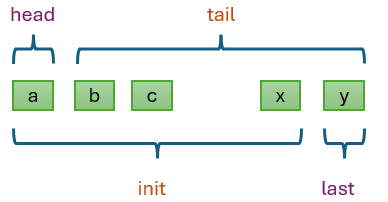

Note ：

`List()` 是**没有** `head` 和 `last` 的。 访问它们会出错。 解决方法是：调用
<font color=darkred> **`isEmpty`**</font> 检查先。



### 2. 提取出 `n` 个成员的 成为一个 List : **drop**, **take**, **dropRight**, **takeRight**, **dropWhile** and **takeWhile**



  
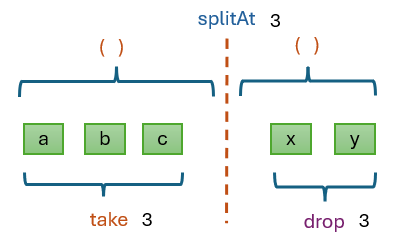


- 从左边开始 （缺省）
 + **take** <font color=brown>n</font>    ➡➡ 取出**前面**<font color=brown>n</font>个成员
 + **drop** <font color=brown>n</font>    ➡➡ 去掉**前面**<font color=brown>n</font>个成员后，剩下的。

- 从右边开始 （和上面反方向）
 + **take** <font color=brown>n</font>    ➡➡ 取出**后面**<font color=brown>n</font>个成员
 + **drop** <font color=brown>n</font>    ➡➡ 去掉**后面**<font color=brown>n</font>个成员后，剩下的。

- 从左边开始，带筛选条件
 + **takeWhile** <font color=brown>n</font>    ➡➡ 取出**前面**<font color=brown>满足条件的</font>个成员。
 + **dropWhile** <font color=brown>n</font>    ➡➡ 去掉**前面**<font color=brown>满足条件的</font>个成员后，返回留下的。


```scala
val x = (1 to 10).toList

val y = x.drop(3)             // y: List (         4, 5, 6, 7, 8, 9, 10)
val y = x.dropRight(4)        // y: List (1, 2, 3, 4, 5, 6             )
val y = x.dropWhile( _ < 6 )  // y: List(                7, 7, 8, 9, 10)  

val y = x.take(3)             // y: List(1, 2, 3                       )
val y = x.takeRight(3)        // y: List(                      8, 9, 10)
val y = x.takeWhile(_ < 5)    // y: List(1, 2, 3, 4                    )
```

Remark

由于 List 的构成方式，使得从 List 后端的操作都和 List 的长度有关。当 List 较长时候， 像 **dropRight**, **takeRight** 都会较慢。 建议使用带 Index的Collection, 比如 **Vector**.

### 3. 分解成两个 List : **splitAt**, **partition** and **span**.

 ```scala
 val xs = List(15, 5, 25, 20, 10)
 ```

- **splitAt** <font color=brown>n</font>  
  分别返回**前面**<font color=brown>n</font>个成员，和剩下的为两个 **List**。  

  ```scala
  val ys = xs.splitAt(1) // ys: (List(15), List(5, 20, 10))
  val ys = xs.splitAt(2) // ys: (List(15, 5), List(20, 10))
  ```
- **partition**   
  产生两个 List, 一个是能通过判断为`true`的那些成员，另外一个是不符合判断`false`的成员

  ```scala
  val ys = xs.partition(_ > 10) // ys: (List(15, 25, 20), List(5, 10))
  val ys = xs.partition(_ < 25) // ys: (List(15, 5, 20, 10), List(25))

  scala> val (a,b) = xs.partition(_ > 10)
  val a: List[Int] = List(15, 20)
  val b: List[Int] = List(5, 10)
  ```
- **span**

  和 **partition** 一样， 但不同点是：
  + 返回一个元组，而不是两个 List。 元组里面有两个 List
  + 比较的逻辑不同。 **span** 是从List 头部开始按照判断函数找，直到遇到不符合的元素为止。将之前找的所有元素放入第一个List中。对于后面的元素，**尽管还有符合该判断函数的，也不管了**，统统放入第二List中。

  Example

  ```scala  
  val numbers = List(1, 9, 3, 7, 10)
  ```
   - **partition**
    ```scala
    val (lessThan8, greaterOrEqual8) = numbers.partition(_ < 8)
    // lessThan8: List[Int] = List(1, 3, 7)
    // greaterOrEqual8: List[Int] = List(9, 10)
    ```
   - **span**
    ```scala
    val (prefixLessThan8, restGreaterOrEqual8) = numbers.span(_ < 8)
    // prefixLessThan8: List[Int] = List(1)
    //                                         🐶 🐟
    // restGreaterOrEqual8: List[Int] = List(9, 3, 7, 10)
    ```
    `3` 和  `7` 被 **partition**处理后是放在第一个List `lessThan8` 里，而对于 **span** 来说，在 遇到`9`之后，就放弃查找，统统归于  List `restGreaterOrEqual8`. 所以，即使`3` 和  `7`小于8，但**span**还是放在后一个 List 里面。


### 4. 分解成多个 collection  - **groupBy** and **sliding**


- **groupBy**

  根据 `predicte function`的条件, 分解List 出多个 Sequence 并放入 `Map` 中

  + 两类

    ```scala
    val xs = List(15, 10, 5, 8, 20, 12)
    val groups = xs.groupBy(_ > 10)
    ```

  + 多类

    ```scala
    val xs = List(1, 3, 11, 12, 101, 102)
    def groupBy10s(i: Int): Int = {
      assert(i > 0)
      if (i < 10)   1
      else if ( i < 100)  10
      else 100
    }
    xs.groupBy(groupBy10s)   // HashMap(10 -> List(11, 12), 1 -> List(1, 3), 100 -> List(101, 102))
    ```
-  **sliding**
  
  用一个 `sliding window` 扫 List，被扫过的组成 `Iterator`.

  ```scala
  val  a = List(1,2,3,4,5)
  // sliding window size = 2
  val  b = a.sliding(2).toList  // b: List(List(1, 2), List(2, 3),
                                 //         List(3, 4), List(4, 5))
  // size = 2, step = 2 每次右移俩位
  val b = a.sliding(2,2).toList // b: List(List(1, 2), List(3, 4), List(5))
  // size = 2, step = 3
  val b = a.sliding(2,3).toList // b: List(List(1, 2), List(4, 5))
  ```


## 处理 <font color=darkred>List</font>

### 1. 反转 `reverse`

```scala
abcde.reverse   // List(e, d, c, b, a)
```

### 2. Flattern

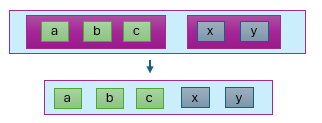

```scala
val nestedList = List(List("A", "B"), List("C", "D"), List("E"))
val flattenedList = nestedList.flatten // List("A", "B", "C", "D", "E")
```


### 3. Zip and Unzip
  以**最短的**为准
- 一般用法
  ```scala
  val numbers = List(1, 2, 3)
  val letters = List("a", "b", "c")
  val zippedList = numbers.zip(letters) // zippedList: List[(Int, String)] = List((1, "a"), (2, "b"), (3, "c")

  ```

- Index 在成员之前 by using `indices`得到 `Index Range`

  ```scala
  abcde.indices zip abcde   // Vector((0,a), (1,b), (2,c), (3,d), (4,e))
  ```
- Index 在成员之后 by using `zipWithIndex`
  ```scala
  abcde.zipWithIndex  //  List((a,0), (b,1), (c,2), (d,3), (e,4))
  ```
- 分解 tuples 为两个 List by using `unzip`

  ```scala
  val zippedList = List((1, "a"), (2, "b"), (3, "c"))
  val (numbers, letters) = zippedList.unzip
  // numbers: List[Int] = List(1, 2, 3)
  // letters: List[String] = List("a", "b", "c")
  ```





### 4. 成员唯一化

  ```scala
    val x = List(1, 1, 2, 3, 3, 4)
  ```
- Distinct

  ```scala
    x.distinct // Output List(1, 2, 3, 4)
  ```
- toSet

  ```scala
  x.toSet
  ```

- `case class` 因为自带 `euqal`, 所有可以用`distinct`和 `toSet`  

  ```scala
  case class Person(firstName: String, lastName: String)
  val dale1 = Person("Dale", "Cooper")
  val dale2 = Person("Dale", "Cooper")
  val ed = Person("Ed", "Hurley")
  val list = List(dale1, dale2, ed)

  // correct solution: only one Dale Cooper appears in this result:
  val uniques = list.distinct // List(Person(Dale,Cooper), Person(Ed,Hurley))
  val uniques = list.toSet // Set(Person(Dale,Cooper), Person(Ed,Hurley))

  ```


## 排序

### **sorted**

按数值大小或字符串排序

  ```scala
  List(10, 5, 8, 1, 7).sorted // List(1, 5, 7, 8, 10)
  List("dog", "mouse", "cat").sorted // List(cat, dog, mouse)
  ```

### **sortWith**
利用**提供的方法**排序
- 提供匿名函数，以完整形式传入。 声明清楚但太啰嗦
  ```scala
  // long form: sorting algorithm uses a tuple-2
  List("dog", "mouse", "cat").sortWith( (a, b) => a < b ) // List(cat, dog, mouse)
  List("dog", "mouse", "cat").sortWith( (a, b) => a > b ) // List(mouse, dog, cat)
  ```

- 对上面匿名函数的简化写法
  ```scala
  // short form: sorting algorithm uses '_' references
  List("dog", "mouse", "cat").sortWith(_ < _) // List(cat, dog, mouse)
  List("dog", "mouse", "cat").sortWith(_ > _) // List(mouse, dog, cat)
  ```
- 复杂的比较函数

  + 比较函数的定义

    ```scala
      def sortByLength(s1: String, s2: String): Boolean = {  🐶
      println(s"comparing $s1 & $s2")
      s1.length > s2.length
    }
  ```

  + 应用
    ```scala
                                                    🐶
    val m = List("dog", "mouse", "cat").sortWith(sortByLength) // List(mouse, dog, cat)
    ```

### **sortby**
按照元素里面的某个属性作为标准，实行比较来排序

- **sortBy** method signature
  ```scala

  def sortBy[B](f: (A) => B)(implicit ord: Ordering[B]): List[A]
  ```
  说明

  + <font color=darkred>**B**</font> 代表待推导的类型参数，其具体类型将根据调用 sortBy 方法时的上下文决定，它表示排序键的类型。
  + `(f: (A) => B)` 是 sortBy 方法的第一个参数。它接受一个函数 `f()`，该函数接受一个类型为 <font color=Navy>**A**</font> 的参数 (列表中元素的类型) 并返回一个类型为 <font color=darkred>**B**</font> 的值。**此函数 f 用于从列表中的每个元素中提取排序键**。
  + `(implicit ord: Ordering[B])` 是 sortBy 方法的第二个参数，它是一个隐式参数。`Ordering[B]` 是一个类型类，它定义了如何比较类型为 <font color=darkred>**B**</font> 的值。implicit 关键字表示在调用 sortBy 时不需要显式提供此参数；Scala 编译器会尝试查找作用域中合适的 `Ordering[B]` 实例。
  + `List[A]` 是 sortBy 方法的返回类型。它返回一个新的类型为 <font color=Navy>**A**</font> 的列表 (与原始列表相同类型)，其中元素根据函数 f 生成的排序键和 `Ordering[B]` 实例进行排序。


- Example 1 : 最简单的

  ```scala
  val h = List("peach", "apple", "pear", "fig").sortBy(s => s.length)
  ```
  分析

  + <font color=Navy>**A**</font> 是 `String`
  + <font color=darkred>**B**</font> 是 `Int`
  + `f: (A) => B` 是匿名函数 `( s: String ) => s.length`. 因为作为 <font color=Navy>**A**</font> 的 `String` 可以推导，而且只有一个参数，则匿名函数可以简写为 <font color=purple>`s => s.length`</font>.
  + `Ordering[B]`没有明确写，因为 <font color=darkred>**B**</font> 是 `Int`,隐式推导就按数值比较。
  + 最后返回 `List[String]`

- Example 2. 明确声明 `(implicit ord: Ordering[B])`

  ```scala
    val tupleOrdering: Ordering[(Int, Char)] = Ordering.Tuple2(Ordering.Int, Ordering.Char)
    val sortedFruits = List("peach", "apple", "pear", "fig")
                                            1️⃣️⃣               2️⃣
                           .sortBy(s => (s.length, s.head))(tupleOrdering)

  ```
  + <font color=Navy>**A**</font> 是 `String`
  + <font color=darkred>**B**</font> 是 `(Int, Char)`, where `Int` 对应于 `s.length`, `String` 对应于 `s.head`
  + `f: (A) => B` 是匿名函数 `( s: String ) => ( s.length, s.head )`.  1️⃣

  + `Ordering[B]` 是 `Ordering[(Int, Char)]`, 定义一个变量叫 `tupleOrdering` 然后显示 地传给 `sortBy` 2️⃣
  + 最后返回 `List[String]`

   output

    ```
    List(fig, pear, apple, peach)
    ```
- Example 2.A  简化版本， 省略 `implicit ord: Ordering[B]`
  ```scala
  val sortedFruits = List("peach", "apple", "pear", "fig").sortBy(s => (s.length, s.head))
  ```
  或反转版本

  ```scala
  val sortedFruits = List("peach", "apple", "pear", "fig").sortBy(s => (s.-length, s))
  ```
  
- Example 3.  <font color=Navy>**A**</font> 是 `类`

 + 按照单元属性

    ```scala
                                      🐶  
      case class Person(name: String, age: Int)
      val people = List(
        Person("Alice", 32),
        Person("Bob", 25),
        Person("Charlie", 40),
        Person("David", 28)
      )
      // Sort people by age in ascending order
                                        🐶
      val sortedByAge = people.sortBy(_.age)
      // Output: List(Person(Bob,25), Person(David,28), Person(Alice,32), Person(Charlie,40))
      ```

 + 按照单元属性的推导值

    ```scala
      case class Book(title: String, author: String, pages: Int)
      val books = List(
        Book("Scala for the Impatient", "Cay S. Horstmann", 350),
        Book("Programming in Scala", "Martin Odersky", 850),
        Book("Functional Programming in Scala", "Paul Chiusano", 450)
      )
      // Sort books by title length
      val sortedByTitleLength = books.sortBy(book => book.title.length)
      // Or  books.sortBy(_.title.length)
      // Output: List(Book(Scala for the Impatient,Cay S. Horstmann,350), Book(Programming in Scala,Martin Odersky,850), Book(Functional Programming in Scala,Paul Chiusano,450))
      ```

 + 多个标准
  ```scala
    case class Student(name: String, grade: Int, age: Int)
    val students = List(
      Student("Alice", 90, 18),
      Student("Bob", 85, 20),
      Student("Charlie", 90, 19),
      Student("David", 92, 18)
    )
    // Sort students by grade in descending order, then by age in ascending order
    val sortedByGradeAndAge = students.sortBy(student => (-student.grade, student.age))
    // Output: List(Student(David,92,18), Student(Alice,90,18), Student(Charlie,90,19), Student(Bob,85,20))
    ```
- Example 4. 特点函数

    ```scala
    case class Book(title: String, author: String, pages: Int)
    val books = List(
      Book("Scala for the Impatient", "Cay S. Horstmann", 350),
      Book("Programming in Scala", "Martin Odersky", 850),
      Book("Functional Programming in Scala", "Paul Chiusano", 450)
    )
    // Sort books by author name length, then by title length in descending order
    val sortedByAuthorThenTitle = books.sortBy(book => (book.author.length, -book.title.length))
    // Output: List(Book(Functional Programming in Scala,Paul Chiusano,450), Book(Programming in Scala,Martin Odersky,850), Book(Scala for the Impatient,Cay S. Horstmann,350))
    ```

## 转成字符串 with **toString**, **mkString** and **addString**

### toString

```scala
val x = List("apple", "banana", "cherry")
x.toString  // List(apple, banana, cherry) 等同于 x
```

Remark：   

List 的元素必要有 `toString` method. 否则 **mkString** and **addString** 都不会输出希望的结果。

### mkString

```scala
val x = List("apple", "banana", "cherry")
x.mkString // "applebananacherry"
x.mkString(" ") // "apple banana cherry"
x.mkString("|") // "apple|banana|cherry"
x.mkString(", ") // "apple, banana, cherry"
x.mkString("[", ", ", "]") // "[apple, banana, cherry]"
```

### addString

Beginning with Scala 2.13, a new addString method is similar to mkString, but lets you fill a mutable StringBuilder with the contents of the sequence. As with
mkString, you can use addString by itself, with a separator, and with start, end, and separator strings.

**Because this technique uses a StringBuilder instead of a String, it should be faster with large datasets. (As usual, always test any performance-related concern.)**

```scala
val x = List("a", "b", "c")
val sb = StringBuilder()
val y = x.addString(sb) // y: StringBuilder = abc

val sb = StringBuilder()
val y = x.addString(sb , ", ") // y: StringBuilder = "a, b, c"

val sb = StringBuilder()
val y = x.addString(
    sb, // StringBuilder
    "[", // start
    ", ", // separator
    "]" // end
)
// result of the last expression:
y: StringBuilder = [a, b, c]
y(0) // Char = '['
y(1) // Char = 'a'
```

## Transforming List to another List

### **Map**

- 匿名函数

  ```scala
  val a = List(1,2,3)
  // add 1 to each element
  val b = a.map(_ + 1) // b: List(2, 3, 4)
  val b = a.map(e => e + 1) // b: List(2, 3, 4)
  // double each element
  val b = a.map(_ * 2) // b: List(2, 4, 6)
  val b = a.map(e => e * 2) // b: List(2, 4, 6)
  ```
  **map** 也可以用 `for`来实现：

    ```scala
      val list = List("a", "b", "c") // list: List(a, b, c)
    ```
  + `map` 版本

    ```scala
    val caps1 = list.map(_.capitalize) // caps1: List(A, B, C)
    ```

  + `for` 版本

    ```scala
    val caps2 = for e <- list yield e.capitalize // caps2: List(A, B, C)
    ```

- 显式函数
  ```scala
  def plusOne(i: Int) = i + 1
  val a = List(1,2,3)
  val b = a.map(plusOne)          // b: List(2, 3, 4)  最简洁
  val b = a.map(plusOne(_))       // b: List(2, 3, 4)  占位符代替传入的参数
  val b = a.map(e => plusOne(e))  // b: List(2, 3, 4)  完整的匿名函数
  ```



### **flatMap** = `map` + `flattern`

- 简单的例子

  ```scala
  val words = List("the", "quick", "brown", "fox")
  words flatMap (_.toList)  // List(t, h, e, q, u, i, c, k, b, r, o, w, n, f, o, x)
  ```

- 进阶例子
  ```scala
  val numbers = List(1, 2, 3)
  val doubledNumbers = numbers.flatMap(n => List(n, n))
  // doubledNumbers: List[Int] = List(1, 1, 2, 2, 3, 3)
  ```

- 和 `filering` 合作

  ```scala
  val words = List("apple", "banana", "orange", "pear")
  val wordsWithA = words.flatMap(word => if (word.contains("a")) List(word.toUpperCase()) else List())
  // wordsWithA: List[String] = List("APPLE", "BANANA", "PEAR")
  ```


## 过滤查找 List

### 1. **Filtering**

- Filter Singature
```scala
def filter(p: (A) => Boolean): List[A]
```

  **Filter** takes a predicate <font color=drakred>**p**</font> — a function that returns `true` or `false`
- Example - `Int`

  ```scala
  val a = List.range(1, 10) // a: List(1, 2, 3, 4, 5, 6, 7, 8, 9)  
  // create a new list of all elements that are less than 5
  val b = a.filter(_ < 5) // b: List(1, 2, 3, 4)
  val b = a.filter(e => e < 5) // b: List(1, 2, 3, 4)
  // create a list of all the even numbers in the list
  val evens = x.filter(_ % 2 == 0) // evens: List(2, 4, 6, 8)
  ```

- Example - `String`

  ```scala
  val fruits = List("orange", "peach", "apple", "banana")
  val x = fruits.filter(f => f.startsWith("a")) // List(apple)
  val x = fruits.filter(_.startsWith("a")) // List(apple)
  val x = fruits.filter(_.length > 5) // List(orange, banana)
  ```

### 1.A  **filterInPlace** for mutable collection

- 和 `filter` 不同之处

  直接修改输入 collection 本身， 适合 **mutable collection** 如 <font color=Navy>**ArrayBuffer**</font>.

- 例子
  ```scala
  import scala.collection.mutable.ArrayBuffer
  val a = ArrayBuffer.range(1,10) // ArrayBuffer(1, 2, 3, 4, 5, 6, 7, 8, 9)
  a.filterInPlace(_ < 5)   // a: ArrayBuffer(1, 2, 3, 4)
  a.filterInPlace(_ > 2)   // a: ArrayBuffer(3, 4)
  ```

### 2. Collect

- 特点

  **collect** 是 `filter` and `map` 的合体，可以将两个处理合二为一。

  $$ collect = filter ⏩ map $$

- 基本步骤
 + Define the partial function
 ```scala
                                          🐶   🐟
 val positiveIntFilter: PartialFunction[Any, Int] = {
           🐶                  🐟   
      case i: Int if i > 0 => i * 2
  }
 ```
 Note:
   -  `Any` 指的是偏函数有一个输入参数，类型是 `Any`
   -  `Int` 指的是偏函数的输出是 `Int` 类型。
   - `case i: Int if i > 0` 是检查输入的参数是不是 `Int`类型的，如果是
     + 再检查是不是 大于零，如果是 则返回 `i * 2`, 注意这个返回值是 `Int`类型的，符合偏函数的输出值的类型需要。
   - `case i: Int if i > 0` 对应于 **`filer`** 的功能
   - `i * 2` 对应于 **`map`** 的功能

 + 应用偏函数
  ```scala
  val x = List(-1, 2, 0, 4, -3, 6)
  val y = x.collect(positiveIntFilter) // Output: List(4, 8, 12)
  ```

 + 用匿名函数来实现偏函数

      ```scala
      val y = x.collect{ case i: Int if i > 0 => i*2 }
      ```


- 例子 1️⃣

  ```scala
  val words = List("apple", "banana", "cherry", "date", "elderberry")
  val fruitsWithA = words.collect {
    case word if word.contains("a") => word.toUpperCase()
  }
  // fruitsWithA: List[String] = List("APPLE", "BANANA", "DATE")
  ```

- 例子 2️⃣

  ```scala
  case class Person(name: String, age: Int)
  val people = List(
    Person("Alice", 25),
    Person("Bob", 30),
    Person("Charlie", 35),
    Person("David", 40)
  )
  val youngPeople = people.collect {
    case Person(name, age) if age < 32 => s"$name (Young)"
  }
  // youngPeople: List[String] = List("Alice (Young)", "Bob (Young)")
  ```

- 问题解决 ： 如何去掉 List 里面的 <font color=darkred>`None`</font> 成员 ？

 ```scala
                        🐞
 val x = List(Some(1), None, Some(3))
 ```
 + Collect 1️⃣
   ```scala
   val y = x.collect{ case Some(i) => i}
   ```
 + Flattern 2️⃣  👍👍
   ```scala
   val y = x.flatten
   ```


### 3. **collectFirst**

- 和 **collect** 的不同点

  返回**第一个**符合的元素，并且是 <font color=darkred>`Option`</font> 类型。 因为有可能返回 `None`, 所以要用 `Option`类型

- 例子

    ```scala
    val firstTen = (1 to 10).toList
    firstTen.collectFirst{case x if x > 1 => x}  // Return Option[Int] = Some(2)
    firstTen.collectFirst{case x if x > 99 => x} // Return Option[Int] = None
    ```



### 4. **Find**

如果只是查找符合条件的**第一个成员**，而不做变换，可以直接用`find`. 可以视为`collectFirst` 的特殊情况，即 collect first 但只是直接返回该元素值。

和上面一样的例子：

```scala
  val firstTen = (1 to 10).toList
  firstTen.find{  _ > 1  }  // Return Option[Int] = Some(2)
  firstTen.find{  _ > 99 }  // Return Option[Int] = None

```

## 降维
   缩成一个值或一个小seqeunce by `reduce` and `fold`

### 1. 由 <font color=darkred>**左**</font> (left)开始遍历整个List

#### **foldLeft**

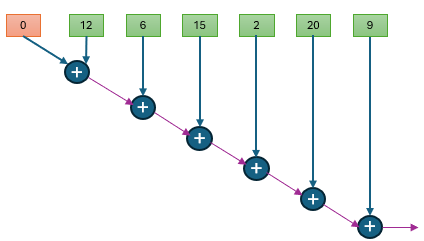

- 带一个初始值，称为 `seed` 🌱
- 一般写法

  ```scala
  val a = List(12, 6, 15, 2, 20, 9)
                        🌱 seed
  val sum_1 = a.foldLeft(0)((x,y) => x + y )
  ```
- 简练写法 👍
  ```scala
                        🌱
  val sum_2 = a.foldLeft(0)( _ + _  )
  ```

- 语法糖写法 👍👍👍
  $$\bigg(seed \space/: List(⋯)\bigg)\space\space (operator) $$

  ```scala
               🌱
  val sum_3 = ( 0 /: a )( _ + _  )
  ```

#### **reduceLeft**

- 和**foldLeft**功能相同，区别是
 + 没有`seed`.  所以，**如果 List 是空 的，则会报错**。而 **foldLeft** 因为有`seed`的存在，即使 List 是空的也没有问题。

 + 没有像**foldLeft**一样的简洁的语法糖。

- 简单的例子

  ```scala
  xs.reduceLeft(_ * _) // 388800
  xs.reduceLeft(_ min _) // 2
  xs.reduceLeft(_ max _) // 20
  ```

- 带复杂函数的例子

  ```scala
  def findMax(x: Int, y: Int): Int = {
    val winner = x max y
    println(s"compared $x to $y, $winner was larger")
    winner
  }
  xs.reduceLeft(findMax)  // 20

  ```


#### **scanLeft**

- 和 **foldLeft** 一样， 区别是
  + 中间结果，依次放入 List 中。即它返回的不是单个值，而是一个 **新的 List** 。
  + `seed` 被放在 新的List的第一个位置上。

- 例子
```scala
  def product(x: Int, y: Int): Int = {
    val result = x * y
    println(s"multiplied $x by $y to yield $result")
    result
  }

  val xs = List(1, 2, 3)
  val k = xs.scanLeft(10)(product)  // List(10, 10, 20, 60)

```

### 2. 由 <font color=darkred>**右**</font> (right)开始遍历整个List

- **foldRight**   

  foldLeft  的右边遍历版本。 注意的是
   + 语法糖的写法
  $$\bigg( List(⋯) : \seed \bigg)\space\space (operator) $$
   + 参数代表的成员不一样了，顺序相反。

   ```scala
     val xs = List(5, 2, 3)
     val k = xs.scanRight(4)(product)
     println(k)
   ```

   输出是
   ```
    multiplied 3 by 4 to yield 12
    multiplied 2 by 12 to yield 24
    multiplied 5 by 24 to yield 120
    List(120, 24, 12, 4)
  ```
- **reduceRight**   

  对遍历顺序的理解

  + 同样的List和操作函数

    ```scala
      val xs = List(1, 2, 3)
      def subtract(a: Int, b: Int): Int = {
        println(s"a: $a, b: $b")
        val result = a - b
        println(s"result: $result\n")
        result
      }
    ```

  + **reduceLeft** 版本

    ```scala
    scala> xs.reduceLeft(subtract)
    a: 1, b: 2
    result: -1

    a: -1, b: 3
    result: -4

    -4
    ```

  + **reduceRight** 版本

    ```scala
    scala> xs.reduceRight(subtract)
    a: 2, b: 3
    result: -1

    a: 1, b: -1
    result: 2

    2
    ```

- **scanRight**
    


     


    


  

### 3. 对整个List做 *都满足* 或 *有满足* 判断

- **forall**

  `True` 如果所有元素都满足条件
  + 1️⃣ Check if all elements are positive
  
    ```scala
    val numbers = List(1, 2, 3, 4, 5)
    val allPositive = numbers.forall(_ > 0)
    println(allPositive) // Output: true
    ```
  + 2️⃣ Check if all strings are non-empty
  
    ```scala
    val strings = List("hello", "world", "scala")
    val nonEmpty = strings.forall(_.nonEmpty)
    println(nonEmpty) // Output: true
    ```

  + 3️⃣ Check if all elements satisfy a condition
  ```scala
  val numbers2 = List(1, 4, 9, 16, 25)
  val allPerfectSquares = numbers2.forall(num => Math.sqrt(num).isWhole)
  println(allPerfectSquares) // Output: true
  ```
- **exists**

  `True` 如果至少有一个元素满足条件
  + 1️⃣ Check if any element is negative
  
    ```scala
    val numbers = List(1, 2, 3, 4, 5)
    val allPositive = numbers.exists(_ 《 0)
    println(allPositive) // Output: true
    ```
  + 2️⃣ Check if any strings is empty
  
    ```scala
    val strings = List("hello", "world", "scala")
    val nonEmpty = strings.forall(_.isEmpty)
    println(nonEmpty) // Output: true
  ```

  + 3️⃣ Check if any element satisfies a condition
  ```scala
  val numbers2 = List(1, 4, 9, 16, 25)
  val hasEvenPerfectSquare = numbers2.exists(num => num > 0 && Math.sqrt(num).isWhole && num % 2 == 0)
  println(hasEvenPerfectSquare) // Output: true
  ```

## 删除成员

因为是 <font color=darkred>`immutable`</font>,  **不可以删除成员**。 但 `ListBuffer`可以（见下）

# Chapter 17.<font color=blue>a</font>  `ListBuffer`, `Array` 和 `ArrayBuffer` 篇

## **ListBuffer**

**ListBuffer** 是 **List** 的 *mutable* 版本。 它可以弥补**List**的一个不足之处，即`append`一个成员在**List**尾部是耗时的，尤其是**List**比较长的情况。 而 **ListBuffer** 做**append**是固定时间的，和List 的长度没有关系。  

- 生成

  ```scala
  import scala.collection.mutable.ListBuffer
  val a = new ListBuffer[String]    //  ListBuffer()
  val b = new ListBuffer[String]()  //  ListBuffer()
  val x = ListBuffer(1, 2, 3, 4, 1, 2, 3, 4) // ListBuffer(1, 2, 3, 4, 1, 2, 3, 4)
  ```

- **加**

| | 要加的成员 | 要加的位置 | 操作 |
|---|---------|:------------:|------------|
|1️⃣ |  单个元素 | 后 | XS  <font color=darkred> **+=**</font> <font color=navy>**x**</font>|
| 2️⃣|  单个元素 | 前 | <font color=navy>**x**</font> <font color=darkred> **+=:**</font> XS |
| 3️⃣|  collection | 后 | XS  <font color=darkred> **++=**</font> <font color=blue>**s**</font>|
| |   |  | XS.<font color=darkred> **addAll**</font> <font color=blue>(**s**)</font>|
| 4️⃣|  collection | 前 | <font color=blue>**s**</font> <font color=darkred> **++=:**</font> XS |

  ```scala
  val b = new ListBuffer[String]()   //  ListBuffer()
  // 1️⃣ add one element to end of the ListBuffer
  b += "a" // b: ListBuffer(a)
  b += "b" // b: ListBuffer(a, b)
  // 2️⃣ add one element at the beginning of the ListBuffer
  "c" +=: b// b: ListBuffer(c, a, b, )
  // 3️⃣ add multiple elements (++= is an alias for addAll)
  b ++= List("d", "e", "f") // b: ListBuffer(c, a, b, d, e, f)
  b.addAll(Vector("d", "e", "f")) // b: ListBuffer(c, a, b, d, e, f, d, e, f)
  // 4️⃣add multiple elements at the beginning of the List
  List("s", "t", "k") ++=: b  // ListBuffer(s, t, k, c, a, b, d, e, f, d, e, f)
  ```
- **减**

| | 要减的成员 |  操作 |
|---|---------|------------|
|1️⃣ |  单个元素 | XS  <font color=darkred> **-=**</font> <font color=navy>**x**</font>|
|2️⃣ |  collection | XS  <font color=darkred> **--=**</font> <font color=blue>**s**</font>|
|3️⃣ | 从第`n`,删`m`个 | XS.<font color=darkred> **remove**</font><font color=blue>(**n,m**)</font>|



  ```scala
  // 1️⃣ remove the first "d"
  b -= "d" // b: ListBuffer(s, t, k, c, a, b, e, f, d, e, f)
  // 2️⃣ remove multiple elements specified by another sequence
  b --= Seq("e", "f") // b: ListBuffer(s, t, k, c, a, b, d， e, f)
  // 3️⃣ remove three elements, starting from index 2. this `remove`
  b.remove(2,3)  // b: List(s, t, b, d, e, f)

   ```

-  ⚠️ **Remark**  
  注意： <font color=darkred> **-=**</font> 只是**删除第一个出现的字符**，**而不是删除所有的字符**。

  如果要删除所有出现的字符：
  + Solution 1️⃣   
    产生**新**的`ListBuffer`
    ```scala
    val newB = b.filterNot(_ == 'd')
    ```
    或
    ```scala
    val newB = b.filter(_ != 'd')
    ```
  + Solution 2️⃣  
    直接修改**本**`ListBuffer`
    ```scala
    b.filterInPlace(_ != 'd')
    ```
    


## **LazyList**

**LazyList** 和 List 一样，但**它的成员是`lazily`被计算的**。 最大的好处是节省存储空间。

- 生成

  + 使用 <font color=darkred>**#::**</font>

    ```scala
    val xs = 1 #:: 2 #:: 3 #:: LazyList.empty
    ```
  + 使用 `range`

    ```scala
    val xs = (1 to 100_000_000).to(LazyList)
    ```  
- 🚫 不可以使用的方法
  + max
  + size
  + sum




- 使用于以下场合：
 + 无限长 Seqeunces.
  ```scala
  // Defining an infinite sequence of natural numbers from 1
  val naturalNumbers: LazyList[Int] = LazyList.from(1)
  // Accessing the first few elements
  println(naturalNumbers.take(5).toList) // Output: List(1, 2, 3, 4, 5)
  // Filtering the sequence to get even numbers
  val evenNumbers = naturalNumbers.filter(n => n % 2 == 0)
  println(evenNumbers.take(5).toList) // Output: List(2, 4, 6, 8, 10)
  ```

 + 计算需要花费大量时间的。可以用时再算
  ```scala
  // Defining the Fibonacci sequence as a LazyList
  val fibonacci: LazyList[Int] = 0 #:: 1 #:: fibonacci.zip(fibonacci.tail).map { case (a, b) => a + b }
  // Accessing the first few elements
  println(fibonacci.take(10).toList) // Output: List(0, 1, 1, 2, 3, 5, 8, 13, 21, 34)
  ```

 + 流数据
   
   LazyList can be particularly useful in scenarios involving streaming data processing, where data arrives continuously, and you need to process it in a memory-efficient and lazy manner.

    Imagine you have a web server that continuously logs requests, and you want to process these log entries in real-time to extract certain information or perform analysis. You can use LazyList to represent the stream of log entries and process them lazily:

    ```scala
    import scala.io.Source
    // Function to read log entries lazily from a file
    def readLogEntries(file: String): LazyList[String] = {
      val source = Source.fromFile(file)
      val lines = source.getLines().to(LazyList)
      source.close()
      lines
    }
    // Read log entries from a file
    val logEntries = readLogEntries("access.log")
    // Process log entries lazily
    val ipAddresses = logEntries
      .map(_.split(' ')(0)) // Extract IP address from each log entry
      .distinct // Get unique IP addresses

    // Print the first 10 unique IP addresses
    println(ipAddresses.take(10).toList)
    ```
 + 递归算法。

   LazyList can also be useful when working with recursive data structures or algorithms involving potentially infinite structures, such as game trees or fractals.

    Consider a simple game like Tic-Tac-Toe, where you want to explore all possible game states and moves. Each game state can have multiple possible next moves, leading to a tree-like structure of game states. Here's how you could represent and explore this game tree using LazyList:

    ```scala
    case class GameState(board: Vector[Vector[Char]], player: Char)

    def generateMoves(state: GameState): LazyList[GameState] = {
      // Implement logic to generate next valid moves based on the current game state
      val nextMoves = ??? // List of GameState instances representing valid next moves
      LazyList.from(nextMoves)
    }
    // Initial game state
    val initialState = GameState(Vector.fill(3, 3)(' '), 'X')
    // Generate all possible game states
    val gameTree: LazyList[GameState] = LazyList.cons(initialState, gameTree.flatMap(generateMoves))

    // Explore the game tree lazily
    val gameStates = gameTree.take(100).toList

    ```

    In this example, we define a GameState case class to represent the current state of the game board and the player whose turn it is. The generateMoves function takes a GameState and returns a LazyList of valid next moves represented as new GameState instances.

    We then define the gameTree LazyList using a recursive definition: the first element is the initial game state, and the rest of the elements are generated by flattening the LazyList obtained by applying generateMoves to each game state in the tree.

    Since LazyList is lazily evaluated, we can explore this potentially infinite game tree without running into memory or stack overflow issues. The gameStates value contains the first 100 game states generated from the initial state.

    This example demonstrates how LazyList can be used to represent and work with recursive data structures or algorithms involving potentially infinite structures, such as game trees, fractals, or other self-similar structures.


## **Array**

- 特点
 + **`Mutable`**, 即成员可以该
 + 长度 **`Immutable`**, 即不可以增加，也不可以缩小。
 + 使用 `Index` 访问成员比较快。

- 生成
 + 明确提供初始值的
  ```scala
  val a = Array(1, 2) // a: Array[Int] = Array(1, 2)
                🐕 明确指定类型
  val a = Array[Long](1, 2) // a: Array[Long] = Array(1, 2)  
  val fruits = Array("a", "b", "c") // Array[String] = Array(a, b, c)
  ```
 + 先声明后更新

   - 先提供大小和类型，之后用`index`去更新成员
  ```scala
                     👇         🅱      📶
    val babyNames = new Array[String](1_000)
    // somewhere later in the code ...
    babyNames(0) = "Alvin" // Array(Alvin, null, null ...)
    babyNames(1) = "Alexander" // Array(Alvin, Alexander, null ...)
  ```

  - 先声明一个空的，之后再添加。但结果会给一个新的 `Array`
    + 1️⃣ Append  element  ➡ <font color=darkred> **: +**</font>
    + 2️⃣ Prepend element  ➡ <font color=darkred> **+ :**</font>
    + 3️⃣ Append  collection ➡ <font color=darkred> **+ +**</font>
    + 4️⃣ Prepend  collection ➡ <font color=darkred> **+ + :**</font>
    ```scala
      val a = Array[Int]() // a: Array[Int] = Array()
      // append one element or multiple elements
      val b = a :+ 1 // b: Array(1)      1️⃣
      val c = b ++ Seq(2,3) // c: Array(1, 2, 3) 3️⃣
      // prepend one element or multiple elements
      val d = 10 +: c // d: Array(10, 1, 2, 3)   2️⃣
      val e = Array(8,9) ++: d // e: Array(8, 9, 10, 1, 2, 3)  4️⃣
    ```

 + 其他方法

    ```scala
      val x = (1 to 5).toArray // x: Array(1, 2, 3, 4, 5)
      val x = Array.range(1, 5) // x: Array(1, 2, 3, 4)
      val x = Array.range(0, 10, 2) // x: Array(0, 2, 4, 6, 8)
      val x = List(1, 2, 3).toArray // x: Array(1, 2, 3)
      "Hello".toArray // x: Array[Char] = Array(H,e,l,l,o)
      val x = Array.fill(3)("foo") // x: Array(foo, foo, foo)
      val x = Array.tabulate(5)(n => n * n) // x: Array(0, 1, 4, 9, 16)
  ```

- Array 应用场景

  因为Array类型具有不可变和可变的特性,使用它的一个原因是**性能**。某些Array操作比其他集合更快。例如,在计算机上进行测试,使用五百万个随机整数值的Array运行`b.sortInPlace`持续大约<font color=green>500毫秒</font>:
  ```scala
  import scala.util.Random
  val v: Vector[Int] = (1 to 5_000_000).toVector
  // 创建一个随机化的Array[Int]
  val a: Array[Int] = Random.shuffle(v).toArray
  a.sortInPlace // 大约需要500毫秒
  ```
  相反,以同样的方式创建一个**随机向量**,并调用它的**sorted**方法会持续超过<font color=blue>3秒钟</font>:
  ```scala
  randomVector.sorted // 大约需要3,100毫秒
  ```

  因此在这个例子中,使用sortInPlace对Array[Int]进行排序大约比使用sorted对Vector[Int]进行排序快六倍。就像俗话说的,您的里程数(性能)可能会有所不同,但重要的是要知道在某些情况下,Array可能比其他集合类型更快。


- 多维 Array

 + 方法 1️⃣  - 使用 **`ofDim()`**
   - 产生
   ```scala
    val rows = 2
    val cols = 3
    val a = Array.ofDim[String](rows, cols)
    // `a` now looks like this:
    // Array[Array[String]] = Array(
    //     Array(null, null, null),
    //     Array(null, null, null)
    )
    ```
   - 更新
   ```scala
    a(0)(0) = "a" // row 1
    a(0)(1) = "b"
    a(0)(2) = "c"
    a(1)(0) = "d" // row 2
    a(1)(1) = "e"
    a(1)(2) = "f"
   ```
  + 方法 2️⃣  - 使用 **array of array**
   - 产生
   ```scala
   val a = Array(
        Array("a", "b", "c"),
        Array("d", "e", "f")
   )
    val x = a(0)     // x: Array(a, b, c)
    val x = a(1)     // x: Array(d, e, f)
    val x = a(0)(0)  // x: a
   ```
   - 每个row可以有不同个数的成员

      ```scala
        val a = Array(
                  Array("a", "b", "c"),
                  Array("d", "e"),
                  Array("f")
        )
        ```

    - 声明为 `var`, 之后再用 `++=` 加入

     ```scala
      var arr = Array(Array("a", "b", "c"))
      arr ++= Array(Array("d", "e"))
      arr ++= Array(Array("f"))
      // result:
      // Array(Array(a, b, c), Array(d, e), Array(f))
     ```

- 独门排序方法 : **quickSort**. ❗ ❗❗

  + 因为 **quickSort** 要用到 swap, 所有要求操作对象必须是 <font color=red>**`mutable`**</font>. 所有 List or Vector 只可以用`sorted`. 而 **ListBuffer** 和 **ArrayBuffer** 可以先转成 **Array**,排序完，再转回。
  + **quickSort** 的复杂度是 $O(n\cdot \log(n) )$
  + **quickSort** 结果就在操作对象本身。 不用另外赋给其他变量

  ```scala
  val fruits = Array("cherry", "apple", "banana")
  scala.util.Sorting.quickSort(fruits)
  fruits // Array(apple, banana, cherry)
  ```

## **ArrayBuffer**

### 特点

- **ArrayBuffer** 是 **Array** 的加强版本，是完全的 <font color=darkred>**`mutable`**</font>`, 即**长度也是可以变化的**
- 增加 和 删除 操作 和 **ListBuffer** 一样

### 操作

- 产生

  ```scala
  import scala.collection.mutable.ArrayBuffer
  val a = ArrayBuffer[String]()
  // initialize with elements
  val characters = ArrayBuffer("Ben", "Jerry")
  ```

- **加**
 + 加单个成员在**尾部**

    ```scala
    a += "Ben" // a: ArrayBuffer(Ben)
    a += "Jerry" // a: ArrayBuffer(Ben, Jerry)
    a += "Dale" // a: ArrayBuffer(Ben, Jerry, Dale)
    // add one element
    characters += "Dale"
    ```

 + 加多个成员在**尾部**

    ```scala
    characters ++= List("Gordon", "Harry")
    characters ++= Vector("Andy", "Big Ed")
    // another way to add multiple elements
    characters.appendAll(List("Laura", "Lucy"))
    ```
  `characters` now contains these strings:
  ```scala
   ArrayBuffer(Ben, Jerry, Dale, Gordon, Harry, Andy, Big Ed, Laura, Lucy)
  ```
 + 加成员在**头部**

   ```scala
    val a = ArrayBuffer(10) // a: ArrayBuffer[Int] = ArrayBuffer(10)
    a.prepend(9) // a: ArrayBuffer(9, 10)
    a.prependAll(Seq(7,8)) // a: ArrayBuffer(7, 8, 9, 10)
    // `+=:` is an alias for `prepend`, `++=:` is an alias for `prependAll`
    6 +=: a // a: ArrayBuffer(6, 7, 8, 9, 10)
    List(4,5) ++=: a // a: ArrayBuffer(4, 5, 6, 7, 8, 9, 10)
    ```

- **更改**

  `patchInPlace(n,x,m)`

  + n : 从 `start_index`开始替代
  + m : 被替代的成员个数
      ```scala
    import scala.collection.mutable.ArrayBuffer
    // creates an ArrayBuffer[Char]
    val a = ArrayBuffer.range('a', 'f') // a: ArrayBuffer(a, b, c, d, e)
    a.update(0, 'A') // a: ArrayBuffer(A, b, c, d, e)
    a(2) = 'C' // a: ArrayBuffer(A, b, C, d, e)
    a.patchInPlace(0, Seq('X', 'Y'), 2) // a: ArrayBuffer(X, Y, C, d, e)
    a.patchInPlace(0, Seq('X', 'Y'), 3) // a: ArrayBuffer(X, Y, d, e)
    a.patchInPlace(0, Seq('X', 'Y'), 4) // a: ArrayBuffer(X, Y)
      ```




### **ArrayBuffer** vs **ListBuffer** ?

**ArrayBuffer** 和 **ListBuffer** 几乎具有同样得到操作。

- **ArrayBuffer** 更适合要按照Index访问成员的的场合。 因此用的会比较多

- **ListBuffer** 因为内部是链表形式， 所有适合在头尾添加成员或者要遍历整个成员的场景。

# Chapter 17.<font color=blue>b</font>  `Set`, `Tuple`, `Stack`,  和 `Quueue` 篇

## **Set**

### 特点

- 成员<font color=darkred>**唯一性**</font>
- 有 `immutable` 和`mutable` 版本。 一些方法是不同的
- Order 是按照值和个数。所有顺序不定。

### **Immutable** Set - 缺省

- 添加
 + 结果给新的变量
  ```scala
  val s1 = Set(1, 2) // s1: Set[Int] = Set(1, 2)
  // add one element
  val s2 = s1 + 3 // s2: Set(1, 2, 3)
  // add multiple elements from another sequence
  val s3 = s2 ++ List(4, 5) // s3: Set(5, 1, 2, 3, 4)
  ```

 + 自我添加
  ```scala
  ⏬
  var s = Set(1, 2) // s: Set[Int] = Set(1, 2)
  s = s + 3 // s: Set(1, 2, 3)
  s += 4 // s: Set(1, 2, 3, 4)  👍
  s = s ++ List(5, 6) // s: HashSet(5, 1, 6, 2, 3, 4)
  ```  


- 删除
 + 用 $-$ 和 $--$
  ```scala
  // create an immutable set
  val s1 = Set(1, 2, 3, 4, 5, 6) // s1: Set[Int] = HashSet(5, 1, 6, 2, 3, 4)
  // remove one element
  val s2 = s1 - 1 // s2 == HashSet(5, 6, 2, 3, 4)
  // remove multiple elements defined in another sequence
  val s3 = s2 -- Seq(4, 5) // s3 == HashSet(6, 2, 3)
  ```

 + 用 `filter`,`take` or `drop`
  ```scala
    val s1 = Set(1, 2, 3, 4, 5, 6) // s1: Set[Int] = HashSet(5, 1, 6, 2, 3, 4)
  val s2 = s1.filter(_ > 3) // s2: HashSet(5, 6, 4)
  val s3 = s1.take(2) // s3: HashSet(5, 1)
  val s4 = s1.drop(2) // s4: HashSet(6, 2, 3, 4)
  ```



### **Mutable** Set

- 添加
 + <font color=purple>$+=$</font>
 + <font color=purple>$++=$</font>
 + <font color=purple>`add`</font>

 ```scala
  // declare that you want a set of Ints
  val s = scala.collection.mutable.Set[Int]() // s: Set[Int] = HashSet()
  // add one element; += is an alias for addOne
  s += 1 // s: HashSet(1)
  s.addOne(2) // s: HashSet(1, 2)
  // add multiple elements; ++= is an alias for addAll
  s ++= List(3, 4) // s: HashSet(1, 2, 3, 4)
  s.addAll(List(5, 6)) // s: HashSet(1, 2, 3, 4, 5, 6)
  // note that there is no error when you attempt to add a duplicate element
  s += 2 // s: HashSet(1, 2, 3, 4, 5, 6)
  // add elements from any sequence (any IterableOnce)
  s ++= Vector(7, 8) // s: HashSet(1, 2, 3, 4, 5, 6, 7, 8)
  // the `add` method returns true if the element is added to the set,
  // false otherwise
  val res = s.add(99) // res=true, s=HashSet(1, 2, 3, 99, 4, 5, 6, 7, 8)
  val res = s.add(1) // res=false, s=HashSet(1, 2, 3, 99, 4, 5, 6, 7, 8)
 ```

- 删除
 + <font color=purple>$-=$</font>
 + <font color=purple>$--=$</font>
    ```scala
                                            ❌❌
    val s = scala.collection.mutable.Set(1, 1, 1, 2, 3, 4, 5, 6, 7, 8)
    //s: scala.collection.mutable.Set[Int] = HashSet(1, 2, 3, 4, 5, 6, 7, 8)
    s -= 1 // s: HashSet(2, 3, 4, 5, 6, 7, 8)
    s.subtractOne(2) // s: HashSet(3, 4, 5, 6, 7, 8)
    // '--=' is an alias for 'subtractAll'
    s --= List(3,4,5) // s: HashSet(6, 7, 8)
    s.subtractAll(List(6,7)) // s: HashSet(8)
    s -= 99 // s: HashSet(8)
  ```

 + filterInPlace
 + clear
 ```scala
 val s = scala.collection.mutable.Set(1, 2, 3, 4, 5)
  s.filterInPlace(_ > 2) // s: HashSet(3, 4, 5)
  s.clear // s: HashSet()
 ```
 + Remove
   
   returns true if an element is removed, and
    false otherwise:

   ```scala
    val s = scala.collection.mutable.Set(1, 2, 3, 4, 5)
    val res = s.remove(2) // res=true, s=HashSet(1,3,4,5)
    val res = s.remove(99) // res=false, s=HashSet(1,3,4,5)
    ```


## **SortedSet**

A **SortedSet** returns elements **in a sorted order**

- immutable SortedSet
 ```scala
 import scala.collection.immutable.SortedSet
  val s = SortedSet(10, 4, 8, 2) // s: TreeSet(2, 4, 8, 10)
  val s = SortedSet('b', 'a', 'd', 'c') // s: TreeSet(a, b, c, d)
  ```
- 添删

 ```scala
  val s1 = SortedSet(10) // s1: TreeSet(10)
  val s2 = s1 + 4 // s2: TreeSet(4, 10)
  val s3 = s2 ++ List(8, 2) // s3: TreeSet(2, 4, 8, 10)
  val s4 = s3 - 8 // s4: TreeSet(2, 4, 10)
  val s5 = s4 -- List(2, 10) // s5: TreeSet(4)
 ```

## **LinkedHashSet**

A LinkedHashSet is a **mutable** set that saves elements in the order in which <font color=darkred>they were inserted</font>
 + <font color=purple>$+=$</font>
 + <font color=purple>$++=$</font>
 + <font color=purple>$-=$</font>
 + <font color=purple>$--=$</font>
```scala
val s = LinkedHashSet(10) // s: LinkedHashSet(10)
s += 4 // s: LinkedHashSet(10, 4)
s ++= List(8, 2) // s: LinkedHashSet(10, 4, 8, 2)
s -= 4 // s: LinkedHashSet(10, 8, 2)
s --= List(8, 10) // s: LinkedHashSet(2)
```

## **Stack**

last-in, first-out (**LIFO**) data structure

Scala has both **immutable** and **mutable** 👍 versions of a stack

- 生成

 ```scala
  import scala.collection.mutable.Stack
  val ints = Stack[Int]()   // empty
  val strings = Stack[String]()   // Empty
  val chars = Stack('a', 'b', 'c') // Stack[Char] = Stack(a, b, c)
  val ints = Stack(1, 2, 3) // Stack[Int] = Stack(1, 2, 3)
  val ints: Stack[Int] = Stack(1,2,3) // Stack[Int] = Stack(1, 2, 3) 明确给出类型的

 ```
- 传入 - Push
 ```scala
 import scala.collection.mutable.Stack
  val s = Stack[String]() // s: Stack[String] = Stack()
  // add one element at a time
  s.push("a") // s: Stack(a)
  s.push("b") // s: Stack(b, a)
  // add multiple elements
  s.push("c", "d") // s: Stack(d, c, b, a)
  ```
- 弹出 - Pop
  ```scala
  val next = s.pop // next=d, s=Stack(c, b, a)
  ```

- All Push and pop methods in the Scala Stack
   ```scala
  val s = Stack[Int]() // s: collection.mutable.Stack[Int] = Stack()
  s.push(1) // s: Stack(1)
  s.push(2,3) // s: Stack(3, 2, 1)
  s.pushAll(List(4,5)) // s: Stack(5, 4, 3, 2, 1)
  val a = s.pop // a=5, s=Stack(4, 3, 2, 1)
  val b = s.popWhile(_ > 2) // b=List(4, 3), s=Stack(2, 1)
  val c = s.popAll // c=List(1, 2), s=Stack()
```

<div style="text-align:center;">
  <table>

  | Method | Description |
  |---|---|
  | pop | Remove the top element and return it |
  | popAll | Remove all elements and return them as a Seq |
  | popWhile | Remove all elements while the predicate is true |
  | push | Push one or multiple elements onto the stack |
  | pushAll | Push all elements in a traversable onto the stack |

  </div>

- 窥视 - Peek
  ```scala
  val top = s.top // top=c, s=Stack(c, b, a)
  ```
- 清空
  + **clear** removes all elements, but does not resize the internal representation of the stack.
  + **clearAndShrink** reduces the size of the internal representation to the value you
specify.
  ```scala
  // creates a stack from 0 to 999_999
  val nums = Stack.range(0, 1_000_000)
  nums.clear // nums: Stack[String] = Stack()
  nums.clearAndShrink(0) // nums: Stack[String] = Stack()
  ```

- 其他方法
 ```scala
  val s = Stack("apple", "banana", "kiwi")
  s.size // 3
  s.isEmpty // false
  s.count(_.length > 4) // 2
  s.filter(_.length > 4) // Stack(apple, banana)
  ```



## **Queue**  - first-in, first-out (FIFO) data
Scala has both **immutable** and **mutable** 👍 versions of a Queue

### **mutable** 👍



- 生成
  + 空的
  ```scala
  import scala.collection.mutable.Queue
  val q = Queue[Int]()
  val q = Queue[String]()
  ```
  + 带初始值的
  ```scala
  val q = Queue(1, 2, 3) // q: Queue[Int] = Queue(1, 2, 3)
  ```

- 传入,放在尾部
 + <font color=purple>$+=$</font>
 + <font color=purple>$++=$</font>
 + <font color=purple>$enqueue$</font>
 + <font color=purple>$enqueueAll$</font>
  ```scala
  import scala.collection.mutable.Queue
  val q = new Queue[String] // q: collection.mutable.Queue[String] = Queue()
  // add elements to the queue
  q += "a" // q: Queue(a)
  q ++= List("b", "c") // q: Queue(a, b, c)
  q.enqueue("d") // q: Queue(a, b, c, d)
  q.enqueue("e", "f") // q: Queue(a, b, c, d, e, f)
  q.enqueueAll(List("g", "h")) // q: Queue(a, b, c, d, e, f, g, h)
  ```

- 移出
 + <font color=purple>$dequeue$</font>
  ```scala
  import scala.collection.mutable.Queue
  val q = Queue(1, 2, 3) // q: mutable.Queue[Int] = Queue(1, 2, 3)
  // take an element from the head of the queue
  val next = q.dequeue // next=1, q=Queue(2, 3)
  val next = q.dequeue // next=2, q=Queue(3)
  val next = q.dequeue // next=3, q=Queue()
  // `q` is now empty; beware calling dequeue on an empty Queue:
  val next = q.dequeue
  // result: java.util.NoSuchElementException: empty collection
  ```

 + <font color=purple>$dequeueFirst$</font>
 ```scala
 import scala.collection.mutable.Queue
  val q = Queue(1,2,3,4,5) // q: Queue(1, 2, 3, 4, 5)
  // found the number 3, so remove it from the queue
  val res = q.dequeueFirst(_ > 2) // res=Some(3), q=Queue(1, 2, 4, 5)
  // no matches
  val res = q.dequeueFirst(_ > 5) // res=None, q=Queue(1, 2, 4, 5)
  ```
 + <font color=purple>$dequeueAll$</font>
 ```scala
  // match three elements, remove them from the queue
  val res = q.dequeueAll(_ > 1) // res=List(2, 4, 5), q=Queue(1)
  val re// no matches
  val res = q.dequeueAll(_ > 1) // res=List(), q=Queue(1)
 ```

- 其他方法
```scala
import scala.collection.mutable.Queue
val q = Queue(1,2,3,4,5)
q.size // 5
q.isEmpty // false
q.count(_ > 3) // 2
q.filter(_ > 3) // Queue(4, 5)
```



### **Immutable**


 + Add elements with enqueue and enqueueAll, and remove elements with dequeue
 + Assign the result to a new variable, because the data in the queue can’t be mutated.

 ```scala
import scala.collection.immutable.Queue
val q1 = Queue[Int]() // q1: Queue[Int] = Queue()
val q2 = q1.enqueue(1) // q2: Queue(1)
val q3 = q2.enqueueAll(List(2,3)) // q3: Queue(1, 2, 3)
val (a, q4) = q3.dequeue // a=1, q4=Queue(2, 3)
val (b, q5) = q4.dequeue // b=2, q5=Queue(3)
val (c, q6) = q5.dequeue // c=3, q6=Queue()
// `q6` is now empty; beware calling dequeue on an empty queue:
val (d, q7) = q6.dequeue
// result: java.util.NoSuchElementException: dequeue on empty queue
```

## **Tuples** ⚡

### 特点

**tuple** 是一个特殊的collection. 因为其他collection再怎么变化，里面包含的成员都必须是一种类型的，即同质性。 但**tuple**<font color=blue>可以包含不同类型的成员</font>，它也得益于该特性，可以应用于许多场合。比如，函数可以把多个返回值包装成**tuple**,可以实现多返回值。

### 生成

- 和List不同。
 List 也可以放不同类型的成员，但会类型推导成 `Matchable` 和 `Any`, 这样失去了成员原本的类型。 但是 **tuple** 的成员依据保留了自身的类型。
```scala
(1, 1.1) // (Int, Double)
(1, 1.1, 'a') // (Int, Double, Char)
(1, 1.1, 'a', "a") // (Int, Double, Char, String)
val xs = List(1, 2.2, "a", 'b') // List[Matchable] = List(1, 2.2, a, b)
val xs: List[Any] = List(1, 2.2, "a", 'b') // List[Any] = List(1, 2.2, a, b)
```


- 函数返回

 + 完整版本
  ```scala
  // return the user name and age
  def getUserInfo(): (String, Int) = {
    // do whatever you need to do to get the data and then
    // return it as a tuple
    ("johndoe", 42)
  }
  ```
 + 简化版本
  ```scala
    def getUserInfo(): Tuple2[String, Int] = ("johndoe", 42)
  ```
- 提取
  ```scala
  val userInfo = getUserInfo() // (String, Int)
  ```
 - Scala 2 版本
 ```scala
 userInfo._1 // "johndoe"
 userInfo._2 // 42
 ```
 - Scala 3 版本
 ```scala
  userInfo(0) // "johndoe"
  userInfo(1) // 42
 ```

 - 直接提取
 ```scala
  val (name, age) = getUserInfo()
  name // "johndoe"
  age // 42
 ```



### 应用场景 1️⃣ : 替代轻量级的`class`, 尤其是 `case class`

如果一个 `class` 只是包含一些 `field` 的话， 完全可以用**tuple** 来代替，即把这些`field`当成 **tuple**的成员。

 相比于`class`, **tuple**非常轻量,语法简单，也方便使用 `Pattern Matching`

- 原 `class`

 ```scala
  case class Stock(symbol: String, price: Double)
  val aapl = Stock("AAPL", 123.45)
  ```
- 手动产生

  ```scala
  val t = (aapl.symbol, aapl.price)
  ```
- 使用 `match-case`

  ```scala
  val t = aapl match {
    case Stock(symbol, price) => (symbol, price)
  }
```

### 应用场景 2️⃣ : 生成 `map`   

```scala
val m = Map(
  (1, "a"),
  (2, "b")
)
```

等同于

```scala
val m = Map(
  1 -> "a",
  2 -> "b"
)
```



## **Ranges**  

- 使用 `to` 和 `until`

  ```scala
  val r = 1 to 10 by 2 // will contain Range(1, 3, 5, 7, 9)
  val r = 1 to 10 by 3 // will contain Range(1, 4, 7, 10)

  (1 to 3).toVector // Vector(1, 2, 3)
  (1 until 3).toVector // Vector(1, 2)
  (1 to 10 by 3).toList // List(1, 4, 7, 10)
  (1 until 10 by 3).toList // List(1, 4, 7)

  (1 to 5).toList // List[Int] = List(1, 2, 3, 4, 5)
  (1 until 5).toVector // Vector[Int] = Vector(1, 2, 3, 4)

  (1 to 5).toBuffer // mutable.Buffer[Int] = ArrayBuffer(1, 2, 3, 4, 5)
  (1 to 5).toSeq // immutable.Range = Range 1 to 5
  (1 to 5).toSet // Set[Int] = Set(5, 1, 2, 3, 4)
  (1 to 5).to(LazyList) // LazyList[Int] = LazyList(<not computed>)

  ```

- 使用 `Sequence` 的方法

  ```scala
  Vector.range(1, 3) // Vector(1, 2)
  Array.range(1, 6, 2) // Array(1, 3, 5)
  List.range(1, 6, 2) // List(1, 3, 5)

  import collection.mutable.ArrayBuffer
  ArrayBuffer.range(1, 3) // ArrayBuffer(1, 2)

  List.range(1, 10) // List(1, 2, 3, 4, 5, 6, 7, 8, 9)
  List.range(1, 10, 2) // List(1, 3, 5, 7, 9)
  List.range(1, 10, 3) // List(1, 4, 7)
  List.range(1, 10, 4) // List(1, 5, 9)
  ```

- `Char` ranges

  ```scala
  // 'to' and 'until' are lazy
  'a' to 'e' // NumericRange a to e
  'a' until 'e' // NumericRange a until e
  // 'to' is inclusive, 'until' is not
  ('a' to 'e').toList // List(a, b, c, d, e)
  ('a' until 'e').toList // List(a, b, c, d)
  // you can also use a step with Char
  ('a' to 'e' by 2).toList // List(a, c, e)
  ('a' to 'e').by(2).toList // List(a, c, e)

  ```

- 其他方法

  ```scala
  scala> val x = (1 to 5).map(_ * 2.0)
  val x: IndexedSeq[Double] = Vector(2.0, 4.0, 6.0, 8.0, 10.0)
  scala> val x = (1 to 5).map(e => (e,e))
  val x: IndexedSeq[(Int, Int)] = Vector((1,1), (2,2), (3,3), (4,4), (5,5))
  scala> val map = (1 to 5).map(e => (e,e)).toMap
  val map: Map[Int, Int] = HashMap(5 -> 5, 1 -> 1, 2 -> 2, 3 -> 3, 4 -> 4)

  List.tabulate(3)(_ + 1) // List(1, 2, 3)
  List.tabulate(3)(_ * 2) // List(0, 2, 4)
  List.tabulate(4)(_ * 2) // List(0, 2, 4, 6)
  Vector.fill(3)("a") // Vector(a, a, a)
  ```


# Chapter 17.c **Map**

**Map** 有好多种，每一个都是为某个特殊的目的服务的

---
**The immutable Map**

- A basic immutable map, with no guarantee about the order its keys are returned
in

**The mutable Map**

- A basic mutable map, with no guarantee about the order its keys are returned in

**SortedMap**
- Returns its elements in sorted order by its keys

**LinkedHashMap**
- Returns elements in the order they’re inserted in

**VectorMap**
- Preserves insertion order by storing elements in a vector/map-based data
structure

**WeakHashMap**
- Per its Scaladoc, “a map entry is removed if the key is no longer strongly
referenced”
---



## **Immutable Map**

成员不能更改，但可以 Apply functional method 或 把返回值赋予一个新的变量

- 产生

  ```scala
  val a = Map(
    "AL" -> "Alabama",
    "AK" -> "Alaska"
  )

  ```

- 增加成员
  ```scala
  val a = Map(1 -> "a") // a: Map[Int, String] = Map(1 -> a)
  ```
 + <font color=purple>$+$</font> : 增加单个成员
  ```scala
  val b = a + (2 -> "b") // b: Map(1 -> a, 2 -> b)
  ```

  + <font color=purple>$++$</font> : 增加多个成员。
  ```scala
  val c = b ++ Map(3 -> "c", 4 -> "d")   // c: Map(1 -> a, 2 -> b, 3 -> c, 4 -> d)  
  val d = c ++ List(5 -> "e", 6 -> "f") //  d: HashMap(5 -> e, 1 -> a, 6 -> f, 2 -> b, 3 -> c, 4 -> d)
  ```

- 更改某对键-值
  直接加一个新的，会覆盖掉原先的。
  ```scala
  val e = d + (1 -> "AA") // e: HashMap(5 -> e, 1 -> AA, 6 -> f, 2 -> b, 3 -> c, 4 -> d)
  // update multiple elements at once with a Map
  val e = d ++ Map(2 -> "BB", 3 -> "CC")
  // e: HashMap(5 -> e, 1 -> a, 6 -> f, 2 -> BB, 3 -> CC, 4 -> d)
  // update multiple elements at once with a List
  val e = d ++ List(2 -> "BB", 3 -> "CC")
  // e: HashMap(5 -> e, 1 -> a, 6 -> f, 2 -> BB, 3 -> CC, 4 -> d)
  ```

- 删除成员

 + <font color=purple>$-$</font> : 删除单个成员，使用 <font color=darkred>key</font>
  ```scala
               🔑 key
  val e = d - 1 // e: HashMap(5 -> e, 6 -> f, 2 -> b, 3 -> c, 4 -> d)
  ```

 + <font color=purple>$--$</font> : 删除多个成员。
  ```scala
                   🔑 🔑🔑
  val e = d -- List(1, 2, 3) // e: HashMap(5 -> e, 6 -> f, 4 -> d)
  ```
- 用 `var` 来对自身进行操作，不用每次赋给一个新的变量了。
  ```scala
  // declare the map variable as a `var`
  ⏬
  var a = Map(1 -> "a")
  // add one element
  a = a + (2 -> "b")
  // add multiple elements
  a = a ++ Map(3 -> "c", 4 -> "d")
  a = a ++ List(5 -> "e", 6 -> "f")
  // update where the key is 1
  a = a + (1 -> "AA")
  // update multiple elements at one time
  a = a ++ Map(2 -> "BB", 3 -> "CC")
  a = a ++ List(4 -> "DD", 5 -> "EE")
  // remove one element by specifying its key
  a = a - 1
  // remove multiple elements
  a = a -- List(2, 3)
  ```

## **Mutable Map**

- 产生
  ```scala
  val m = scala.collection.mutable.Map[Int, String]()
  ```
- 添加
 + `map(key) = value`
  ```scala
  m(1) = "a" // m: HashMap(1 -> a)
  ```

 + <font color=purple>$+=$</font> : 增加单个成员
  ```scala
  m += (2 -> "b") // m: HashMap(1 -> a, 2 -> b)
  ```

 + <font color=purple>$++=$</font> : 增加多个成员
 ```scala
m ++= Map(3 -> "c", 4 -> "d") // m: HashMap(1 -> a, 2 -> b, 3 -> c, 4 -> d)
m ++= List(5 -> "e", 6 -> "f")  // m: HashMap(1 -> a, 2 -> b, 3 -> c, 4 -> d, 5 -> e, 6 -> f)
 ```

- 删除
 + <font color=purple>$-=$</font> : 增加单个成员
  ```scala
        🔑
  m -= 1 // m: HashMap(2 -> b, 3 -> c, 4 -> d, 5 -> e, 6 -> f)
  ```

 + <font color=purple>$--=$</font> : 增加多个成员
 ```scala
  m --= List(2,3) // m: HashMap(4 -> d, 5 -> e, 6 -> f)
 ```

- 更改
 + `map(key) = value`
  ```scala
  m(4) = "DD" // m: HashMap(4 -> DD, 5 -> e, 6 -> f)
  ```
- 其他方法（不常使用）
 + `put`  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ： &nbsp;&nbsp; 增加或替代
 + `filterInPlace` &nbsp; ： &nbsp;&nbsp; 保留符合条件的。
 + `remove` &nbsp; ： &nbsp;&nbsp; 删除
 + `clear` &nbsp; &nbsp; ： &nbsp;&nbsp; 清空

  ```scala
  val m = collection.mutable.Map(
    "AK" -> "Alaska",
    "IL" -> "Illinois",
    "KY" -> "Kentucky"
  )

  // returns None if the key WAS NOT in the map
  val x = m.put("CO", "Colorado")
  // x: Option[String] = None
  // m: HashMap(AK -> Alaska, IL -> Illinois, CO -> Colorado, KY -> Kentucky)
  // returns Some if the key WAS in the map
  val x = m.put("CO", "Colorado")
  // x: Option[String] = Some(Colorado)
  // m: HashMap(AK -> Alaska, IL -> Illinois, CO -> Colorado, KY -> Kentucky)
  m.filterInPlace((k,v) => k == "AK")
  // m: HashMap(AK -> Alaska)
  // `remove` returns a Some if the key WAS in the map
  val x = m.remove("AK")
  // x: Option[String] = Some(Alaska)
  // m: collection.mutable.Map[String, String] = HashMap()
  // `remove` returns a None if the key WAS NOT in the map
  val x = m.remove("FOO")
  // x: Option[String] = None
  // m: collection.mutable.Map[String, String] = HashMap()
  m.clear // m: HashMap()
  ```






## SortedMap

If you want a Map that returns its elements in sorted order by keys, use a SortedMap:
```scala
import scala.collection.SortedMap
val x = SortedMap(
  2 -> "b",
  4 -> "d",
  3 -> "c",
  1 -> "a"
)
```

Output is

```scala
val x: scala.collection.SortedMap[Int, String] = TreeMap(1 -> a, 2 -> b, 3 -> c, 4 -> d)
```

## **LinkedHashMap**, **VectorMap**

- **LinkedHashMap**
  + **Mutable**
  + 按照存入的顺序保持。
  ```scala
  import collection.mutable.LinkedHashMap
  val x = LinkedHashMap( // x: LinkedHashMap(1 -> a, 2 -> b)
    1 -> "a",
    2 -> "b"
  )
  x += (3 -> "c") // x: LinkedHashMap(1 -> a, 2 -> b, 3 -> c)
  x += (4 -> "d") // x: LinkedHashMap(1 -> a, 2 -> b, 3 -> c, 4 -> d)
  ```

- **VectorMap**

  Implements **immutable** maps using a vector/map-based data structure, which preserves insertion order. VectorMap has amortized effectively
constant lookup at the expense of using extra memory and generally lower performance for other operations
  ```scala
  import collection.immutable.VectorMap
  val a = VectorMap( // a: VectorMap(10 -> a)
  10 -> "a"
  )
  val b = a ++ Map(7 -> "b") // b: VectorMap(10 -> a, 7 -> b)
  val c = b ++ Map(3 -> "c") // c: VectorMap(10 -> a, 7 -> b, 3 -> c)

  ```


## 如何让**访问**没有<font color=darkred>异常</font> ？

### <font color=darkred>异常</font>问题的产生

通常访问 `map` **没有的成员**，会造成 <font color=navy> java.util.NoSuchElementException</font>

```scala
val states = Map( "AL" -> "Alabama", )
val s = states("AL") // s: Alabama  ✅
val s = states("YO") // java.util.NoSuchElementException: key not found: YO ❌
```

### 方法 1️⃣  : &nbsp;&nbsp;&nbsp; **withDefaultValue**

在 `map` 生成的时候就调用 <font color=navy>**withDefaultValaue**</font>方法

```scala
val states = Map(
  "AL" -> "Alabama",
  "AK" -> "Alaska",
  "AZ" -> "Arizona"
)
                                       🐈               ⚓
val states = Map( "AL" -> "Alabama").withDefaultValue("Not found")

val x = states("AL") // x: Alabama
val x = states("yo") // x: Not found  ⚓


```

### 方法 2️⃣  : &nbsp;&nbsp;&nbsp; **getOrElse**



在取出值的时候， 也同时提供缺省的值

```scala
val s = states.getOrElse("yo", "No such state") // s: No such state


### 方法 3️⃣  : &nbsp;&nbsp;&nbsp; **get**

使用 `get` 返回一个 <font color=darkred>Option</font>

```scala
val x = states.get("AZ") // x: Some(Arizona)
val x = states.get("yo") // x: None
```

## 如何判断一个`map`里，有没有某个 `key` 或 `value` ?

- 查找 <font color=darkred>`key`</font> 是否存在 ？
 + **contains**
    ```scala
      val states = Map(
          "AK" -> "Alaska",
          "IL" -> "Illinois",
          "KY" -> "Kentucky"
      )
      states.contains("FOO")  // false  
      states.contains("AK")   // true
    ```

  + **get() ➡ match-case**
    ```scala
    states.get("AK") match {
        case Some(state) => println(s"state = $state")  // true
        case None => println("state not found")         // false
    }
    ```
- 查找 <font color=darkred>`values`</font> 是否存在 ？
 + <font color=purple>`valuesIterator`</font>.<font color=blue>`contains`</font>
   ```scala
    states.valuesIterator.contains("Alaska") // true
    states.valuesIterator.contains("Kentucky") // true
    states.valuesIterator.contains("ucky") // false
   ```

 + <font color=purple>`valuesIterator`</font>.<font color=blue>`exists`</font>
  
   ```scala
    states.valuesIterator.exists(_.contains("ucky")) // true
    states.valuesIterator.exists(_.matches("Ala.*")) // true
  ```

## 对`map`的所有 `keys` 或者所有 `values` 的操作

- 取出所有 *Keys*
  + **keySet**  &nbsp;&nbsp;&nbsp; ➡ &nbsp;&nbsp;&nbsp; `Set`
    ```scala
    val states = Map("AK" -> "Alaska", "AL" -> "Alabama", "AR" -> "Arkansas" )
    states.keySet // Set[String] = Set(AK, AL, AR)
    ```
  + **keys**  &nbsp;&nbsp;&nbsp; ➡ &nbsp;&nbsp;&nbsp; `Iterable`
    ```scala
    states.keys // Iterable[String] = Set(AK, AL, AR)
    ```  
  + **keysIterator**  &nbsp;&nbsp;&nbsp; ➡ &nbsp;&nbsp;&nbsp; `keys as an iterator`
    ```scala
    states.keysIterator // Iterator[String] = <iterator>
    ```  

- 取出所有 **Values**

  + **values**  &nbsp;&nbsp;&nbsp; ➡ &nbsp;&nbsp;&nbsp; `Iterable`
    ```scala
    states.values // Iterable[String] = Iterable(Alaska, Alabama, Arkansas)
    ```  
  + **valuesIterator**  &nbsp;&nbsp;&nbsp; ➡ &nbsp;&nbsp;&nbsp; `Iterator`
    ```scala
    states.valuesIterator // Iterator[String] = <iterator>
    ```  


- 找出 *Keys* 里面的**最大值**和**最小值**

 + **max** 和 **min**
  ```scala
    val grades = Map(
      "Al" -> 80,
      "Kim" -> 95,
      "Teri" -> 85,
      "Julia" -> 90
    )
    grades.max // (Teri,85)
    grades.min // (Al,80)
  ```

 + <font color=blue>keysIterator</font>.{**max**, **min**}
 ```scala
 grades.keysIterator.max // Teri
  grades.keysIterator.min // Al
  ```
 + <font color=blue>keysIterator</font>.**reduceLeft**
    - Max
    ```scala
      grades.keysIterator.reduceLeft((x,y) => if (x>y)  x else y)
    ```
    - Min
    ```scala
      grades.keysIterator.reduceLeft((x,y) => if (x<y)  x else y)
    ```


- 找出 *Values* 里面的**最大值**和**最小值**

 + <font color=blue>valuesIterator</font>.{**max**, **min**}
 ```scala
  grades.valuesIterator.max // Teri
  grades.valuesIterator.min // Al
  ```
 + <font color=blue>.valuesIterator</font>.**reduceLeft**
    - Max
    ```scala
      grades.keysIterator.reduceLeft((x,y) => if (x>y)  x else y)
    ```
    - Min
    ```scala
      grades.keysIterator.reduceLeft((x,y) => if (x<y)  x else y)
    ```
  


## 遍历`map`

### 遍历 `key` and `/value` together

- <font color=navy> **for** </font>

  ```scala
  val ratings = Map(
    "Lady in the Water"-> 3.0,
    "Snakes on a Plane"-> 4.0,
    "You, Me and Dupree"-> 3.5
  )
         🔑👜
  for ( ( k, v) <- ratings ) { println(s"key: $k, value: $v") }
  ```

- <font color=navy> **foreach** </font> &nbsp; + &nbsp;<font color=navy> **case** </font>
  ```scala
  ratings.foreach {
          🔑    👜
    case(movie, rating) => println(s"key: $movie, value: $rating")
  }
  ```
- <font color=navy> **foreach** </font> &nbsp; + &nbsp;<font color=navy> **tuple** </font>
  ```scala
                                          🔑              👜
    ratings.foreach(x => println(s"key: ${x._1}, value: ${x._2}"))
  ```

- <font color=navy> **transform** </font>

  只是改变 `value`, 保留 `key` 的 Map
  ```scala
    val map1 = Map(1 -> 10, 2 -> 20, 3 -> 30)  // use the map keys and values to create new values
                              🔑👜
    val map2 = map1.transform((k,v) => k + v)  // map2: Map(1 -> 11, 2 -> 22, 3 -> 33)
  ```

### 遍历 `key` Only

- 应用 `keysIterator` 作为 `Interator`,可以遍历 **`key`**

  ```scala
  val i = ratings.keysIterator
  // the iterator provides access to the map’s keys
  i.toList // List(Lady in the Water, Snakes on a Plane, You, Me and Dupree)
  ```

- `keys` 作为 `map` 的方法，本身就是 `Interable`,可以直接遍历

  ```scala
  scala> ratings.keys.foreach((m) => println(s"$m rating is ${ratings(m)}"))
  // output
  //Lady in the Water rating is 3.0
  //Snakes on a Plane rating is 4.0
  //You, Me and Dupree rating is 3.5
  ```

### 遍历 `value` Only

- <font color=navy> **values** </font>

  ```scala
  val a = Map(1 -> "ay", 2 -> "bee")  // a: Map[Int, String] = Map(1 -> ay, 2 -> bee)
      
  a.values.map(_.toUpperCase) // List(AY, BEE)
  ```

- <font color=navy> **view** </font> &nbsp; + &nbsp;<font color=navy> **mapValues** </font>

  适用于大的Map, 因为 `view` 使用了 **Lazy** 方式

  ```scala
  val b = a.view.mapValues(_.toUpperCase).toMap // Map(1 -> AY, 2 -> BEE)
  ```

## 按照`key` 或 `value` 排序`map`

---
流程

<font color=blue>`map`</font>  ➡️ <font color=DarkGreen>**`toSeq`**</font> ➡️ <font color=darkred>`sortBy`</font> ➡️ <font color=LightCoral>`LinkedHashMap`</font>  

---

- 目标`map`

  ```scala
  val grades = Map(
    "Kim" -> 90,
    "Al" -> 85,
    "Melissa" -> 95,
    "Emily" -> 91,
    "Hannah" -> 92
  )
 ```

- 1️⃣ <font color=DarkGreen>**`toSeq`**</font> 生成一个 sequence of two-element **tuple** values, 即 `Seq[(String, Int)]` :

  **Why ?**

  因为 `Sequence` 有排序方法 `sortBy` 和 `sortWith`

    ```scala
    val x = grades.toSeq  // x: List((Hannah,92), (Melissa,95), (Kim,90), (Emily,91), (Al,85))
    ```

- 2️⃣ 排序
  + `sortBy` 版
  ```scala
  val x = grades.toSeq.sortBy(_._1)
  // x: Seq[(String, Int)] = List((Al,85), (Emily,91), (Hannah,92), (Kim,90), (Melissa,95))
  
  + `sortWith` 版

    ```scala
    val x = grades.toSeq.sortWith(_._1 < _._1)
    // x: Seq[(String, Int)] = List((Al,85), (Emily,91), (Hannah,92), (Kim,90), (Melissa,95))
    ```

 + 注意
   - `_._1`  &nbsp;&nbsp;&nbsp; 👉 &nbsp; &nbsp; &nbsp;<font color=darkred>`key`</font>
   - `_._2`  &nbsp;&nbsp;&nbsp; 👉 &nbsp; &nbsp; &nbsp;<font color=MediumBlue>`value`  


- 3️⃣ 存入 **有放入顺序的** `Map` 如 **LinkedHashMap, Vector
Map, or ListMap**

  ```scala
  val x = LinkedHashMap(grades.toSeq.sortBy(_._1):_*)
  // x: scala.collection.mutable.LinkedHashMap[String,Int] =
  // Map(Al -> 85, Emily -> 91, Hannah -> 92, Kim -> 90, Melissa -> 95)
  ```

  LinkedHashMap is only available as a mutable class, and VectorMap is an immutable
  map. There’s also an immutable ListMap, but it’s only recommended for small maps.
  Use whichever is best for your situation.

  **Highlight** 📙

  What <font color=darkred>**`:_*`**</font> is for ?

  <font color=darkred>**`:_*`**</font> 将 `Iterable`成员展开，作为参数传入

  + Example 1

    ```scala
    val list = List(1, 2, 3)
    val set = Set(list:_*) // set: Set[Int] = Set(1, 2, 3)
    ```

  + Example 2

    ```scala
    def printAll(strings: String*): Unit = strings.foreach(println)
    // a sequence of strings
    val fruits = List("apple", "banana", "cherry")
    // this works
    scala> printAll(fruits: _*)
    apple
    banana
    cherry
  ```
  + Example 3

    ```scala
    case class Person(name: String, age: Int)
    val people = List(
      Person("Alice", 25),
      Person("Bob", 30),
      Person("Charlie", 35)
    )
    val nameAges = LinkedHashMap(people.map(p => (p.name, p.age)):_*)
    // nameAges: LinkedHashMap[String,Int] = Map("Alice" -> 25, "Bob" -> 30, "Charlie" -> 35)
    ```




## 过滤 `map`

- **filter**  &nbsp;&nbsp;&nbsp;-&nbsp;&nbsp;&nbsp;Immutable
 + by <font color=blue>`key`</font>
  ```scala
  val a = Map(1 -> "a", 2 -> "b", 3 -> "c")
  val b = a.filter((k,v) => k > 1) // b: Map(2 -> b, 3 -> c)
  ```
 + by <font color=blue>`value`</font>
  ```scala
  val c = a.filter((k,v) => v != "b") // c: Map(1 -> a, 3 -> c)
  ```
 + Use <font color=blue>`tuple`</font>
  ```scala
  // filter by the key (t._1)
  val b = a.filter((t) => t._1 > 1) // b: Map(2 -> b, 3 -> c)
  // filter by the value (t._2)
  val b = a.filter((t) => t._2 != "b") // b: Map(1 -> a, 3 -> c)
  ```
- **filterInPlace**  &nbsp;&nbsp;&nbsp;-&nbsp;&nbsp;&nbsp;Mutable
  ```scala
  val x = collection.mutable.Map(
    1 -> 100,
    2 -> 200,
    3 -> 300
  )
  x.filterInPlace((k,v) => k > 1) // x: HashMap(2 -> b, 3 -> c)
  x.filterInPlace((k,v) => v > 200) // x: HashMap(3 -> 300)
  ```

- **filterKeys**  &nbsp;&nbsp;&nbsp;-&nbsp;&nbsp;&nbsp;Immutable and Mutable

 + 使用匿名函数
  ```scala
  val x = Map(
    1 -> "a",
    2 -> "b",
    3 -> "c"
  )
  val y = x.view.filterKeys(_ > 2).toMap // y: Map(3 -> c)
  ```
 + 使用明确定义的函数

    ```scala
    def only1(i: Int) = if ( i == 1 ) true else false
    val x = Map(1 -> "a", 2 -> "b", 3 -> "c")
    val y = x.view.filterKeys(only1).toMap // y: Map(1 -> a)
    ```

 + 使用 **`Set`**
  ```scala
  val x = Map(1 -> "a", 2 -> "b", 3 -> "c")
  val y = x.view.filterKeys(Set(2,3)).toMap
  // y: Map[Int, String] = Map(2 -> b, 3 -> c)
  ```

- **take**

  保留前 N 个键值

  ```scala
  val a = Map(1 -> "a", 2 -> "b", 3 -> "c")
  val b = a.take(2) // b: Map(1 -> a, 2 -> b)
  ```

# Chapter 19 Type

## **Generic Type Parameters**

###  基本概念

- 类型化的函数

 + 声明
  ```scala
             ⚓        ⚓   ⚓
  def first[A](xs: Seq[A]): A = xs(0)
  ```
 + 1️⃣ <font color=blue>**A**</font> &nbsp;&nbsp;:&nbsp;&nbsp;<font color=darkred>`Int`</font>
  ```scala
    val numbers = Seq(1, 2, 3, 4, 5)
    println(first(numbers)) // Output: 1
  ```  
 + 2️⃣ <font color=blue>**A**</font> &nbsp;&nbsp;:&nbsp;&nbsp;<font color=darkred>`String`</font>
  ```scala
    val names = Seq("Alice", "Bob", "Charlie", "David")
    println(first(numbers)) // Output: Alice
  ```  
 + 3️⃣ <font color=blue>**A**</font> &nbsp;&nbsp;:&nbsp;&nbsp;<font color=darkred>`Any`</font>
  ```scala
  val mixed = Seq(1, "Two", 3.0, 'Four')
  println(first(mixed)) // Output: 1
  ```  

 + 4️⃣ <font color=blue>**A**</font> &nbsp;&nbsp;:&nbsp;&nbsp;<font color=darkred>`Class`</font>

    ```scala
    class Book(val title: String, val author: String)
    val books = Seq(
      new Book("Book 1", "Author 1"),
      new Book("Book 2", "Author 2"),
      new Book("Book 3", "Author 3")
    )
    println(first(books)) // Output: Book@1234567 (prints the object reference)
  ```  

 + 4️⃣ <font color=blue>**A**</font> &nbsp;&nbsp;:&nbsp;&nbsp;<font color=darkred>`Trait`</font>

    ```scala
    trait Animal {
      def name: String
    }
    case class Dog(name: String) extends Animal
    case class Cat(name: String) extends Animal

    def first[A <: Animal](xs: Seq[A]): A = xs.head

    val animals = Seq(Dog("Buddy"), Cat("Whiskers"), Dog("Max"))
    println(first(animals).name) // Output: Buddy
  ```  
 + 可以用函数变量代表具体化后的函数
  ```scala
  val f = first[A] _
  ```

- 类型化的类

 + 声明
  ```scala
              ⚓⛎       ⚓        ⛎
  class Pair[A,B](val a: A, val b: B)
  ```
 + 1️⃣ <font color=blue>**A,&nbsp;B**</font> &nbsp;&nbsp;:&nbsp;&nbsp;<font color=darkred>`Int/String/Mix`</font>
  ```scala
  Pair(1, 2) // A and B are both Int
  Pair("1", 2.2) // A is String, B is Double
  val p = new Pair(1, "1")             // A is Int, B is String
  val p = new Pair[Int, String](1,"1") // Specify the types
  ```  
 + 2️⃣ <font color=blue>**A,&nbsp;B**</font> &nbsp;&nbsp;:&nbsp;&nbsp;<font color=darkred>`Class`</font>
    ```scala
    class Cat
    class Dog

    // 声明
    trait Foo[A,B]:
      def pair(): Pair[A, B]

    class Bar extends Foo[Cat, Dog]:
      def pair(): Pair[Cat, Dog] = Pair(Cat(), Dog())

    class Baz extends Foo[String, Int]:
      def pair(): Pair[String, Int] = Pair("1", 2)
    ```  


## **Variance**

### 类型安全问题

---

**问题引入**

如果 Type <font color=blue>**`B`**</font> is Type <font color=darkred>**`A`**</font> 的子类， 那么对于参数化的class或者trait **`Q[T]`** 来说，

1. **Q**[<font color=blue>**B**</font>] 是 **Q**[<font color=darkred>**A**</font>] 的子类吗 ？

2.  在需要`Q[A]`类型的变量时候， 可以用 `Q[B]`类型的变量代替吗？
3.  在需要`Q[B]`类型的变量时候， 可以用 `Q[A]`类型的变量代替吗？

---

这尤其会发生在参数传递的时候,比如

变量 `b` 是 `B` 类实例，但它可以作为 `Container` 的构造函数的参数。 尽管它要求的是 `A` 的实例。
```scala
class Container( x : A ) ....
val b = new B()
val y = new Container( b )
```

问题是如果

```scala
class Container[T] ( a : T)

def foo( c: Container[A] ) = { }

val bb = new Container[B]

foo( bb ) ❌
```

这时候， `bb` 可以传入 `foo()` 吗 ？

答案是： 在 Scala **是不可以 ！！！**




### Nonvariance  &nbsp;&nbsp;&nbsp;-&nbsp;&nbsp;&nbsp;缺省

Scala 对以上三个问题的答案是**否定的** ❗. 即缺省情况下， generic types is **nonvariant** subtyping。 即在没有任何特别声明的情况下(见后面), 尽管 <font color=blue>**`B`**</font> is <font color=darkred>**`A`**</font> 的子类， 但是 **Q**[<font color=blue>**B**</font>] 和 **Q**[<font color=darkred>**A**</font>]**没有任何关系**。

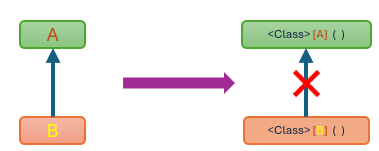

- **子类**的实例可以赋值给**父类**，许多OOP都是支持这样的， scala 也是支持的。

  ```scala
  val a : Int = 1
  val b : AnyVal = a      ✅
  // val c : Int = b    ❌
  ```

  + `Int` 是 `AnyVal` 的 **子类**, 所有作为 `Int` 的变量 <font color=blue>**`a`**</font> 可以赋值给声明为**父类** `AnyVal` 的变量 <font color=darkred>**`b`**</font>.
  + 但反之不成立。


- 但如果类型是作为参数，那被参数化的类型, 如 `Container[A]` 不一定会有继承关系。**Scala 就不支持**。

  ```scala
  class Container[A](value: A)

  val intContainer: Container[Int] = new Container(1)
  val AnyContainer: Container[AnyVal] = intContainer // ❌ Error: Type mismatch
  ```

  尽管<font color=blue>**`Int`**</font> 是 <font color=darkred>**`AnyVal`**</font> 的 **子类**， **但是 `Container[`<font color=blue>`Int`</font>`]` 可不是 `Container[`<font color=darkred>`AnyVal`</font>`]` 的子类** ⚡⚡⚡

  所以 `intContainer` 不可以赋值给 `AnyContainer`. 因为后者是`Container[`<font color=darkred>`AnyVal`</font>`]`, 不是`intContainer` 所属的`Container[`<font color=blue>`Int`</font>`]`的父类。

  所以， Scala 的 **Nonvariant** 性， 直接否定了第一个问题。问题2，3 也就无从谈起了。



### Covariance

如果希望 **Q**[<font color=blue>**B**</font>] 是 **Q**[<font color=darkred>**A**</font>]的子类，即 `Covariant`, 只需要在参数类前加 <font color=darkred>**$+$**</font> , 即 `Q[+T]`:

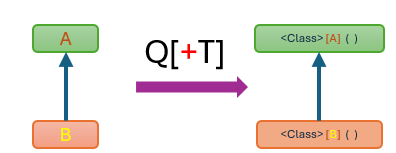



```scala
                ⬇
class Container[+A](val value: A)

val intContainer: Container[Int] = new Container(1)
val AnyContainer: Container[AnyVal] = intContainer // ✅ Allowed due to covariance
```


# Chapter 20. Abstract Member

## 抽象成员分类

在抽象类或者trait 里面， 只有声明，没有具体实现的都叫抽象成员，它们可以是：

1️⃣ Type  
2️⃣ Method  
3️⃣ Val  
4️⃣ Var


- Abstract
  ```scala
  trait Abstract {
    type T 1️⃣
    def transform(x: T): T  2️⃣
    val initial: T  3️⃣
    var current: T  4️⃣
  }
  ```


- 具体实现
  ```scala
  class Concrete extends Abstract {
    type T = String  1️⃣
    def transform(x: String) = x + x   2️⃣
    val initial = "hi"  3️⃣
    var current = initial 4️⃣
  }
  ```

## Type Member

### Abstract Type 的必要性

不使用抽象类型， 在实现抽象方法时候可能会有问题，例如

  + 抽象类部分，没有用 `Type`
   ```scala
  class Food
                                          🌾
  abstract class Animal { def eat(food: Food) }
  ```

  + 具体类部分
  ```scala
    
    class Grass extends Food
    class Cow extends Animal {
                  🍏
    def eat(food: Grass) = {} // ❓❓  This won't compile
    }
  ```

  问题是：
  
  在实现抽象函数时候，**参数`food` 的类型（🍏）和抽象函数里声明的（🌾）不一样**！！
  `override`要求`Signature`必要完全一致，这也包括类型。

- 解决方法 &nbsp;&nbsp;&nbsp;&nbsp;- &nbsp;&nbsp;&nbsp; 使用 `Type`.

  把 class `Food` 用 `type member` 声明，

  ```scala
  abstract class Animal {
    type T
    def eat(food: T)
  }

  class Cow extends Animal {
    type T =  Grass                      
    def eat(food: T ) = {} // Can compile
  }

  ```

- 可能的问题
  
  这个抽象类型是开放的，由具体类自由定义，比如这里定义为 `Grass` 类型。  

  但抽象类可以限制具体类对抽象Type 的定义范围， 可以限制 抽象Type是某个类的子类， 见下节。


      



### 给 `Type` 设置上限

对抽象类型的限制方法
  
  一般步骤：
  
  + **1️⃣** 在抽象类里面，给抽象类型声明一个类型的上限，这样就声明该类型是某个类型或类的子类
  + **2️⃣** 在具体类里面，给抽象类型一个具体的类型（像正常的抽象类型实现一样）。

  这样，具体类就和抽象方法的`Signaure`即保持一致，又被限制在一个类型之下。

  ```scala
          ⭐
  class  X
  abstract class A {
             1️⃣ UpperBound
      type T :< X
      def test( a : T )
  }
         ✨        ⭐
  class Y extends X
  class B extends A {
            2️⃣✨
      type T = Y
      def test( a : T )  = {   }  ✅
  }

 ```

### Path-Dependent Type

可以直接指明 `class`/`trait`/`Object`类里面的 `Type`

```scala
trait Input {
  type Output   🅰
  val value: Output
}
                                🅰
def dependentFunc(i: Input): i.Output = i.value

```
直接用`Trait`里面的 `Type` <font color=darkred>Output</font>, 加 $·$ 就行了。

### Refine Type

---

**Type Refinement**

在产生一个新的类型时候，现场加入或更改。 有些像`Systemverilog`的`Contraint` , 它可以 $A \space with  \{ \cdots \}$ 现场改变 rand 的模式。

---
- 定义类型 + 增加成员

  ```scala
    trait Animal {   👈 原始类型
      def eat(): Unit
    }
    type DomesticAnimal = Animal { 👈 // Refinement
      def owner: String            ⬅  // 增加成员
    }
        成员初始化 ⤵             refine后的类型 ⤵
    class Dog(val owner: String) extends DomesticAnimal {
      def eat(): Unit = println("Dog is eating.")
    }
  ```
- 定义类型 + 确定内部的类型

  ```scala
  trait Food
  trait Grass extends Food
  trait Animal {    👈 原始类型
    type SuitableFood <: Food  ⬅ 类型成员
  }
  type HerbivoreAnimal = Animal { 👈 // Refinement 类型
    type SuitableFood = Grass     ⬅  // 确定类型成员
  }
  ```

- 定义类型 + 限制内部的类型

  ```scala
  trait Animal {         👈  // 原始类型
    type Food             ⬅  // 类型成员
    def eat(food: Food): Unit
  }
  type HerbivoreAnimal = Animal { 👈  // refine 原始类型
    type Food <: Grass            ⬅   // 限制类型成员
  }
  ```

## Abstract `Val`

### 匿名类  &nbsp;&nbsp;1️⃣ *$\text{post-initialization}$*

我们知道 ：

- **抽象类**和**`trait`** 是**不能实例化的**。

- 换言之， 继承于它们的具体类只要给出明确数值或定义，就可以实例化了。

那我们可以在**抽象类**和**`trait`**后边$\{ \cdots \}$里面补上就行了，不必需要明确地定义一个类。




+ 匿名类 + **成员**初始化

  ```scala
  trait A {
    val x : Int
    val y : Int
  }

  val a = new A {  👈 // 匿名类
    val x = 10     ⬅  // 初始化成员
    val y = -10    ⬅  // 初始化成员
  }

  ```

  这时候， $A \{ \cdots \} $就是定义了一个匿名类, 重要的是，给抽象成员<font color=navy>**`x`</font>**和<font color=navy>**`y`**</font>赋了值。 那这个匿名函数就是一个具体的函数，就可以**实例化**了


+ 匿名类 + **方法**初始化

  ```scala
  trait Animal {
    def eat(): Unit
  }

  val c = new Animal {   👈 // 匿名类
    def eat(): Unit = println("Dog is eating")  ⬅  // 初始化方法
    def owner: String = "John"  // 增加另外的成员
  }
  c.eat()  // output : Dog is eating
  ```

**Highlight**⚡⚡⚡

$<class/trait>\{ \cdots \}$ 在花括号里面的 `val`是在应用时候，才起作用，即 `post-initialization`. 这发生在父类初始化之后。 这会出现问题,即

> 父类里面如果用到了没被初始化的变量，可能会产生 run-time error

下一节将解决该问题

### 匿名类  &nbsp;&nbsp;2️⃣ *$\text{pre-initialization}$*

为了解决 `post-initialization`的问题， 可以对成员在生成匿名类之前，就赋值，即 `pre-initialization`

$$new\space \{ val\space x = ⋯ , val\space y = ⋯ \} \space with\space A $$

  ```scala
  trait A {
    val x : Int
    val y : Int
    val z = x / y   ❓❓❓ // 如果没用pre-initialzation, z will cause run-time 因为 y那个时候还没有被初始化，y 等于 0
  }

  val a = new   {  
    val x = 10     ⬅  // 初始化成员
    val y = -2    ⬅  // 初始化成员
  }  with A   👈 // 匿名类

  ```
**Highlight**⚡⚡⚡

注意 `pre-initialization` 的时候，实例还没有产生，所以不能用 <font color=darkred>this</font>.


## **Lazy** `Val`

**Lazy** 可以从根本上解决以上问题，通过给 `val z = x / y` 加 `lazy`, 让 成员`z` **只有在被访问时候，才计算**。这样可以大大节省了时间。

- 严格 `Val` 例子

  ```scala
  val myLazyVal = {
      println("Computing the value...")  1️⃣
      // Some expensive computation
      42                                 2️⃣
    }
    println("Before accessing myLazyVal") 🐶
    println(myLazyVal) // The expensive computation happens here
    println(myLazyVal) // Cached value is used, no recomputation
  ```
  输出是：
  ```scala
  Computing the value...  1️⃣
  Before accessing myLazyVal  🐶
  42  2️⃣
  42  2️⃣
  ```

- **Lazy** `Val` 例子

  ```scala
  lazy val myLazyVal = {
      println("Computing the value...")  1️⃣
      // Some expensive computation
      42                                 2️⃣
    }
    println("Before accessing myLazyVal") 🐶
    println(myLazyVal) // The expensive computation happens here
    println(myLazyVal) // Cached value is used, no recomputation
  ```
  输出是：
  ```scala
  ️  Before accessing myLazyVal  🐶
  Computing the value...  1️⃣
  42  2️⃣
  42  2️⃣
  ```  

  由于**Lazy**, 使得 `myLazyVal` 没有一开始就执行，只有访问时候才执行。这样造成🐶出现在1️⃣之前。 试想，如果 计算`myLazyVal`需要花很长时间，延迟计算，有需要的时候在算可以大大提高程序效率。


  
  



# Chapter 21. Implicit Conversions and Parameters

## 原则

当编译器在遇到类型错误的时候，在放弃之前，会查看有没有`implicit`的声明定义可以进行转换，使得类型匹配成功.

但声明`implicit`要遵循一些原则


1. 只有带 <font color=drakred>`implicit` </font> 关键字的，才可以被编译器考虑，做隐式转换。

2. 只有在同一个`scope`里面的<font color=drakred>`implicit`</font> conversion 才可以。 如果不在的化，需要 **import**
3. 类的伴生对象(company object)里面的 <font color=drakred>`implicit converion`</font> 也可以。
4. <font color=drakred>`implicit`</font> 只被**应用一次**。不被进一步转换，即只转换一层。
5. 可以显示地，直接地调用这些<font color=drakred>`implicit`</font>函数。这样，可能会使得code表达很长， 但易于理解，可读性提高。




## 隐式转换 &nbsp; &nbsp;&nbsp;➡&nbsp; &nbsp;&nbsp;**期望的类型**

- Type Error

  ```scala
  val i: Int = 3.5
  <console>:7: error: type mismatch;  ❌ // Double 不能赋给 Int
  ```
- 提供 `double` ➡ `Int` 的 <font color=drakred>`implicit converion`</font>

  ```scala
  implicit def doubleToInt(x: Double) = x.toInt  
  scala> val i: Int = 3.5   🐶 ✅
  i: Int = 3   
  ```

- 等价于

  ```scala
  val i: Int = doubleToInt(3.5)  🐶
  ```

## 转换接受者

### 类型转换 - Level 1️⃣

- 应用场景

  对于一个接受者 <font color=darkred>`A`</font>, 如果试图调用方法 <font color=blue>`do_it`</font>, 而<font color=darkred>`A`</font>根本没有这个方法。则会造成 `type error`.

  这时，如果有另外一个类型<font color=Navy>**`B`**</font>，它有方法 <font color=blue>`do_it`</font>，则可以声明 <font color=drakred>`implicit converion`</font>， 令

  $$\color{darkred}A \xrightarrow[]{implicit} \color{navy}B $$

- Type Error
  ```scala
  class RichString(val value: String) {
    def removeVowels: String = value.replaceAll("[aeiou]", "")
  }
  val name = "Hello, World!"
  println(name.removeVowels) // ❌
  ```

  这是因为`String` **没有**<font color=blue>`removeVowels`</font>方法。

- 解决方法

  因为 `class` <font color=green>`RichString`</font> 有<font color=blue>`removeVowels`</font>方法，所以将

  $$\color{darkred}{String} \xrightarrow[]{implicit}\color{green}{RichString}  $$

  ```scala
                                         🅰  ➡   🅱
  implicit def stringToRichString(str: String): RichString = new RichString(str)
  ```

- 等价于

  ```scala
  println(stringToRichString(name).removeVowels) ✅ // Output: "Hll, Wrld!"
  ```

### 产生新的语法 - Level 2️⃣

- 利用前面的类型转换，可以产生新的语法形式，即 **DSL**
产生的一般过程为

 + 产生一个新的类型，定义函数（新的语法）在该类型里。
 + 提供 <font color=drakred>`implicit converion`</font> 去这个新的类型。


- 例子

  我们知道 `1 to 10`是 `range`。 我们可以产生一个新的语法 **`-->`**, 则 `1 --> 10` 实现相同的功能。
  + Step 1

   产生一个新的类型, 叫 `RangeMaker`，定义函数（新的语法）<font color=blue>`-->`</font>

    ```scala
    class RangeMaker(left: Int) {
      def -->(right: Int) = left to right
    }
    ```
    则它可以实现

    ```scala
    scala> val range: Range = new RangeMaker(1).-->(10)
    range: Range = Range(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
    ```
  + Step 2

    定义<font color=drakred>`implicit converion`</font>，从`Int` to <font color=green>`RangeMaker`</font>.
    ```scala
    implicit def int2RangeMaker(left: Int): RangeMaker = new RangeMaker(left)
    ```

  + 等价于

  $$1-→   10  \space\space⇒\space\space int2RangeMaker(1).-→(10）$$

  + Compiler 的查找顺序是

   1. 当发现`Int`没有`-->`方法时候，查看scope内有哪个类型里面定义了<font color=blue>**`-->`**</font>。
   2. 当发现 class <font color=green>`RangeMaker`</font> 里面定义了之后，
   3. 再看有没有<font color=drakred>`implicit converion`</font>, 定义了`Int` 去<font color=green>`RangeMaker`</font>的隐式方法。
   4. 如果有，则直接替换




  


### Implicit Class - Level 3️⃣

上个例子需要显示地定义从`Int` to <font color=green>`RangeMaker`</font>的<font color=drakred>`implicit converion`</font>。

从scala 2.10, 引入了**implicit class**。 对于加了 <font color=drakred>`implicit`</font> 的`class·, compiler**自动生成隐式变换**。

---
如果 <font color=darkred>a</font> 可以成为 class <font color=Navy>**C**</font>的构造器参数，则自动产生<font color=drakred>`implicit converion`</font>.

如果 <font color=darkred>a</font> ➡ <font color=Navy>**C**</font>(<font color=darkred>a</font> )

  👇
```scala
implict def <tyep_of_a>2C(a) = new C(a)`
```

---


所以，上面的例子可以改成

```scala
    ⏬
  implicit  class RangeMaker(left: Int) {
    def -->(right: Int) = left to right
  }
```


⛔ 注意事项

- 不能和 `case class` 一起使用。
- `implicit class` 的构造器只接受一个参数

## 隐式参数

Scala 允许传递参数给方法或函数时候，不比明确提供。通过所谓隐式参数的形式传入。这样可以使得程序简短，但可能造成晦涩或难以理解（毕竟函数调用是参数是不完全的）

- 如参数既有**明确的**也有**隐式的**，则函数要是以**柯西形式**将这两类参数分开表示。
- <font color=darkred>`implicit`</font> 可以应用于 `val` 或 `object`(scala 2 不可以）

### 单隐式参数

- 定义隐式变量和带有隐式参数的函数

  ```scala
                🐶
  implicit val greeting = "Hello"
                           ⚓       🐶
  def greet(name: String)(implicit greetingValue: String): String = {
    greetingValue + " " + name
  }
  ```
- 显示调用函数

  ```scala
  println( greet("Alice")("Morning") )// Output: Morning Alice
  ```

- **隐式调用函数**

  ```scala
                          ⚓
  println( greet("Alice")    ) // Output: Hello Alice
  ```




### 多隐式参数

- 定义隐式变量

  ```scala
                🐶
    case class Greeting(value: String)
                🐪
    case class AgePrefix(value: String)
                                      🅰       🐶
    implicit val greetingMessage: Greeting = Greeting("Hello")
                                      🅱       🐪
    implicit val ageDescriptor: AgePrefix = AgePrefix("approximately ")
  ```

- 定义带有隐式参数的函数
  ```scala
                                                   🅰        🐶      🅱        🐪
  def greetWithAge(name:String, age:Int)(implicit greeting: Greeting,agePrefix: AgePrefix): String = {
      greeting.value + " " + name + ", you are " + agePrefix.value + age
    }
  ```
- **隐式调用函数**
```scala
  println(greetWithAge("Alice", 30)) // Output: Hello Alice, you are approximately 30
```


### 多隐式参数定义在`object`里

```scala
class PreferredPrompt(val preference: String)
class PreferredDrink(val preference: String)

object JoesPrefs {  ⬅ 🚗
  implicit val prompt = new PreferredPrompt("Yes, master> ")
  implicit val drink = new PreferredDrink("tea")
}
object Greeter {
  def greet(name: String)(implicit prompt: PreferredPrompt,
                          drink: PreferredDrink) = {
    println("Welcome, " + name + ". The system is ready.")
    print("But while you work, ")
    println("why not enjoy a cup of " + drink.preference + "?")
    println(prompt.preference)
  }
}
object implicit_conv  extends App {
  import JoesPrefs._  ➡ 🚗
  Greeter.greet("Joe")
}
```

### 隐式参数是 `type parameterization`

- 一般形式
  + 隐式参数的类型可以是 **参数化的类型**。  
  + 但是，隐式变量在声明时候要使用**确定的类型**
  + 调用函数时候，**参数化的类型**因此被具体化， Compiler 会寻找是否存在具体化后的隐式变量插入之。

- 例子

  + 隐式参数是 **参数化类型**
  
   如 隐式参数 `ordering` 是 `Ordering[T]` 类型的。 那里 <font color=blue>**T**</font> 还没有确定，因此 `Ordering[T]` 也是没有确定的类型。

    ```scala
                                                          🐶      🅰     🅱
      def maxListImpParm[T](elements: List[T])(implicit ordering: Ordering[T]): T =
        elements match {
          case List() =>
            throw new IllegalArgumentException("empty list!")
          case List(x) => x
          case x :: rest =>
            val maxRest = maxListImpParm(rest)(ordering)
            if (ordering.gt(x, maxRest)) x
            else maxRest
        }
    ```
  + 定义类型 <font color=blue>**T**</font> 和隐式变量 `personAgeOrdering`

    ```scala
    case class Person(name: String, age: Int)

    // Define an implicit Ordering for Person
    object PersonOrdering {
                                        🅰      🅱                    🅱
      implicit val personAgeOrdering: Ordering[Person] = new Ordering[Person] {
        def compare(p1: Person, p2: Person): Int = {
          p1.age.compareTo(p2.age)
        }
      }
    }
    ```
    where  ```Ordering[Person]{ ... } ``` 是扩展于 `trait` （ `Ordering[T]` ） 的匿名类

    ```scala
           🅰
    trait Ordering[T]
      /** Returns an integer whose sign communicates how x compares to y.
      *
      * The result sign has the following meaning:
      *
      *  - negative if x < y
      *  - positive if x > y
      *  - zero otherwise (if x == y)
      */
      def compare(x: T, y: T): Int
    ```

    这里，`Ordering[Person]` 是 `Ordering[T]` 参数化后的类型。

  + 调用这个带隐式参数的函数

    ```scala
    import PersonOrdering.personAgeOrdering
    val people = List(
      Person("Alice", 25),
      Person("Bob", 30),
      Person("Charlie", 20)
    )
    val oldestPerson = maxListImpParm(people)
    println(oldestPerson)
    ```

 + Compiler 是这样看待以上代码的

    1. `maxListImpParm(people)` 是隐式调用，没有提供`Ordering[T]`， 但是 `people`的类型是`Person`. 所以知道 隐式参数 <font color=darkred>**`ordering`**</font> 的类型是 <font color=green>**`Ordering[Person]`**</font>.

    2. 在同**scope**内查找有没有
      - 声明为 <font color=brown>`implicit`</font> 的变量.
      - 类型为 <font color=green>**`Ordering[Person]`**</font>

    3. 发现 `object` `PersonOrdering` 里面的 <font color=navy>**`personAgeOrdering`**</font> 符合以上两个条件。
    4. 将<font color=navy>**`personAgeOrdering`**</font>带入`maxListImpParm`， 成为`maxListImpParm(people)(`<font color=navy>**`personAgeOrdering`**</font>`)`





### **Context Bounds** &nbsp;&nbsp;&nbsp;-&nbsp;&nbsp; 带`type parameterization`的隐式参数的简化版本

#### 预备知识 &nbsp;&nbsp;&nbsp;- &nbsp;&nbsp;**`implicitly`**  方法

Scala 定义了这个 <font color=darkred>implicitly</font> 方法

```scala
def implicitly[T](implicit e: T): T = e
```

它只是将参数再返回。

但真正的作用是隐式参数 `implicit e: T` 的存在。使用这个方法时候，是不给参数的，如 `implicity[Person]`，这样做的目的是<font color=navy>**迫使**</font> **`compiler`**, 去试图查找是否存在一个变量，它的类型是 <font color=blue>`Person`</font>. 如果找到了，并且该变量有<font color=drakred>`implicit`</font> 声明，则可以替代 `e`,并返回它。

观察以上 `Compiler` 的行为， 对于隐式变量名叫什么，其实不关心，不依赖的。这为下一步，省去变量名，提供了基础。


#### 利用 **`implicitly`**  方法，对 `maxListImpParm` 进行第一次改造

```scala
  def maxListImpParmContext[T](elements: List[T])
                       (implicit ordering: Ordering[T]): T =
    elements match {
      case List() =>
        throw new IllegalArgumentException("empty list!")
      case List(x) => x
      case x :: rest =>
        val maxRest = maxListImpParm(rest)
              🩸
        if (implicitly[Ordering[T]].gt(x, maxRest)) x
        else maxRest
    }

```
这里 `implicitly[Ordering[T]]` 实际是<font color=navy>**迫使**</font> **`compiler`**, 去试图查找是否存在一个变量，它的类型是 <font color=blue>`Ordering[T]`</font>.

而 <font color=darkred>`ordering`</font>正好符合，
- 它是函数的**隐式**参数 (  `implicit `<font color=darkred>`ordering`</font>`:`<font color=blue>`Ordering[T]`</font>  )
- 类型正好是<font color=blue>`Ordering[T]`</font>

所以 `implicitly[Ordering[T]].gt(x, maxRest)` 被替换成 <font color=darkred>`ordering`</font>`.gt(x, maxRest)`


**注意**，参数<font color=darkred>`ordering`</font>可以是任何名字，这都不影响它被`Compiler`找到并拿去做替换。 因此，Scala 引进了 `Context Bounds`， 为了直接去掉对隐性参数的声明。

#### 利用 **Context bounds**  方法，对 `maxListImpParm` 进行第二次改造

由于使用了<font color=darkred>implicitly</font> 方法， 根据上面的分析 则 参数<font color=darkred>`ordering`</font>可以是任何名字。 为了进一步简化，则省去 (  `implicit `<font color=darkred>`ordering`</font>`:`<font color=blue>`Ordering[T]`</font>  )，

```scala
                                                ➖➖➖➖➖➖➖➖➖➖➖➖
def maxListImpParmContext[T](elements: List[T])(implicit ordering: Ordering[T]): T =
```
$$⇓ 简化$$
```scala
                              🧯         
def maxListImpParmContext[ T : Ordering ](elements: List[T]): T
```
---
**Context bound**

`[`<font color=green>**`T`**</font> **:**<font color=blue>**`Ordering`**</font>`]` 指的是这里有一个隐式变量，它是 <font color=blue>**`Ordering`**</font>`[`<font color=green>**`T`**</font>`]` 类型的

---

使用`context bounds` 后的函数，简化为 ：

```scala
                                🧯
  def maxListImpParmContext[ T : Ordering ](elements: List[T]): T =
    elements match {
      case List() =>
        throw new IllegalArgumentException("empty list!")
      case List(x) => x
      case x :: rest =>
        val maxRest = maxListImpParm(rest)
               🩸
        if (implicitly[Ordering[T]].gt(x, maxRest)) x
        else maxRest
    }
```






## Debug 隐式转换

使用 编译参数 <font color=darkred>`-Xprint:typer`</font>


```scala
$ scalac -Xprint:typer <file.scala>
```